In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [27]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_labels_df.pkl"))

In [28]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are not contains 'DVA' in their name or config.MOVIE
features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,DVA_Mean_Gaze_Pre,DVA_Median_Gaze_Pre,DVA_Std_Gaze_Pre,DVA_Max_Gaze_Pre,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,18,4.705333,5.327558,30.301857,16.588726,9.31113,30.18593,5.021545,9.766384,5.607735,-5.433003,22.73986,5.814925,-27.773263,47.363724
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.224863,-18.83514,20.447195,-12.522196,-9.397203,8.140333,3.568154
2,42,1.876357,-0.429372,-10.096539,1.922603,56.610295,-10.096539,1.876357,-1.330319,-0.270313,-0.704113,2.402706,31.549975,8.065585,-17.775265
3,33,23.142747,37.816947,-6.590418,7.827757,16.808915,-8.547459,26.329512,17.709321,25.296673,-27.293228,8.278788,27.068901,-8.857238,-22.668807
4,16,-0.465211,-1.561712,-9.397422,6.251171,34.31603,-9.582931,-0.05636,-0.267279,1.091429,-8.900171,-0.888553,36.204349,-6.007396,-6.311687


In [29]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Movie                     4080 non-null   int8  
 1   DVA_Mean_Gaze_Pre         3864 non-null   object
 2   DVA_Median_Gaze_Pre       3864 non-null   object
 3   DVA_Std_Gaze_Pre          3864 non-null   object
 4   DVA_Max_Gaze_Pre          3864 non-null   object
 5   DVA_Min_Gaze_Pre          3864 non-null   object
 6   DVA_Sem_Gaze_Pre          3864 non-null   object
 7   DVA_AUC_Gaze_Pre          3864 non-null   object
 8   DVA_Mean_Fixations_Pre    4068 non-null   object
 9   DVA_Median_Fixations_Pre  4068 non-null   object
 10  DVA_Std_Fixations_Pre     4056 non-null   object
 11  DVA_Max_Fixations_Pre     4068 non-null   object
 12  DVA_Min_Fixations_Pre     4068 non-null   object
 13  DVA_Sem_Fixations_Pre     4056 non-null   object
 14  DVA_AUC_Fixations_Pre   

In [30]:
labels_df.head()

,normalized_by_session_a
series_id,
0,1
1,0
2,0
3,0
4,0


In [31]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4079
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   normalized_by_session_a  4080 non-null   int64
dtypes: int64(1)
memory usage: 63.8 KB


Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [32]:
print('Number of missing values in each column:', features_df.isin([np.nan, np.inf, -np.inf]).sum(axis=0).sort_values(ascending=False).head(10))

Number of missing values in each column: DVA_Mean_Gaze_Pre         216
DVA_Median_Gaze_Pre       216
DVA_Std_Gaze_Pre          216
DVA_Max_Gaze_Pre          216
DVA_Min_Gaze_Pre          216
DVA_Sem_Gaze_Pre          216
DVA_AUC_Gaze_Pre          216
DVA_Std_Fixations_Pre      24
DVA_Sem_Fixations_Pre      24
DVA_Mean_Fixations_Pre     12
dtype: int64


Remove columns with more than 30% missing values or inf values

In [33]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [34]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

DVA_Mean_Gaze_Pre         0.052941
DVA_Median_Gaze_Pre       0.052941
DVA_Std_Gaze_Pre          0.052941
DVA_Max_Gaze_Pre          0.052941
DVA_Min_Gaze_Pre          0.052941
DVA_Sem_Gaze_Pre          0.052941
DVA_AUC_Gaze_Pre          0.052941
DVA_Std_Fixations_Pre     0.005882
DVA_Sem_Fixations_Pre     0.005882
DVA_Mean_Fixations_Pre    0.002941
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [35]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

1885    0.933333
1421    0.933333
900     0.933333
3291    0.933333
3324    0.933333
1732    0.933333
4050    0.933333
1845    0.933333
2399    0.933333
2363    0.933333
dtype: float64

Remove rows with more than 50% missing values

In [36]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [37]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

2910    0.466667
531     0.466667
2252    0.466667
2902    0.466667
3402    0.466667
200     0.466667
3400    0.466667
2504    0.466667
2897    0.466667
3186    0.466667
dtype: float64

Subject-wise or leave-one-subject-out (LOSO) cross-validation

Leave-One-Subject-Out Cross-Validation (LOSO CV):
- For each fold of the cross-validation, data from N-1 participants are used for training, and the data from the remaining participant is used for testing.
- This process is repeated N times (for each participant), ensuring that each participant's data is used as a test set exactly once.
- This method ensures that the model generalizes well across different participants.

In [38]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_series_id_df.pkl"))

# remove the corresponding rows from y_train
series_id_df = series_id_df.loc[series_id_df.index.isin(features_df.index)]

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Order the list of subject IDs alphabetically
subject_ids = np.sort(subject_ids)

# Create groups of subject IDs
groups = series_id_df[config.SUBJECT].values

# Print the groups
print(groups)

['GE44' 'FY25' 'MN37' ... 'BO03' 'ZN05' 'GN10']


In [39]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
def logistic_regression_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 15)
    PENALTY = ['l1', 'l2']
    SOLVER = ['liblinear', 'saga']
    
    LR_PARAM_GRID  = {
        'C': C,
        'penalty': PENALTY,
        'solver': SOLVER
    }
    
    return GridSearchCV(estimator=LogisticRegression(), param_grid=LR_PARAM_GRID, verbose=0)


In [41]:
# Gradient Boosting:

def gradient_boosting_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 4)
    N_ESTIMATORS = range(100, 150, 5)
    
    GB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=GB_PARAM_GRID, verbose=0)

In [42]:
# SVM:

def svm_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 10)
    KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
    GAMMA = ['scale', 'auto']
    
    SVM_PARAM_GRID  = {
        'C': C,
        'kernel': KERNEL,
        'gamma': GAMMA
    }
    
    return GridSearchCV(estimator=SVC(), param_grid=SVM_PARAM_GRID, verbose=0)

In [43]:
# Random Forest:

def random_forest_model_searcher():
    # Define the range of values for each hyperparameter
    N_ESTIMATORS = range(50, 140, 10)
    MAX_DEPTH = range(2, 5)
    MIN_SAMPLES_SPLIT = range(2, 4)
    MIN_SAMPLES_LEAF = range(1, 3)
    
    RF_PARAM_GRID  = {
        'n_estimators': N_ESTIMATORS,
        'max_depth': MAX_DEPTH,
        'min_samples_split': MIN_SAMPLES_SPLIT,
        'min_samples_leaf': MIN_SAMPLES_LEAF
    }
    
    return GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_PARAM_GRID, verbose=0)

In [44]:
# XGBoost model

def xgboost_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 4)
    N_ESTIMATORS = range(100, 150, 5)
    
    XGB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=XGBClassifier(), param_grid=XGB_PARAM_GRID, verbose=0)

In [45]:
classifiers = {
    'SVM': svm_model_searcher(),
    'Gradient Boosting': gradient_boosting_model_searcher(),
    'Random Forest': random_forest_model_searcher(),
    'Logistic Regression': logistic_regression_model_searcher(),
    'XGBoost': xgboost_model_searcher()
}

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()
    
    return confusion_mat

In [47]:
# from sklearn.model_selection import LeaveOneGroupOut
# 
# # Initialize LeaveOneSubjectOut cross-validator
# logo = LeaveOneGroupOut()
# 
# # Function to perform LOSO CV and return average accuracy
# def evaluate_classifier(model_searcher, X, y, groups, name):
#     tabnet_accuracies = {}
#     tabnet_confusion_matricies = {}
#     tabnet_confidence_intervals = {}
#     tabnet_models = {}
#     
#     for train_index, test_index in logo.split(X, y, groups):
#         # Extract indices for training and testing data for each participant
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         
#         # fill inf values with the mean of the column
#         X_train = X_train.replace([np.inf, -np.inf], np.nan)
#         X_test = X_test.replace([np.inf, -np.inf], np.nan)
#         X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
#         X_test = X_test.fillna(X_train.mean())
#         
#         # Scale the data
#         # Create separate StandardScaler instances
#         scaler_x = StandardScaler()
#         # Fit on Training Data (!)
#         scaler_x.fit(X_train.values)
#         # Transform both training and testing data
#         X_train_scaled = scaler_x.transform(X_train.values)
#         X_test_scaled = scaler_x.transform(X_test.values)
#         y_train = y_train.values.reshape(-1, 1).flatten()
#         y_test = y_test.values.reshape(-1, 1).flatten()
#         X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#         X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
#         
#         model_searcher.fit(X_train_scaled, y_train)
#         clf = model_searcher.best_estimator_
#         
#         # Fit the classifier
#         clf.fit(X_train_scaled, y_train)
#         y_pred = clf.predict(X_test_scaled)
#         
#         acc = accuracy_score(y_test, y_pred)
#         accuracies.append(acc)
#         conf_mat = evaluate_model(f"Eval {name}", y_test, y_pred)
#         confusion_matricies.append(conf_mat)
#         
#     # return the average accuracy, average confusion matrix
#     avg_confusion_matrix = np.mean(confusion_matricies, axis=0)
#     return np.mean(accuracies), avg_confusion_matrix
# 
# # Evaluate each classifier
# results = {}
# for name, clf in classifiers.items():
#     avg_acc, avg_confusion_matrix = evaluate_classifier(clf, features_df, labels_df, groups, name)
#     results[name] = avg_acc, avg_confusion_matrix
#     print(f"Average accuracy of {name}: {avg_acc:.4f}")
#     print(f"Average confusion matrix of {name}: {avg_confusion_matrix}")
# 
# # Decision-making (choose the classifier with the highest average accuracy)
# best_classifier_name = max(results, key=lambda k: results[k][0])
# print(f"\nThe best classifier is: {best_classifier_name} with accuracy: {results[best_classifier_name][0]:.4f}")

In [48]:
# TabNetClassifier with automatic hyperparameters tuning
!pip install pytorch-tabnet
!pip install optuna

[I 2023-11-02 13:29:18,317] A new study created in memory with name: no-name-b402bd07-c40d-414f-bff3-0162dfabed48



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.55639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:29:29,771] Trial 0 finished with value: 0.5563888888888888 and parameters: {'n_d': 11, 'n_a': 22, 'n_steps': 15, 'gamma': 0.6283374562449269, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.07596052631330448}. Best is trial 0 with value: 0.5563888888888888.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.58056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:30:08,774] Trial 1 finished with value: 0.5805555555555556 and parameters: {'n_d': 52, 'n_a': 60, 'n_steps': 14, 'gamma': 1.722360598882185, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.02894904023287173}. Best is trial 1 with value: 0.5805555555555556.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.6025


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:30:26,709] Trial 2 finished with value: 0.6025 and parameters: {'n_d': 37, 'n_a': 46, 'n_steps': 5, 'gamma': 0.4115312921380325, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.014625603519107728}. Best is trial 2 with value: 0.6025.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.62861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:30:45,274] Trial 3 finished with value: 0.6286111111111111 and parameters: {'n_d': 35, 'n_a': 59, 'n_steps': 4, 'gamma': 1.8165356359494884, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.0003515674976533883}. Best is trial 3 with value: 0.6286111111111111.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.58722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:31:30,676] Trial 4 finished with value: 0.5872222222222222 and parameters: {'n_d': 44, 'n_a': 53, 'n_steps': 11, 'gamma': 0.7511586521204885, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.08525727841190056}. Best is trial 3 with value: 0.6286111111111111.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.57208


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:32:00,532] Trial 5 finished with value: 0.5720833333333333 and parameters: {'n_d': 17, 'n_a': 29, 'n_steps': 18, 'gamma': 1.9906402441619526, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.03541836006421171}. Best is trial 3 with value: 0.6286111111111111.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:32:06,519] Trial 6 finished with value: 0.6122222222222221 and parameters: {'n_d': 38, 'n_a': 12, 'n_steps': 2, 'gamma': 0.45734554843547237, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.001665172567387016}. Best is trial 3 with value: 0.6286111111111111.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.61222

Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.63681


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:32:50,144] Trial 7 finished with value: 0.6368055555555556 and parameters: {'n_d': 42, 'n_a': 25, 'n_steps': 13, 'gamma': 1.452206817555564, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.09352791868487659}. Best is trial 7 with value: 0.6368055555555556.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:32:57,439] Trial 8 finished with value: 0.5622222222222223 and parameters: {'n_d': 40, 'n_a': 62, 'n_steps': 7, 'gamma': 0.9186631241990793, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.015386676642576168}. Best is trial 7 with value: 0.6368055555555556.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:33:01,060] Trial 9 finished with value: 0.5852777777777778 and parameters: {'n_d': 35, 'n_a': 12, 'n_steps': 3, 'gamma': 0.3893677181913304, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.06133499599543893}. Best is trial 7 with value: 0.6368055555555556.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.58528

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.64056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:33:32,506] Trial 10 finished with value: 0.6405555555555555 and parameters: {'n_d': 63, 'n_a': 38, 'n_steps': 10, 'gamma': 1.3135955769368444, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.09595774224663126}. Best is trial 10 with value: 0.6405555555555555.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.62111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:33:58,109] Trial 11 finished with value: 0.6211111111111112 and parameters: {'n_d': 61, 'n_a': 38, 'n_steps': 10, 'gamma': 1.3325386303567028, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.09134427150199873}. Best is trial 10 with value: 0.6405555555555555.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.56806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:34:48,099] Trial 12 finished with value: 0.5680555555555555 and parameters: {'n_d': 60, 'n_a': 36, 'n_steps': 10, 'gamma': 1.2125132822811369, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.09934701184008364}. Best is trial 10 with value: 0.6405555555555555.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.59278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:35:16,225] Trial 13 finished with value: 0.5927777777777777 and parameters: {'n_d': 25, 'n_a': 25, 'n_steps': 14, 'gamma': 1.403351395640993, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.07126355219637402}. Best is trial 10 with value: 0.6405555555555555.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.64181


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:35:43,390] Trial 14 finished with value: 0.6418055555555556 and parameters: {'n_d': 52, 'n_a': 45, 'n_steps': 8, 'gamma': 1.056160504319582, 'n_independent': 7, 'n_shared': 10, 'lambda_sparse': 0.09446334796888102}. Best is trial 14 with value: 0.6418055555555556.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.61778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:36:46,814] Trial 15 finished with value: 0.6177777777777778 and parameters: {'n_d': 51, 'n_a': 45, 'n_steps': 7, 'gamma': 1.0692490358201574, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.0798995565189679}. Best is trial 14 with value: 0.6418055555555556.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.59194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:37:06,628] Trial 16 finished with value: 0.5919444444444444 and parameters: {'n_d': 53, 'n_a': 45, 'n_steps': 7, 'gamma': 0.9864493950141987, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.0626558238196846}. Best is trial 14 with value: 0.6418055555555556.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.56458


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:37:28,292] Trial 17 finished with value: 0.5645833333333333 and parameters: {'n_d': 62, 'n_a': 38, 'n_steps': 9, 'gamma': 0.12492844567702577, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.09966024141091138}. Best is trial 14 with value: 0.6418055555555556.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.56806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:38:34,720] Trial 18 finished with value: 0.5680555555555554 and parameters: {'n_d': 56, 'n_a': 34, 'n_steps': 17, 'gamma': 1.1697577654803348, 'n_independent': 7, 'n_shared': 10, 'lambda_sparse': 0.0839959661067734}. Best is trial 14 with value: 0.6418055555555556.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.585


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:39:21,972] Trial 19 finished with value: 0.5850000000000001 and parameters: {'n_d': 48, 'n_a': 52, 'n_steps': 12, 'gamma': 1.525104300817687, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.06952306578936329}. Best is trial 14 with value: 0.6418055555555556.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.97933 |  0:00:01s
epoch 1  | loss: 1.95768 |  0:00:03s
epoch 2  | loss: 1.82172 |  0:00:05s
epoch 3  | loss: 1.51033 |  0:00:06s
epoch 4  | loss: 1.32521 |  0:00:08s
epoch 5  | loss: 1.51382 |  0:00:10s
epoch 6  | loss: 1.20887 |  0:00:12s
epoch 7  | loss: 1.09219 |  0:00:14s
epoch 8  | loss: 1.07312 |  0:00:15s
epoch 9  | loss: 1.07654 |  0:00:17s
epoch 10 | loss: 1.61633 |  0:00:19s
epoch 11 | loss: 1.2382  |  0:00:21s
epoch 12 | loss: 0.97732 |  0:00:23s
epoch 13 | loss: 0.92094 |  0:00:24s
epoch 14 | loss: 0.83347 |  0:00:26s
epoch 15 | loss: 0.86905 |  0:00:28s
epoch 16 | loss: 0.86111 |  0:00:29s
epoch 17 | loss: 1.18729 |  0:00:31s
epoch 18 | loss: 1.18799 |  0:00:33s
epoch 19 | loss: 0.78034 |  0:00:35s
epoch 20 | loss: 0.82861 |  0:00:36s
epoch 21 | loss: 0.89078 |  0:00:38s
epoch 22 | loss: 0.799   |  0:00:40s
epoch 23 | loss: 0.73426 |  0:00:42s
epoch 24 | loss: 0.71984 |  0:00:43s
epoch 25 | loss: 0.6808  |  0:00:45s
epoch 26 | loss: 0.6848  |  0:00:47s
e

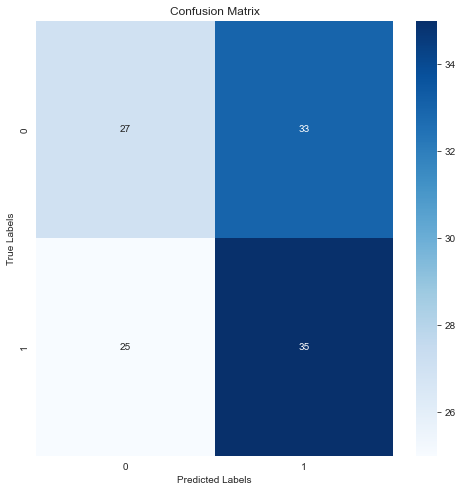

[I 2023-11-02 13:42:19,127] A new study created in memory with name: no-name-73ab0a46-3d28-4ae7-8b01-212bf4f18f31



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.70917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:42:42,877] Trial 0 finished with value: 0.7091666666666667 and parameters: {'n_d': 11, 'n_a': 60, 'n_steps': 7, 'gamma': 1.2733640799405064, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.0761230179335766}. Best is trial 0 with value: 0.7091666666666667.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:42:48,270] Trial 1 finished with value: 0.6775 and parameters: {'n_d': 32, 'n_a': 22, 'n_steps': 7, 'gamma': 1.5536993541807536, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.0077499311848387}. Best is trial 0 with value: 0.7091666666666667.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.6775

Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_auc = 0.7425


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:45:23,261] Trial 2 finished with value: 0.7424999999999999 and parameters: {'n_d': 62, 'n_a': 17, 'n_steps': 16, 'gamma': 0.2846519941136938, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.004739537829159746}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.69694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:46:55,322] Trial 3 finished with value: 0.6969444444444444 and parameters: {'n_d': 16, 'n_a': 45, 'n_steps': 19, 'gamma': 1.4641772790366832, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.08376535613598998}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:47:24,226] Trial 4 finished with value: 0.5447222222222222 and parameters: {'n_d': 22, 'n_a': 42, 'n_steps': 18, 'gamma': 1.4187658362731461, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.022251278009496014}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.70361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:47:40,589] Trial 5 finished with value: 0.703611111111111 and parameters: {'n_d': 41, 'n_a': 28, 'n_steps': 2, 'gamma': 1.562079334778711, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.07832025383571006}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.69472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:47:53,677] Trial 6 finished with value: 0.6947222222222222 and parameters: {'n_d': 28, 'n_a': 54, 'n_steps': 6, 'gamma': 1.2559758912883443, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.09634282252045097}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.72722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:48:26,677] Trial 7 finished with value: 0.7272222222222222 and parameters: {'n_d': 54, 'n_a': 53, 'n_steps': 15, 'gamma': 0.6478513303796353, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.02353311631905449}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 56 with best_epoch = 46 and best_val_0_auc = 0.72167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:49:49,269] Trial 8 finished with value: 0.7216666666666667 and parameters: {'n_d': 47, 'n_a': 27, 'n_steps': 18, 'gamma': 0.9521874292620505, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.014377646699057217}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 50 with best_epoch = 40 and best_val_0_auc = 0.71306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:50:21,070] Trial 9 finished with value: 0.7130555555555556 and parameters: {'n_d': 61, 'n_a': 34, 'n_steps': 5, 'gamma': 1.0819913851183347, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.08523285202809283}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.73194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:51:37,968] Trial 10 finished with value: 0.7319444444444445 and parameters: {'n_d': 64, 'n_a': 9, 'n_steps': 13, 'gamma': 0.1696250773933745, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.03994474271197909}. Best is trial 2 with value: 0.7424999999999999.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.69361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:53:07,764] Trial 11 finished with value: 0.6936111111111111 and parameters: {'n_d': 62, 'n_a': 8, 'n_steps': 12, 'gamma': 0.2445362324011559, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.043307455493402744}. Best is trial 2 with value: 0.7424999999999999.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.05696 |  0:00:03s
epoch 1  | loss: 1.55716 |  0:00:06s
epoch 2  | loss: 2.3023  |  0:00:09s
epoch 3  | loss: 1.69516 |  0:00:12s
epoch 4  | loss: 2.85325 |  0:00:15s
epoch 5  | loss: 1.8527  |  0:00:19s
epoch 6  | loss: 2.41731 |  0:00:22s
epoch 7  | loss: 1.30015 |  0:00:25s
epoch 8  | loss: 1.25831 |  0:00:28s
epoch 9  | loss: 1.0889  |  0:00:31s
epoch 10 | loss: 1.11267 |  0:00:35s
epoch 11 | loss: 0.88035 |  0:00:38s
epoch 12 | loss: 0.8853  |  0:00:41s
epoch 13 | loss: 0.85387 |  0:00:44s
epoch 14 | loss: 0.80771 |  0:00:47s
epoch 15 | loss: 0.73209 |  0:00:50s
epoch 16 | loss: 0.68492 |  0:00:54s
epoch 17 | loss: 0.65782 |  0:00:57s
epoch 18 | loss: 0.64646 |  0:01:00s
epoch 19 | loss: 0.6268  |  0:01:03s
epoch 20 | loss: 0.66358 |  0:01:06s
epoch 21 | loss: 0.62072 |  0:01:10s
epoch 22 | loss: 0.61177 |  0:01:13s
epoch 23 | loss: 0.61157 |  0:01:16s
epoch 24 | loss: 0.59281 |  0:01:19s
epoch 25 | loss: 0.58504 |  0:01:23s
epoch 26 | loss: 0.58502 |  0:01:26s
e

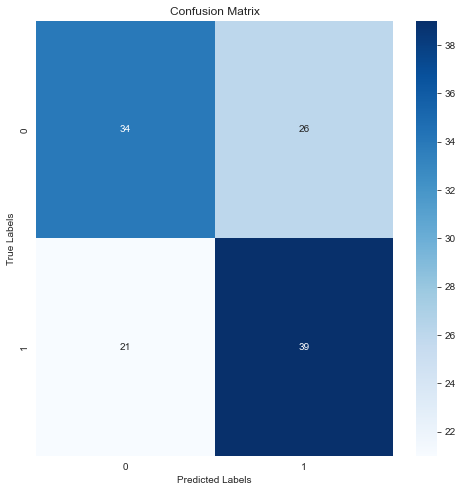

[I 2023-11-02 13:58:38,735] A new study created in memory with name: no-name-07392007-521e-484d-9c34-d295891ff18d



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.89333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:59:31,893] Trial 0 finished with value: 0.8933333333333334 and parameters: {'n_d': 60, 'n_a': 42, 'n_steps': 16, 'gamma': 0.694900008001287, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.02260018935869962}. Best is trial 0 with value: 0.8933333333333334.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.87278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 13:59:58,181] Trial 1 finished with value: 0.8727777777777778 and parameters: {'n_d': 55, 'n_a': 37, 'n_steps': 16, 'gamma': 0.4288720008730137, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.011514149565815344}. Best is trial 0 with value: 0.8933333333333334.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.89028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:01:08,724] Trial 2 finished with value: 0.8902777777777777 and parameters: {'n_d': 56, 'n_a': 52, 'n_steps': 8, 'gamma': 0.7397148827533447, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.04785607225455433}. Best is trial 0 with value: 0.8933333333333334.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.80278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:02:14,754] Trial 3 finished with value: 0.8027777777777778 and parameters: {'n_d': 62, 'n_a': 39, 'n_steps': 10, 'gamma': 1.2218002351189878, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.04534706329027002}. Best is trial 0 with value: 0.8933333333333334.



Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_auc = 0.92083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:02:57,406] Trial 4 finished with value: 0.9208333333333333 and parameters: {'n_d': 64, 'n_a': 58, 'n_steps': 12, 'gamma': 1.8597738316855905, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.04539821192200142}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.87194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:03:30,473] Trial 5 finished with value: 0.8719444444444444 and parameters: {'n_d': 10, 'n_a': 28, 'n_steps': 8, 'gamma': 1.4608044971242695, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.09838099669480777}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.88472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:03:48,263] Trial 6 finished with value: 0.8847222222222222 and parameters: {'n_d': 58, 'n_a': 32, 'n_steps': 8, 'gamma': 0.33705149644407256, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.09028366118766022}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.89806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:04:50,495] Trial 7 finished with value: 0.8980555555555555 and parameters: {'n_d': 31, 'n_a': 46, 'n_steps': 11, 'gamma': 0.37947356067405424, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.0649535086610869}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.88167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:05:24,519] Trial 8 finished with value: 0.8816666666666667 and parameters: {'n_d': 49, 'n_a': 17, 'n_steps': 6, 'gamma': 1.647516852244406, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.033131522007504584}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 47 with best_epoch = 37 and best_val_0_auc = 0.9025


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:06:14,862] Trial 9 finished with value: 0.9025 and parameters: {'n_d': 37, 'n_a': 46, 'n_steps': 6, 'gamma': 1.3970516131582984, 'n_independent': 6, 'n_shared': 9, 'lambda_sparse': 0.08141535914136185}. Best is trial 4 with value: 0.9208333333333333.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:06:18,777] Trial 10 finished with value: 0.9 and parameters: {'n_d': 41, 'n_a': 62, 'n_steps': 2, 'gamma': 1.9536716805130925, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.00374278010791617}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.9

Early stopping occurred at epoch 41 with best_epoch = 31 and best_val_0_auc = 0.91722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:07:01,290] Trial 11 finished with value: 0.9172222222222223 and parameters: {'n_d': 25, 'n_a': 64, 'n_steps': 13, 'gamma': 1.9354941059276483, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.0732721294728284}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.88556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:07:26,128] Trial 12 finished with value: 0.8855555555555555 and parameters: {'n_d': 23, 'n_a': 64, 'n_steps': 13, 'gamma': 1.9673481042417407, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.06044016074354553}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.91556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:08:18,639] Trial 13 finished with value: 0.9155555555555555 and parameters: {'n_d': 21, 'n_a': 56, 'n_steps': 19, 'gamma': 1.7105795937394115, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.07029488466795636}. Best is trial 4 with value: 0.9208333333333333.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.86889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:08:41,217] Trial 14 finished with value: 0.8688888888888889 and parameters: {'n_d': 27, 'n_a': 55, 'n_steps': 14, 'gamma': 1.740196230606434, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.07630521451255834}. Best is trial 4 with value: 0.9208333333333333.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 3.62917 |  0:00:00s
epoch 1  | loss: 1.61364 |  0:00:01s
epoch 2  | loss: 2.23917 |  0:00:02s
epoch 3  | loss: 1.81148 |  0:00:03s
epoch 4  | loss: 1.18811 |  0:00:04s
epoch 5  | loss: 1.20041 |  0:00:05s
epoch 6  | loss: 1.169   |  0:00:06s
epoch 7  | loss: 1.52665 |  0:00:07s
epoch 8  | loss: 2.1707  |  0:00:08s
epoch 9  | loss: 1.42948 |  0:00:09s
epoch 10 | loss: 1.14351 |  0:00:10s
epoch 11 | loss: 0.96696 |  0:00:11s
epoch 12 | loss: 1.43045 |  0:00:12s
epoch 13 | loss: 0.84875 |  0:00:13s
epoch 14 | loss: 0.87531 |  0:00:14s
epoch 15 | loss: 0.84677 |  0:00:14s
epoch 16 | loss: 0.73541 |  0:00:15s
epoch 17 | loss: 0.6909  |  0:00:16s
epoch 18 | loss: 0.69241 |  0:00:17s
epoch 19 | loss: 0.73012 |  0:00:18s
epoch 20 | loss: 0.828   |  0:00:19s
epoch 21 | loss: 0.91035 |  0:00:20s
epoch 22 | loss: 0.82701 |  0:00:21s
epoch 23 | loss: 0.99672 |  0:00:22s
epoch 24 | loss: 0.78961 |  0:00:23s
epoch 25 | loss: 0.66966 |  0:00:24s
epoch 26 | loss: 0.66695 |  0:00:24s
e

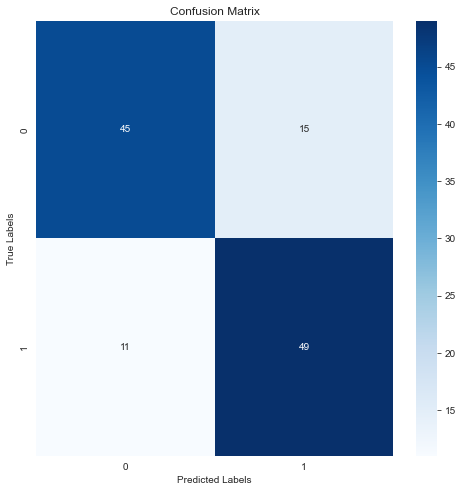

[I 2023-11-02 14:10:11,759] A new study created in memory with name: no-name-9251d006-9ac1-47e0-a16e-927e167f89d1



Early stopping occurred at epoch 50 with best_epoch = 40 and best_val_0_auc = 0.87806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:11:07,347] Trial 0 finished with value: 0.8780555555555556 and parameters: {'n_d': 12, 'n_a': 41, 'n_steps': 15, 'gamma': 1.913731751265177, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.058983342133018354}. Best is trial 0 with value: 0.8780555555555556.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.88056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:11:24,163] Trial 1 finished with value: 0.8805555555555554 and parameters: {'n_d': 31, 'n_a': 36, 'n_steps': 18, 'gamma': 0.6552683644413292, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.09583284039246369}. Best is trial 1 with value: 0.8805555555555554.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.64333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:12:01,657] Trial 2 finished with value: 0.6433333333333333 and parameters: {'n_d': 28, 'n_a': 14, 'n_steps': 18, 'gamma': 1.4902877763663258, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.03700932489694623}. Best is trial 1 with value: 0.8805555555555554.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.8775


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:12:20,770] Trial 3 finished with value: 0.8775000000000001 and parameters: {'n_d': 37, 'n_a': 34, 'n_steps': 8, 'gamma': 0.25360058525860124, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.09422545713657111}. Best is trial 1 with value: 0.8805555555555554.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.89639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:12:58,296] Trial 4 finished with value: 0.8963888888888889 and parameters: {'n_d': 40, 'n_a': 55, 'n_steps': 13, 'gamma': 0.6593112858560309, 'n_independent': 8, 'n_shared': 1, 'lambda_sparse': 0.0223727789649947}. Best is trial 4 with value: 0.8963888888888889.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.88278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:13:41,974] Trial 5 finished with value: 0.8827777777777778 and parameters: {'n_d': 28, 'n_a': 46, 'n_steps': 11, 'gamma': 0.9315670585078807, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.09518130966790905}. Best is trial 4 with value: 0.8963888888888889.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.79028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:13:54,595] Trial 6 finished with value: 0.7902777777777777 and parameters: {'n_d': 59, 'n_a': 21, 'n_steps': 6, 'gamma': 1.9680238418850284, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.04124426526276965}. Best is trial 4 with value: 0.8963888888888889.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.7475


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:14:34,445] Trial 7 finished with value: 0.7475 and parameters: {'n_d': 51, 'n_a': 23, 'n_steps': 11, 'gamma': 1.3141810544141999, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.031563665114998675}. Best is trial 4 with value: 0.8963888888888889.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.8525


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:15:01,981] Trial 8 finished with value: 0.8524999999999999 and parameters: {'n_d': 59, 'n_a': 60, 'n_steps': 9, 'gamma': 1.9766228525290703, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.079166028424165}. Best is trial 4 with value: 0.8963888888888889.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.84278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:16:07,003] Trial 9 finished with value: 0.8427777777777777 and parameters: {'n_d': 10, 'n_a': 52, 'n_steps': 18, 'gamma': 0.6620510696144314, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.06664474282563121}. Best is trial 4 with value: 0.8963888888888889.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.89889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:16:13,162] Trial 10 finished with value: 0.8988888888888888 and parameters: {'n_d': 44, 'n_a': 61, 'n_steps': 1, 'gamma': 0.2835398753626088, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.006662291447218364}. Best is trial 10 with value: 0.8988888888888888.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.91389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:16:28,575] Trial 11 finished with value: 0.913888888888889 and parameters: {'n_d': 44, 'n_a': 62, 'n_steps': 1, 'gamma': 0.14578432753093976, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.0053840398433246655}. Best is trial 11 with value: 0.913888888888889.



Early stopping occurred at epoch 52 with best_epoch = 42 and best_val_0_auc = 0.9125


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:16:49,494] Trial 12 finished with value: 0.9125000000000001 and parameters: {'n_d': 46, 'n_a': 64, 'n_steps': 1, 'gamma': 0.1574227749281731, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.0003160732843100894}. Best is trial 11 with value: 0.913888888888889.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.89917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:17:00,133] Trial 13 finished with value: 0.8991666666666667 and parameters: {'n_d': 49, 'n_a': 64, 'n_steps': 1, 'gamma': 0.10560741307452644, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.0021498955901689512}. Best is trial 11 with value: 0.913888888888889.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.88028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:17:16,759] Trial 14 finished with value: 0.8802777777777778 and parameters: {'n_d': 64, 'n_a': 52, 'n_steps': 4, 'gamma': 0.3998707859835764, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.01572913004414405}. Best is trial 11 with value: 0.913888888888889.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.91167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:17:43,642] Trial 15 finished with value: 0.9116666666666666 and parameters: {'n_d': 49, 'n_a': 46, 'n_steps': 4, 'gamma': 0.43654504405346806, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.013925502104913702}. Best is trial 11 with value: 0.913888888888889.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.90694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:17:57,395] Trial 16 finished with value: 0.9069444444444444 and parameters: {'n_d': 20, 'n_a': 56, 'n_steps': 3, 'gamma': 0.14138305183875383, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.00021210578408228237}. Best is trial 11 with value: 0.913888888888889.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.91528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:18:40,728] Trial 17 finished with value: 0.9152777777777777 and parameters: {'n_d': 43, 'n_a': 64, 'n_steps': 6, 'gamma': 0.4729259944736566, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.02236727466746976}. Best is trial 17 with value: 0.9152777777777777.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.89944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:19:24,672] Trial 18 finished with value: 0.8994444444444445 and parameters: {'n_d': 34, 'n_a': 47, 'n_steps': 7, 'gamma': 0.4710679413818941, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.02608890677519754}. Best is trial 17 with value: 0.9152777777777777.



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_auc = 0.91944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:20:00,987] Trial 19 finished with value: 0.9194444444444444 and parameters: {'n_d': 21, 'n_a': 31, 'n_steps': 6, 'gamma': 0.9129639801326506, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.01442445640341393}. Best is trial 19 with value: 0.9194444444444444.



Early stopping occurred at epoch 51 with best_epoch = 41 and best_val_0_auc = 0.90194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:20:33,144] Trial 20 finished with value: 0.9019444444444444 and parameters: {'n_d': 20, 'n_a': 28, 'n_steps': 6, 'gamma': 0.8674058403448949, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.04384442822234829}. Best is trial 19 with value: 0.9194444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.08831 |  0:00:00s
epoch 1  | loss: 0.88216 |  0:00:01s
epoch 2  | loss: 0.80618 |  0:00:01s
epoch 3  | loss: 0.77942 |  0:00:02s
epoch 4  | loss: 0.73622 |  0:00:03s
epoch 5  | loss: 0.73597 |  0:00:03s
epoch 6  | loss: 0.75639 |  0:00:04s
epoch 7  | loss: 0.72589 |  0:00:05s
epoch 8  | loss: 0.71696 |  0:00:05s
epoch 9  | loss: 0.71671 |  0:00:06s
epoch 10 | loss: 0.69873 |  0:00:07s
epoch 11 | loss: 0.67826 |  0:00:07s
epoch 12 | loss: 0.67046 |  0:00:08s
epoch 13 | loss: 0.65459 |  0:00:09s
epoch 14 | loss: 0.64415 |  0:00:09s
epoch 15 | loss: 0.63495 |  0:00:10s
epoch 16 | loss: 0.63463 |  0:00:11s
epoch 17 | loss: 0.63421 |  0:00:12s
epoch 18 | loss: 0.64578 |  0:00:12s
epoch 19 | loss: 0.62844 |  0:00:13s
epoch 20 | loss: 0.6353  |  0:00:14s
epoch 21 | loss: 0.62346 |  0:00:14s
epoch 22 | loss: 0.6277  |  0:00:15s
epoch 23 | loss: 0.61779 |  0:00:16s
epoch 24 | loss: 0.61499 |  0:00:17s
epoch 25 | loss: 0.61124 |  0:00:17s
epoch 26 | loss: 0.59933 |  0:00:18s
e

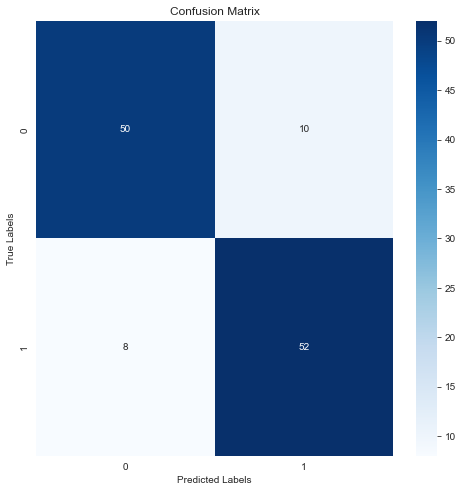

[I 2023-11-02 14:21:43,808] A new study created in memory with name: no-name-71b87b26-203f-4ccd-bb6c-17d747d8869d



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.55653


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:22:28,955] Trial 0 finished with value: 0.5565277777777778 and parameters: {'n_d': 43, 'n_a': 10, 'n_steps': 14, 'gamma': 1.5479760322434937, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.08301559636143996}. Best is trial 0 with value: 0.5565277777777778.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.58861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:22:52,904] Trial 1 finished with value: 0.5886111111111111 and parameters: {'n_d': 59, 'n_a': 58, 'n_steps': 10, 'gamma': 1.6989059282498395, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.07614297280180539}. Best is trial 1 with value: 0.5886111111111111.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.62278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:23:06,913] Trial 2 finished with value: 0.6227777777777778 and parameters: {'n_d': 60, 'n_a': 38, 'n_steps': 8, 'gamma': 1.141164307004235, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.012629810464368755}. Best is trial 2 with value: 0.6227777777777778.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:23:08,427] Trial 3 finished with value: 0.5588888888888889 and parameters: {'n_d': 30, 'n_a': 48, 'n_steps': 1, 'gamma': 0.4723068485191164, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.08018281458341567}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.55889

Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.59194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:23:22,456] Trial 4 finished with value: 0.5919444444444445 and parameters: {'n_d': 50, 'n_a': 61, 'n_steps': 7, 'gamma': 0.9271710668640625, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.0007937005827661957}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.59611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:23:51,127] Trial 5 finished with value: 0.596111111111111 and parameters: {'n_d': 39, 'n_a': 38, 'n_steps': 19, 'gamma': 1.457618972037831, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.03062396871462813}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.55083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:23:59,912] Trial 6 finished with value: 0.5508333333333334 and parameters: {'n_d': 14, 'n_a': 23, 'n_steps': 4, 'gamma': 0.84639470214656, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.08556448691133388}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.55056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:24:05,858] Trial 7 finished with value: 0.5505555555555556 and parameters: {'n_d': 8, 'n_a': 36, 'n_steps': 5, 'gamma': 1.273479022523896, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.024284061400746775}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.48083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:24:30,033] Trial 8 finished with value: 0.48083333333333333 and parameters: {'n_d': 17, 'n_a': 54, 'n_steps': 18, 'gamma': 0.2713234024671485, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.07726368587492019}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.57417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:24:42,934] Trial 9 finished with value: 0.5741666666666667 and parameters: {'n_d': 31, 'n_a': 56, 'n_steps': 7, 'gamma': 1.1842338786809463, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.05821575065945252}. Best is trial 2 with value: 0.6227777777777778.



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.65389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:26:54,111] Trial 10 finished with value: 0.653888888888889 and parameters: {'n_d': 64, 'n_a': 30, 'n_steps': 13, 'gamma': 1.9947292473768574, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.00022151987265479553}. Best is trial 10 with value: 0.653888888888889.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.60083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:28:10,033] Trial 11 finished with value: 0.6008333333333333 and parameters: {'n_d': 64, 'n_a': 31, 'n_steps': 14, 'gamma': 1.9709643212343813, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.0020372260754438778}. Best is trial 10 with value: 0.653888888888889.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.6525


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:29:05,227] Trial 12 finished with value: 0.6525 and parameters: {'n_d': 54, 'n_a': 23, 'n_steps': 12, 'gamma': 1.998572419915002, 'n_independent': 8, 'n_shared': 10, 'lambda_sparse': 0.013399899541367891}. Best is trial 10 with value: 0.653888888888889.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.59694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:29:40,712] Trial 13 finished with value: 0.5969444444444444 and parameters: {'n_d': 52, 'n_a': 20, 'n_steps': 14, 'gamma': 1.9931016236099424, 'n_independent': 8, 'n_shared': 10, 'lambda_sparse': 0.02934799540541746}. Best is trial 10 with value: 0.653888888888889.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.59042


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:30:18,326] Trial 14 finished with value: 0.5904166666666667 and parameters: {'n_d': 51, 'n_a': 21, 'n_steps': 12, 'gamma': 1.7960292122926407, 'n_independent': 8, 'n_shared': 10, 'lambda_sparse': 0.015538433475584342}. Best is trial 10 with value: 0.653888888888889.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.59444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:31:33,429] Trial 15 finished with value: 0.5944444444444444 and parameters: {'n_d': 56, 'n_a': 12, 'n_steps': 16, 'gamma': 1.7596144033390524, 'n_independent': 8, 'n_shared': 9, 'lambda_sparse': 0.04026063606110524}. Best is trial 10 with value: 0.653888888888889.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.62972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:32:25,022] Trial 16 finished with value: 0.6297222222222222 and parameters: {'n_d': 46, 'n_a': 27, 'n_steps': 11, 'gamma': 1.9983833872276793, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.010337659801256227}. Best is trial 10 with value: 0.653888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.93469 |  0:00:03s
epoch 1  | loss: 3.11446 |  0:00:06s
epoch 2  | loss: 3.00209 |  0:00:09s
epoch 3  | loss: 2.94936 |  0:00:12s
epoch 4  | loss: 2.30956 |  0:00:15s
epoch 5  | loss: 1.97622 |  0:00:18s
epoch 6  | loss: 1.88738 |  0:00:21s
epoch 7  | loss: 1.41527 |  0:00:24s
epoch 8  | loss: 2.90325 |  0:00:27s
epoch 9  | loss: 1.66813 |  0:00:30s
epoch 10 | loss: 1.35781 |  0:00:33s
epoch 11 | loss: 1.4807  |  0:00:36s
epoch 12 | loss: 1.30166 |  0:00:39s
epoch 13 | loss: 1.20674 |  0:00:42s
epoch 14 | loss: 1.3806  |  0:00:45s
epoch 15 | loss: 2.47021 |  0:00:48s
epoch 16 | loss: 1.46392 |  0:00:51s
epoch 17 | loss: 1.23653 |  0:00:54s
epoch 18 | loss: 1.12711 |  0:00:57s
epoch 19 | loss: 1.09677 |  0:01:00s
epoch 20 | loss: 1.08498 |  0:01:03s
epoch 21 | loss: 1.3472  |  0:01:06s
epoch 22 | loss: 1.16447 |  0:01:09s
epoch 23 | loss: 0.85634 |  0:01:13s
epoch 24 | loss: 0.81579 |  0:01:16s
epoch 25 | loss: 0.92999 |  0:01:19s
epoch 26 | loss: 1.05472 |  0:01:22s
e

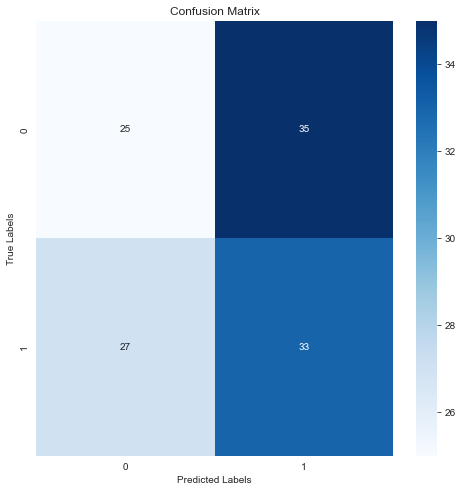

[I 2023-11-02 14:37:33,402] A new study created in memory with name: no-name-16046d9e-4d15-4588-9947-cce44e346077
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:37:36,721] Trial 0 finished with value: 0.6008333333333333 and parameters: {'n_d': 54, 'n_a': 12, 'n_steps': 4, 'gamma': 1.6820155427449082, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.060481401895069516}. Best is trial 0 with value: 0.6008333333333333.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.60083

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.65222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:38:05,571] Trial 1 finished with value: 0.6522222222222221 and parameters: {'n_d': 56, 'n_a': 28, 'n_steps': 15, 'gamma': 0.849929243735286, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.09473247210679847}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.63944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:38:56,735] Trial 2 finished with value: 0.6394444444444445 and parameters: {'n_d': 30, 'n_a': 42, 'n_steps': 18, 'gamma': 0.6640367607138176, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.003849654194343867}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_auc = 0.62889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:40:21,094] Trial 3 finished with value: 0.6288888888888888 and parameters: {'n_d': 13, 'n_a': 40, 'n_steps': 13, 'gamma': 0.14870413380098207, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.07124813456281827}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.59444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:40:59,450] Trial 4 finished with value: 0.5944444444444443 and parameters: {'n_d': 33, 'n_a': 34, 'n_steps': 12, 'gamma': 1.1865639721329164, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.01631136924401604}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.62917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:41:28,134] Trial 5 finished with value: 0.6291666666666667 and parameters: {'n_d': 23, 'n_a': 30, 'n_steps': 9, 'gamma': 1.0434771241212926, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.08309352722986939}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:41:33,125] Trial 6 finished with value: 0.5655555555555556 and parameters: {'n_d': 23, 'n_a': 18, 'n_steps': 18, 'gamma': 0.9679997111136373, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.04935054638162432}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.63667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:42:20,098] Trial 7 finished with value: 0.6366666666666667 and parameters: {'n_d': 62, 'n_a': 34, 'n_steps': 19, 'gamma': 0.5724846496754433, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.03822529278878295}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.63861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:42:36,475] Trial 8 finished with value: 0.638611111111111 and parameters: {'n_d': 15, 'n_a': 22, 'n_steps': 9, 'gamma': 1.4200925497339183, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.002947063620340308}. Best is trial 1 with value: 0.6522222222222221.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.66722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:43:01,981] Trial 9 finished with value: 0.6672222222222223 and parameters: {'n_d': 46, 'n_a': 33, 'n_steps': 17, 'gamma': 0.6416852519011474, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.0709879321632246}. Best is trial 9 with value: 0.6672222222222223.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:43:05,598] Trial 10 finished with value: 0.55125 and parameters: {'n_d': 44, 'n_a': 53, 'n_steps': 1, 'gamma': 1.9407498940494405, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.09551465682835152}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55125

Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.60417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:44:16,359] Trial 11 finished with value: 0.6041666666666666 and parameters: {'n_d': 47, 'n_a': 62, 'n_steps': 15, 'gamma': 0.5791130639499458, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.09771567842045562}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.55028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:44:49,810] Trial 12 finished with value: 0.5502777777777778 and parameters: {'n_d': 64, 'n_a': 24, 'n_steps': 15, 'gamma': 0.8239297582030809, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.07783300009836955}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.61667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:45:04,924] Trial 13 finished with value: 0.6166666666666667 and parameters: {'n_d': 44, 'n_a': 48, 'n_steps': 15, 'gamma': 0.3623894438163088, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.08664412642855279}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.58958


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:45:21,064] Trial 14 finished with value: 0.5895833333333333 and parameters: {'n_d': 54, 'n_a': 28, 'n_steps': 6, 'gamma': 0.8367834855036145, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.07220602250594763}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.62639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:45:33,223] Trial 15 finished with value: 0.6263888888888889 and parameters: {'n_d': 52, 'n_a': 9, 'n_steps': 12, 'gamma': 1.1618136011841467, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.09949978967933029}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.57194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:46:23,155] Trial 16 finished with value: 0.5719444444444445 and parameters: {'n_d': 37, 'n_a': 43, 'n_steps': 16, 'gamma': 0.33061978027042493, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.06279009424412484}. Best is trial 9 with value: 0.6672222222222223.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.59583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:47:42,078] Trial 17 finished with value: 0.5958333333333333 and parameters: {'n_d': 58, 'n_a': 16, 'n_steps': 17, 'gamma': 0.746773157995055, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.08441287739634452}. Best is trial 9 with value: 0.6672222222222223.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 3.09346 |  0:00:01s
epoch 1  | loss: 2.1907  |  0:00:03s
epoch 2  | loss: 1.86605 |  0:00:05s
epoch 3  | loss: 1.18164 |  0:00:06s
epoch 4  | loss: 1.59999 |  0:00:08s
epoch 5  | loss: 2.67612 |  0:00:10s
epoch 6  | loss: 1.32266 |  0:00:11s
epoch 7  | loss: 1.50316 |  0:00:13s
epoch 8  | loss: 1.14627 |  0:00:15s
epoch 9  | loss: 1.03459 |  0:00:16s
epoch 10 | loss: 0.89922 |  0:00:18s
epoch 11 | loss: 0.85748 |  0:00:20s
epoch 12 | loss: 0.96902 |  0:00:21s
epoch 13 | loss: 0.87912 |  0:00:23s
epoch 14 | loss: 0.84753 |  0:00:25s
epoch 15 | loss: 0.79454 |  0:00:26s
epoch 16 | loss: 0.76695 |  0:00:28s
epoch 17 | loss: 0.76952 |  0:00:30s
epoch 18 | loss: 0.76565 |  0:00:31s
epoch 19 | loss: 0.73401 |  0:00:33s
epoch 20 | loss: 0.72292 |  0:00:35s
epoch 21 | loss: 0.72335 |  0:00:36s
epoch 22 | loss: 0.71526 |  0:00:38s
epoch 23 | loss: 0.70722 |  0:00:40s
epoch 24 | loss: 0.70611 |  0:00:41s
epoch 25 | loss: 0.69755 |  0:00:43s
epoch 26 | loss: 0.69182 |  0:00:44s
e

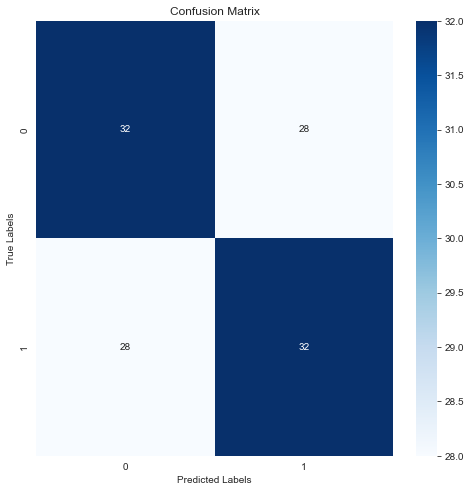

[I 2023-11-02 14:50:32,261] A new study created in memory with name: no-name-b4721241-35c3-45ac-8b8c-a6b75669ea6f



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.75542


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:50:51,625] Trial 0 finished with value: 0.7554166666666666 and parameters: {'n_d': 33, 'n_a': 60, 'n_steps': 18, 'gamma': 1.9588982966172743, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.05196554969043064}. Best is trial 0 with value: 0.7554166666666666.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_auc = 0.77389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:52:29,719] Trial 1 finished with value: 0.773888888888889 and parameters: {'n_d': 30, 'n_a': 39, 'n_steps': 16, 'gamma': 1.166620400554982, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.05807439484824125}. Best is trial 1 with value: 0.773888888888889.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.76306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:52:42,640] Trial 2 finished with value: 0.7630555555555556 and parameters: {'n_d': 9, 'n_a': 50, 'n_steps': 4, 'gamma': 0.7960808910403991, 'n_independent': 6, 'n_shared': 9, 'lambda_sparse': 0.08245319698321826}. Best is trial 1 with value: 0.773888888888889.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.79944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:53:02,864] Trial 3 finished with value: 0.7994444444444445 and parameters: {'n_d': 58, 'n_a': 55, 'n_steps': 11, 'gamma': 0.4918787779918582, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.07788595433136783}. Best is trial 3 with value: 0.7994444444444445.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:53:05,079] Trial 4 finished with value: 0.7858333333333333 and parameters: {'n_d': 47, 'n_a': 58, 'n_steps': 2, 'gamma': 1.6992350032041468, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.007947109816980701}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.78583

Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.77056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:53:50,220] Trial 5 finished with value: 0.7705555555555557 and parameters: {'n_d': 34, 'n_a': 40, 'n_steps': 5, 'gamma': 1.9929462583136563, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.055919908407282594}. Best is trial 3 with value: 0.7994444444444445.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:53:55,634] Trial 6 finished with value: 0.7438888888888888 and parameters: {'n_d': 44, 'n_a': 29, 'n_steps': 2, 'gamma': 0.8313543313171985, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.017764210256502926}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.74389

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.74028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:54:10,135] Trial 7 finished with value: 0.7402777777777778 and parameters: {'n_d': 51, 'n_a': 41, 'n_steps': 8, 'gamma': 0.49902337100860183, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.033110152198400744}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.77639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:55:05,644] Trial 8 finished with value: 0.7763888888888889 and parameters: {'n_d': 55, 'n_a': 8, 'n_steps': 14, 'gamma': 1.3824824309659869, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.02625800775147872}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.74583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:55:25,236] Trial 9 finished with value: 0.7458333333333333 and parameters: {'n_d': 8, 'n_a': 34, 'n_steps': 11, 'gamma': 1.5005840325862463, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.07008497324377758}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.74972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:55:46,265] Trial 10 finished with value: 0.7497222222222222 and parameters: {'n_d': 64, 'n_a': 21, 'n_steps': 11, 'gamma': 0.19545717733241585, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.0979938944328087}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.75611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:56:03,114] Trial 11 finished with value: 0.7561111111111111 and parameters: {'n_d': 64, 'n_a': 62, 'n_steps': 8, 'gamma': 0.12913411889892445, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.0005302424638421047}. Best is trial 3 with value: 0.7994444444444445.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:56:08,686] Trial 12 finished with value: 0.7569444444444444 and parameters: {'n_d': 46, 'n_a': 53, 'n_steps': 1, 'gamma': 0.5180762013163724, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.03690575991405121}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.75694

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.74361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:56:31,526] Trial 13 finished with value: 0.7436111111111111 and parameters: {'n_d': 56, 'n_a': 52, 'n_steps': 13, 'gamma': 1.6289501872372982, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.0036756552379426212}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.75139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:56:55,864] Trial 14 finished with value: 0.7513888888888888 and parameters: {'n_d': 41, 'n_a': 64, 'n_steps': 7, 'gamma': 1.0877804313910144, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.04285589472516291}. Best is trial 3 with value: 0.7994444444444445.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.80472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:57:23,496] Trial 15 finished with value: 0.8047222222222222 and parameters: {'n_d': 27, 'n_a': 47, 'n_steps': 5, 'gamma': 1.6748814089181507, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.06918533416642773}. Best is trial 15 with value: 0.8047222222222222.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.77917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:57:48,110] Trial 16 finished with value: 0.7791666666666667 and parameters: {'n_d': 25, 'n_a': 46, 'n_steps': 5, 'gamma': 1.2382087481453752, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.07237039881396189}. Best is trial 15 with value: 0.8047222222222222.



Early stopping occurred at epoch 42 with best_epoch = 32 and best_val_0_auc = 0.79778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:58:52,062] Trial 17 finished with value: 0.7977777777777778 and parameters: {'n_d': 20, 'n_a': 46, 'n_steps': 9, 'gamma': 0.9211936953508636, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.08821631839340321}. Best is trial 15 with value: 0.8047222222222222.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.79694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 14:59:54,952] Trial 18 finished with value: 0.7969444444444445 and parameters: {'n_d': 16, 'n_a': 29, 'n_steps': 13, 'gamma': 1.2599319793581376, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.0688661350147628}. Best is trial 15 with value: 0.8047222222222222.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.77583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:00:25,242] Trial 19 finished with value: 0.7758333333333333 and parameters: {'n_d': 39, 'n_a': 56, 'n_steps': 6, 'gamma': 0.9936189950635489, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.061760095050254996}. Best is trial 15 with value: 0.8047222222222222.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.76694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:01:10,302] Trial 20 finished with value: 0.7669444444444445 and parameters: {'n_d': 28, 'n_a': 47, 'n_steps': 10, 'gamma': 0.6702319177105215, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.07950302548269951}. Best is trial 15 with value: 0.8047222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.1058  |  0:00:00s
epoch 1  | loss: 0.86668 |  0:00:01s
epoch 2  | loss: 0.83157 |  0:00:02s
epoch 3  | loss: 0.79871 |  0:00:03s
epoch 4  | loss: 0.76773 |  0:00:03s
epoch 5  | loss: 0.77237 |  0:00:04s
epoch 6  | loss: 0.75745 |  0:00:05s
epoch 7  | loss: 0.70862 |  0:00:06s
epoch 8  | loss: 0.70529 |  0:00:07s
epoch 9  | loss: 0.69216 |  0:00:07s
epoch 10 | loss: 0.67715 |  0:00:08s
epoch 11 | loss: 0.66548 |  0:00:09s
epoch 12 | loss: 0.6715  |  0:00:10s
epoch 13 | loss: 0.66305 |  0:00:11s
epoch 14 | loss: 0.66714 |  0:00:11s
epoch 15 | loss: 0.66389 |  0:00:12s
epoch 16 | loss: 0.65425 |  0:00:13s
epoch 17 | loss: 0.657   |  0:00:14s
epoch 18 | loss: 0.65679 |  0:00:15s
epoch 19 | loss: 0.64549 |  0:00:15s
epoch 20 | loss: 0.6489  |  0:00:16s
epoch 21 | loss: 0.63247 |  0:00:17s
epoch 22 | loss: 0.64592 |  0:00:18s
epoch 23 | loss: 0.63215 |  0:00:19s
epoch 24 | loss: 0.62558 |  0:00:19s
epoch 25 | loss: 0.63361 |  0:00:20s
epoch 26 | loss: 0.63079 |  0:00:21s
e

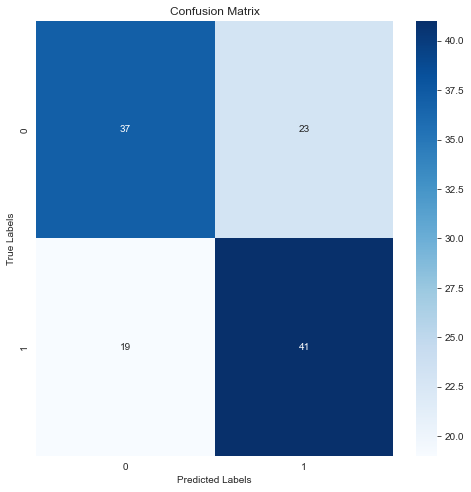

[I 2023-11-02 15:02:30,016] A new study created in memory with name: no-name-dfad9c73-6967-49a2-8d45-fb67a602f1df



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.86139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:03:31,898] Trial 0 finished with value: 0.8613888888888889 and parameters: {'n_d': 30, 'n_a': 41, 'n_steps': 14, 'gamma': 1.81115184161773, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.03178446363054603}. Best is trial 0 with value: 0.8613888888888889.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.86639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:04:44,100] Trial 1 finished with value: 0.8663888888888889 and parameters: {'n_d': 36, 'n_a': 59, 'n_steps': 16, 'gamma': 1.503256671275458, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.04111947207359846}. Best is trial 1 with value: 0.8663888888888889.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.90528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:04:57,395] Trial 2 finished with value: 0.9052777777777777 and parameters: {'n_d': 33, 'n_a': 21, 'n_steps': 6, 'gamma': 1.5183911973795745, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.006012398414861672}. Best is trial 2 with value: 0.9052777777777777.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:05:07,279] Trial 3 finished with value: 0.9291666666666667 and parameters: {'n_d': 46, 'n_a': 12, 'n_steps': 2, 'gamma': 0.4834818554249982, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.0052566210304513614}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.92917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:05:15,342] Trial 4 finished with value: 0.9030555555555556 and parameters: {'n_d': 36, 'n_a': 49, 'n_steps': 4, 'gamma': 0.32943881715203116, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.012750425690367644}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.90306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:05:19,256] Trial 5 finished with value: 0.9044444444444444 and parameters: {'n_d': 27, 'n_a': 63, 'n_steps': 5, 'gamma': 1.721995897276172, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.09833671901250456}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.90444

Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_auc = 0.90833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:06:13,922] Trial 6 finished with value: 0.9083333333333333 and parameters: {'n_d': 14, 'n_a': 56, 'n_steps': 14, 'gamma': 1.078074384171645, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.011575193268249621}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.86556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:07:08,099] Trial 7 finished with value: 0.8655555555555556 and parameters: {'n_d': 31, 'n_a': 59, 'n_steps': 19, 'gamma': 1.621628142598701, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.027850709424900665}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.90444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:07:40,614] Trial 8 finished with value: 0.9044444444444445 and parameters: {'n_d': 37, 'n_a': 61, 'n_steps': 6, 'gamma': 1.7728043182197881, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.03902127123174916}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.86806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:07:51,784] Trial 9 finished with value: 0.8680555555555556 and parameters: {'n_d': 35, 'n_a': 34, 'n_steps': 8, 'gamma': 0.6670998786356274, 'n_independent': 8, 'n_shared': 1, 'lambda_sparse': 0.0012018870481133564}. Best is trial 3 with value: 0.9291666666666667.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:08:00,561] Trial 10 finished with value: 0.9038888888888889 and parameters: {'n_d': 61, 'n_a': 8, 'n_steps': 1, 'gamma': 0.10993943817620633, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.062387967216257695}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.90389

Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.88056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:08:37,816] Trial 11 finished with value: 0.8805555555555555 and parameters: {'n_d': 9, 'n_a': 26, 'n_steps': 12, 'gamma': 1.0703040292418962, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.017420323450629247}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.90389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:09:06,772] Trial 12 finished with value: 0.903888888888889 and parameters: {'n_d': 52, 'n_a': 8, 'n_steps': 10, 'gamma': 0.9384852108890531, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.0017106885893082954}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.9025


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:09:55,841] Trial 13 finished with value: 0.9025 and parameters: {'n_d': 8, 'n_a': 48, 'n_steps': 16, 'gamma': 0.6120188950246612, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.020094685741518396}. Best is trial 3 with value: 0.9291666666666667.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:10:00,239] Trial 14 finished with value: 0.9233333333333333 and parameters: {'n_d': 19, 'n_a': 18, 'n_steps': 1, 'gamma': 1.1636310233621998, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.02084180422876787}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.92333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:10:04,198] Trial 15 finished with value: 0.898611111111111 and parameters: {'n_d': 47, 'n_a': 19, 'n_steps': 1, 'gamma': 1.3147287363859081, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.02377847687577086}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.89861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:10:19,345] Trial 16 finished with value: 0.9252777777777776 and parameters: {'n_d': 22, 'n_a': 16, 'n_steps': 3, 'gamma': 0.8369927361859302, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.0007922629928102179}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_auc = 0.92528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:10:27,537] Trial 17 finished with value: 0.9275 and parameters: {'n_d': 22, 'n_a': 29, 'n_steps': 3, 'gamma': 0.7878405813306446, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.0025028891423220546}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.9275

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.91222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:10:50,943] Trial 18 finished with value: 0.9122222222222223 and parameters: {'n_d': 47, 'n_a': 31, 'n_steps': 9, 'gamma': 0.716487672592311, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.05525248918893992}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.90167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:00,611] Trial 19 finished with value: 0.9016666666666667 and parameters: {'n_d': 44, 'n_a': 27, 'n_steps': 3, 'gamma': 0.45795314181885516, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.010452876950664675}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.85333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:12,451] Trial 20 finished with value: 0.8533333333333333 and parameters: {'n_d': 62, 'n_a': 40, 'n_steps': 7, 'gamma': 0.8506515023334266, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.011986515653005167}. Best is trial 3 with value: 0.9291666666666667.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:22,983] Trial 21 finished with value: 0.9247222222222222 and parameters: {'n_d': 23, 'n_a': 13, 'n_steps': 2, 'gamma': 0.8682048807035543, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.0016204529752197815}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.92472

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.90528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:32,437] Trial 22 finished with value: 0.9052777777777777 and parameters: {'n_d': 21, 'n_a': 14, 'n_steps': 3, 'gamma': 0.505256218926606, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.0008810376253984989}. Best is trial 3 with value: 0.9291666666666667.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.93167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:39,317] Trial 23 finished with value: 0.9316666666666665 and parameters: {'n_d': 16, 'n_a': 24, 'n_steps': 4, 'gamma': 0.8107271148680673, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.010426266134098765}. Best is trial 23 with value: 0.9316666666666665.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.91806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:51,303] Trial 24 finished with value: 0.9180555555555555 and parameters: {'n_d': 17, 'n_a': 24, 'n_steps': 5, 'gamma': 0.7235430807148588, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.013613920621567516}. Best is trial 23 with value: 0.9316666666666665.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.895


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:11:56,874] Trial 25 finished with value: 0.895 and parameters: {'n_d': 14, 'n_a': 32, 'n_steps': 4, 'gamma': 0.3685306299109797, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.019635368922527343}. Best is trial 23 with value: 0.9316666666666665.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.91333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:12:12,874] Trial 26 finished with value: 0.9133333333333333 and parameters: {'n_d': 40, 'n_a': 38, 'n_steps': 7, 'gamma': 0.5773161266455382, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.007321885861186571}. Best is trial 23 with value: 0.9316666666666665.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.88083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:12:24,527] Trial 27 finished with value: 0.8808333333333334 and parameters: {'n_d': 56, 'n_a': 29, 'n_steps': 2, 'gamma': 0.9661689576706304, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.029545486550546923}. Best is trial 23 with value: 0.9316666666666665.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.89472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:12:56,989] Trial 28 finished with value: 0.8947222222222223 and parameters: {'n_d': 27, 'n_a': 23, 'n_steps': 10, 'gamma': 0.7796208757303672, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.008120898696683906}. Best is trial 23 with value: 0.9316666666666665.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82714 |  0:00:00s
epoch 1  | loss: 0.70636 |  0:00:00s
epoch 2  | loss: 0.69524 |  0:00:01s
epoch 3  | loss: 0.6892  |  0:00:01s
epoch 4  | loss: 0.66498 |  0:00:01s
epoch 5  | loss: 0.65154 |  0:00:02s
epoch 6  | loss: 0.64996 |  0:00:02s
epoch 7  | loss: 0.62769 |  0:00:02s
epoch 8  | loss: 0.62535 |  0:00:03s
epoch 9  | loss: 0.63561 |  0:00:03s
epoch 10 | loss: 0.62426 |  0:00:03s
epoch 11 | loss: 0.62003 |  0:00:03s
epoch 12 | loss: 0.61954 |  0:00:04s
epoch 13 | loss: 0.61482 |  0:00:04s
epoch 14 | loss: 0.61051 |  0:00:04s
epoch 15 | loss: 0.60774 |  0:00:05s
epoch 16 | loss: 0.60625 |  0:00:05s
epoch 17 | loss: 0.6031  |  0:00:05s
epoch 18 | loss: 0.61518 |  0:00:06s
epoch 19 | loss: 0.60842 |  0:00:06s
epoch 20 | loss: 0.60894 |  0:00:06s
epoch 21 | loss: 0.60911 |  0:00:07s
epoch 22 | loss: 0.60761 |  0:00:07s
epoch 23 | loss: 0.60241 |  0:00:07s
epoch 24 | loss: 0.60578 |  0:00:08s
epoch 25 | loss: 0.59482 |  0:00:08s
epoch 26 | loss: 0.59465 |  0:00:08s
e

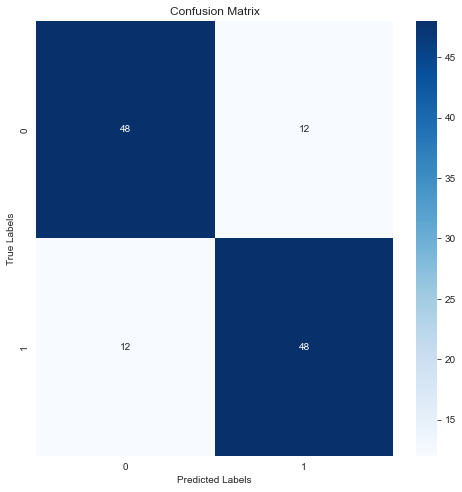

[I 2023-11-02 15:13:29,761] A new study created in memory with name: no-name-cfcafc36-e098-4acc-83ad-4d112c1025f2



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.77806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:14:20,824] Trial 0 finished with value: 0.7780555555555555 and parameters: {'n_d': 8, 'n_a': 46, 'n_steps': 15, 'gamma': 1.2098272226995497, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.09889255605405638}. Best is trial 0 with value: 0.7780555555555555.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.84611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:14:29,384] Trial 1 finished with value: 0.8461111111111111 and parameters: {'n_d': 47, 'n_a': 42, 'n_steps': 2, 'gamma': 0.9128471000555436, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.0766981676166407}. Best is trial 1 with value: 0.8461111111111111.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.78556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:15:12,612] Trial 2 finished with value: 0.7855555555555556 and parameters: {'n_d': 53, 'n_a': 29, 'n_steps': 17, 'gamma': 1.7313954852914706, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.09715512077484142}. Best is trial 1 with value: 0.8461111111111111.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.85222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:15:54,719] Trial 3 finished with value: 0.8522222222222221 and parameters: {'n_d': 62, 'n_a': 30, 'n_steps': 8, 'gamma': 0.37342402289490995, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.029637794116743332}. Best is trial 3 with value: 0.8522222222222221.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.8075


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:16:12,947] Trial 4 finished with value: 0.8075 and parameters: {'n_d': 18, 'n_a': 16, 'n_steps': 18, 'gamma': 1.265903989165061, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.045423566226215614}. Best is trial 3 with value: 0.8522222222222221.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:16:20,482] Trial 5 finished with value: 0.82 and parameters: {'n_d': 10, 'n_a': 10, 'n_steps': 3, 'gamma': 1.066757288990242, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.021638912206916102}. Best is trial 3 with value: 0.8522222222222221.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.82

Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.80944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:16:58,018] Trial 6 finished with value: 0.8094444444444443 and parameters: {'n_d': 62, 'n_a': 27, 'n_steps': 11, 'gamma': 1.6596107921369767, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.012639327465202542}. Best is trial 3 with value: 0.8522222222222221.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.86583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:17:50,079] Trial 7 finished with value: 0.8658333333333332 and parameters: {'n_d': 33, 'n_a': 35, 'n_steps': 13, 'gamma': 0.31122261310739796, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.025496230874314733}. Best is trial 7 with value: 0.8658333333333332.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.85694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:18:08,088] Trial 8 finished with value: 0.8569444444444444 and parameters: {'n_d': 53, 'n_a': 27, 'n_steps': 2, 'gamma': 0.17620434921785794, 'n_independent': 7, 'n_shared': 10, 'lambda_sparse': 0.04888180733147219}. Best is trial 7 with value: 0.8658333333333332.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.77167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:19:21,521] Trial 9 finished with value: 0.7716666666666666 and parameters: {'n_d': 36, 'n_a': 13, 'n_steps': 17, 'gamma': 1.5086207033897132, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.08824386627248984}. Best is trial 7 with value: 0.8658333333333332.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.83778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:19:54,798] Trial 10 finished with value: 0.8377777777777777 and parameters: {'n_d': 31, 'n_a': 61, 'n_steps': 12, 'gamma': 0.5830744012465348, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.004877232314051582}. Best is trial 7 with value: 0.8658333333333332.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.85778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:20:22,787] Trial 11 finished with value: 0.8577777777777778 and parameters: {'n_d': 27, 'n_a': 49, 'n_steps': 6, 'gamma': 0.13059749265225573, 'n_independent': 7, 'n_shared': 10, 'lambda_sparse': 0.04464134627979781}. Best is trial 7 with value: 0.8658333333333332.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.87611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:20:51,959] Trial 12 finished with value: 0.8761111111111112 and parameters: {'n_d': 26, 'n_a': 55, 'n_steps': 7, 'gamma': 0.1081897919866816, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.033587721287472734}. Best is trial 12 with value: 0.8761111111111112.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.85139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:22:23,501] Trial 13 finished with value: 0.8513888888888889 and parameters: {'n_d': 23, 'n_a': 64, 'n_steps': 13, 'gamma': 0.5851632741514265, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.02909659393347692}. Best is trial 12 with value: 0.8761111111111112.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.84917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:22:57,577] Trial 14 finished with value: 0.8491666666666666 and parameters: {'n_d': 42, 'n_a': 53, 'n_steps': 8, 'gamma': 0.11083072242735645, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.0012934051924887273}. Best is trial 12 with value: 0.8761111111111112.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.84806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:23:13,827] Trial 15 finished with value: 0.8480555555555556 and parameters: {'n_d': 19, 'n_a': 38, 'n_steps': 6, 'gamma': 0.4440110668139874, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.06339707253398212}. Best is trial 12 with value: 0.8761111111111112.



Early stopping occurred at epoch 42 with best_epoch = 32 and best_val_0_auc = 0.7975


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:25:08,646] Trial 16 finished with value: 0.7975 and parameters: {'n_d': 35, 'n_a': 57, 'n_steps': 14, 'gamma': 1.9873716566048891, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.03496890368015544}. Best is trial 12 with value: 0.8761111111111112.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.19699 |  0:00:01s
epoch 1  | loss: 0.91004 |  0:00:02s
epoch 2  | loss: 0.91456 |  0:00:03s
epoch 3  | loss: 0.83511 |  0:00:04s
epoch 4  | loss: 0.78789 |  0:00:06s
epoch 5  | loss: 0.72695 |  0:00:07s
epoch 6  | loss: 0.75389 |  0:00:08s
epoch 7  | loss: 0.7139  |  0:00:10s
epoch 8  | loss: 0.69709 |  0:00:11s
epoch 9  | loss: 0.69385 |  0:00:12s
epoch 10 | loss: 0.71036 |  0:00:13s
epoch 11 | loss: 0.67407 |  0:00:15s
epoch 12 | loss: 0.66849 |  0:00:16s
epoch 13 | loss: 0.65459 |  0:00:17s
epoch 14 | loss: 0.65018 |  0:00:18s
epoch 15 | loss: 0.64376 |  0:00:20s
epoch 16 | loss: 0.63893 |  0:00:21s
epoch 17 | loss: 0.64768 |  0:00:22s
epoch 18 | loss: 0.6372  |  0:00:23s
epoch 19 | loss: 0.62998 |  0:00:24s
epoch 20 | loss: 0.62633 |  0:00:26s
epoch 21 | loss: 0.6261  |  0:00:27s
epoch 22 | loss: 0.61689 |  0:00:28s
epoch 23 | loss: 0.62345 |  0:00:29s
epoch 24 | loss: 0.62378 |  0:00:31s
epoch 25 | loss: 0.61744 |  0:00:32s
epoch 26 | loss: 0.60934 |  0:00:33s
e

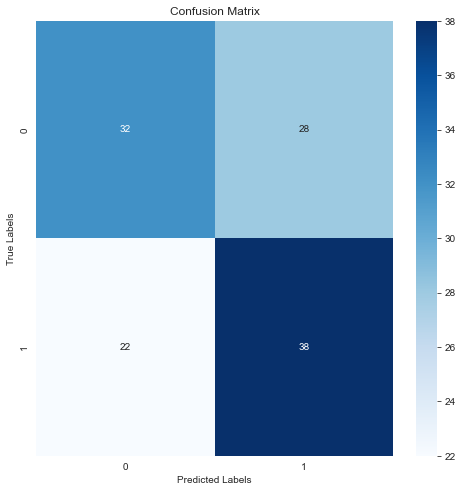

[I 2023-11-02 15:27:12,925] A new study created in memory with name: no-name-3bc946c0-e457-4394-b806-f9c9206c3d22



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.76542


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:28:50,139] Trial 0 finished with value: 0.7654166666666666 and parameters: {'n_d': 39, 'n_a': 53, 'n_steps': 19, 'gamma': 1.27071684148336, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.0628546350361743}. Best is trial 0 with value: 0.7654166666666666.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.83083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:29:49,433] Trial 1 finished with value: 0.8308333333333333 and parameters: {'n_d': 53, 'n_a': 42, 'n_steps': 14, 'gamma': 0.48387813854643535, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.09711215049138788}. Best is trial 1 with value: 0.8308333333333333.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.85639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:30:47,712] Trial 2 finished with value: 0.8563888888888889 and parameters: {'n_d': 54, 'n_a': 8, 'n_steps': 18, 'gamma': 0.20033914544045742, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.05377690642704428}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.74139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:31:21,947] Trial 3 finished with value: 0.7413888888888889 and parameters: {'n_d': 12, 'n_a': 36, 'n_steps': 14, 'gamma': 1.4536150953296112, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.039464005454840224}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.75222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:31:29,767] Trial 4 finished with value: 0.7522222222222221 and parameters: {'n_d': 12, 'n_a': 55, 'n_steps': 6, 'gamma': 1.5020453887202398, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.06325842890092356}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_auc = 0.8275


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:33:25,197] Trial 5 finished with value: 0.8275 and parameters: {'n_d': 60, 'n_a': 30, 'n_steps': 11, 'gamma': 0.2950210563046922, 'n_independent': 8, 'n_shared': 9, 'lambda_sparse': 0.029702523309692214}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.56167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:33:48,874] Trial 6 finished with value: 0.5616666666666666 and parameters: {'n_d': 12, 'n_a': 45, 'n_steps': 12, 'gamma': 0.8022621712713185, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.09229530006494464}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.81944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:35:08,848] Trial 7 finished with value: 0.8194444444444444 and parameters: {'n_d': 49, 'n_a': 47, 'n_steps': 14, 'gamma': 0.38185980076944115, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.02618060338522408}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 61 with best_epoch = 51 and best_val_0_auc = 0.79722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:36:32,733] Trial 8 finished with value: 0.7972222222222222 and parameters: {'n_d': 30, 'n_a': 64, 'n_steps': 5, 'gamma': 1.4043796309121552, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.018565070431182266}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.81333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:37:05,557] Trial 9 finished with value: 0.8133333333333332 and parameters: {'n_d': 54, 'n_a': 29, 'n_steps': 10, 'gamma': 0.7618444190182034, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.0013577100468641161}. Best is trial 2 with value: 0.8563888888888889.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.83389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:37:46,857] Trial 10 finished with value: 0.8338888888888888 and parameters: {'n_d': 38, 'n_a': 10, 'n_steps': 19, 'gamma': 0.15908581806650202, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.04824179280170976}. Best is trial 2 with value: 0.8563888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 6.05131 |  0:00:01s
epoch 1  | loss: 2.05389 |  0:00:03s
epoch 2  | loss: 1.3784  |  0:00:05s
epoch 3  | loss: 1.20952 |  0:00:06s
epoch 4  | loss: 1.238   |  0:00:08s
epoch 5  | loss: 1.30999 |  0:00:10s
epoch 6  | loss: 1.08838 |  0:00:12s
epoch 7  | loss: 1.02786 |  0:00:13s
epoch 8  | loss: 0.99822 |  0:00:15s
epoch 9  | loss: 0.90372 |  0:00:17s
epoch 10 | loss: 0.83908 |  0:00:18s
epoch 11 | loss: 0.79801 |  0:00:20s
epoch 12 | loss: 0.7732  |  0:00:22s
epoch 13 | loss: 0.79298 |  0:00:24s
epoch 14 | loss: 0.74085 |  0:00:26s
epoch 15 | loss: 0.7716  |  0:00:27s
epoch 16 | loss: 0.79619 |  0:00:29s
epoch 17 | loss: 0.73933 |  0:00:31s
epoch 18 | loss: 0.72247 |  0:00:33s
epoch 19 | loss: 0.71592 |  0:00:34s
epoch 20 | loss: 0.69754 |  0:00:36s
epoch 21 | loss: 0.72841 |  0:00:38s
epoch 22 | loss: 0.70659 |  0:00:40s
epoch 23 | loss: 0.6958  |  0:00:41s
epoch 24 | loss: 0.6877  |  0:00:43s
epoch 25 | loss: 0.67919 |  0:00:45s
epoch 26 | loss: 0.6715  |  0:00:47s
e

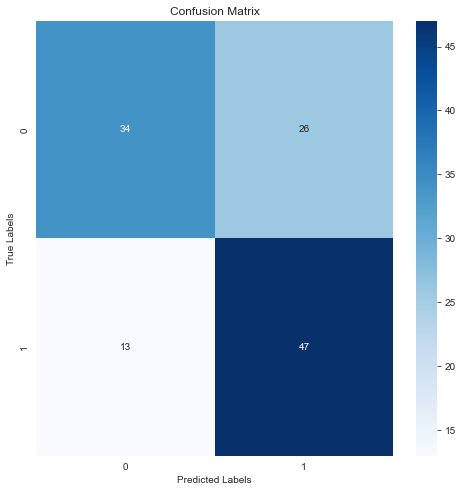

[I 2023-11-02 15:40:42,785] A new study created in memory with name: no-name-14a6b67a-da24-4f15-b12e-d3ea2f450dd1



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.71722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:42:53,640] Trial 0 finished with value: 0.7172222222222222 and parameters: {'n_d': 56, 'n_a': 9, 'n_steps': 19, 'gamma': 0.20841737832540652, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.06672542530855098}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.67806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:43:03,209] Trial 1 finished with value: 0.6780555555555555 and parameters: {'n_d': 12, 'n_a': 39, 'n_steps': 2, 'gamma': 1.608274014294965, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.049327103566461264}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.69528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:43:26,493] Trial 2 finished with value: 0.6952777777777778 and parameters: {'n_d': 18, 'n_a': 31, 'n_steps': 13, 'gamma': 0.26057493444271906, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.06576859755806898}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.55639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:43:58,953] Trial 3 finished with value: 0.5563888888888888 and parameters: {'n_d': 33, 'n_a': 22, 'n_steps': 17, 'gamma': 1.3338485481994098, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.0832073527254345}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.7075


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:44:17,740] Trial 4 finished with value: 0.7075 and parameters: {'n_d': 55, 'n_a': 51, 'n_steps': 9, 'gamma': 0.14566534107304105, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.0974129985931965}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.69667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:44:38,377] Trial 5 finished with value: 0.6966666666666665 and parameters: {'n_d': 55, 'n_a': 46, 'n_steps': 18, 'gamma': 1.9661723342424329, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.001909427200602377}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.63889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:44:52,902] Trial 6 finished with value: 0.638888888888889 and parameters: {'n_d': 9, 'n_a': 59, 'n_steps': 5, 'gamma': 1.2693010069428246, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.06818087807817218}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.64556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:45:41,237] Trial 7 finished with value: 0.6455555555555554 and parameters: {'n_d': 59, 'n_a': 38, 'n_steps': 11, 'gamma': 1.221080588508279, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.07430386810138898}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.71222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:46:06,537] Trial 8 finished with value: 0.7122222222222222 and parameters: {'n_d': 58, 'n_a': 27, 'n_steps': 10, 'gamma': 0.5034769874468781, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.0717477848311028}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.70583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:46:19,616] Trial 9 finished with value: 0.7058333333333334 and parameters: {'n_d': 45, 'n_a': 51, 'n_steps': 2, 'gamma': 1.8902022712559843, 'n_independent': 6, 'n_shared': 5, 'lambda_sparse': 0.008156209923062053}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.68667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:47:42,634] Trial 10 finished with value: 0.6866666666666665 and parameters: {'n_d': 38, 'n_a': 9, 'n_steps': 15, 'gamma': 0.7282667627886696, 'n_independent': 8, 'n_shared': 10, 'lambda_sparse': 0.04279307911161168}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.67389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:47:52,714] Trial 11 finished with value: 0.6738888888888889 and parameters: {'n_d': 64, 'n_a': 11, 'n_steps': 7, 'gamma': 0.5548333058222046, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.054062486979664225}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.68625


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:48:30,145] Trial 12 finished with value: 0.68625 and parameters: {'n_d': 47, 'n_a': 20, 'n_steps': 12, 'gamma': 0.4939955217239288, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.08904609868217826}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.59917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:49:48,458] Trial 13 finished with value: 0.5991666666666667 and parameters: {'n_d': 49, 'n_a': 22, 'n_steps': 19, 'gamma': 0.8896574446537147, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.07772656331920808}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.68444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:50:04,019] Trial 14 finished with value: 0.6844444444444444 and parameters: {'n_d': 29, 'n_a': 29, 'n_steps': 8, 'gamma': 0.10724256252229691, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.09934769288892734}. Best is trial 0 with value: 0.7172222222222222.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.70083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:51:37,842] Trial 15 finished with value: 0.7008333333333333 and parameters: {'n_d': 64, 'n_a': 15, 'n_steps': 15, 'gamma': 0.4262547117508436, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.061915303949579156}. Best is trial 0 with value: 0.7172222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 3.98911 |  0:00:03s
epoch 1  | loss: 4.41913 |  0:00:07s
epoch 2  | loss: 4.4627  |  0:00:10s
epoch 3  | loss: 3.60715 |  0:00:14s
epoch 4  | loss: 2.5083  |  0:00:18s
epoch 5  | loss: 3.45602 |  0:00:21s
epoch 6  | loss: 2.23641 |  0:00:25s
epoch 7  | loss: 1.50738 |  0:00:28s
epoch 8  | loss: 1.36654 |  0:00:32s
epoch 9  | loss: 1.52753 |  0:00:36s
epoch 10 | loss: 1.26099 |  0:00:39s
epoch 11 | loss: 1.28156 |  0:00:43s
epoch 12 | loss: 1.22035 |  0:00:47s
epoch 13 | loss: 1.00991 |  0:00:50s
epoch 14 | loss: 0.91661 |  0:00:54s
epoch 15 | loss: 0.88155 |  0:00:58s
epoch 16 | loss: 0.81715 |  0:01:01s
epoch 17 | loss: 0.80033 |  0:01:05s
epoch 18 | loss: 0.80676 |  0:01:09s
epoch 19 | loss: 0.7451  |  0:01:13s
epoch 20 | loss: 0.74374 |  0:01:16s
epoch 21 | loss: 0.75493 |  0:01:20s
epoch 22 | loss: 0.74767 |  0:01:24s
epoch 23 | loss: 0.73605 |  0:01:27s
epoch 24 | loss: 0.73564 |  0:01:31s
epoch 25 | loss: 0.738   |  0:01:35s
epoch 26 | loss: 0.72216 |  0:01:38s
e

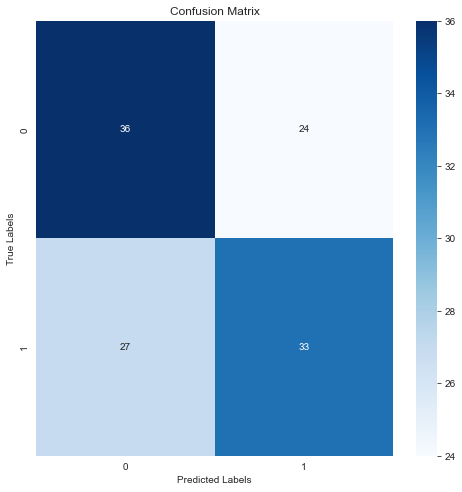

[I 2023-11-02 15:57:46,910] A new study created in memory with name: no-name-a01726fe-0e82-4702-9f6d-86cbf8207868



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.83611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:58:48,564] Trial 0 finished with value: 0.836111111111111 and parameters: {'n_d': 21, 'n_a': 41, 'n_steps': 16, 'gamma': 0.28606101043240867, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.07891478572476011}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.51125


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:59:27,834] Trial 1 finished with value: 0.51125 and parameters: {'n_d': 25, 'n_a': 10, 'n_steps': 19, 'gamma': 1.098684669418074, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.09566438214466134}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.77472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 15:59:49,664] Trial 2 finished with value: 0.7747222222222222 and parameters: {'n_d': 59, 'n_a': 9, 'n_steps': 12, 'gamma': 1.5421833255652253, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.001754283128126297}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.83111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:00:21,609] Trial 3 finished with value: 0.8311111111111111 and parameters: {'n_d': 46, 'n_a': 46, 'n_steps': 4, 'gamma': 0.5676593899336834, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.054264305815857256}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.68625


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:01:33,650] Trial 4 finished with value: 0.6862499999999999 and parameters: {'n_d': 30, 'n_a': 33, 'n_steps': 14, 'gamma': 1.132639306240273, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.007768161881505563}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.81639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:01:52,642] Trial 5 finished with value: 0.8163888888888888 and parameters: {'n_d': 26, 'n_a': 45, 'n_steps': 5, 'gamma': 1.2211169377938018, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.0161721839514923}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.78028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:02:08,987] Trial 6 finished with value: 0.7802777777777777 and parameters: {'n_d': 37, 'n_a': 33, 'n_steps': 19, 'gamma': 1.2823298057265609, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.03378703209702228}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.77222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:02:18,498] Trial 7 finished with value: 0.7722222222222221 and parameters: {'n_d': 61, 'n_a': 25, 'n_steps': 5, 'gamma': 1.5318673551487292, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.05433505103146323}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_auc = 0.73972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:04:45,683] Trial 8 finished with value: 0.7397222222222222 and parameters: {'n_d': 38, 'n_a': 18, 'n_steps': 15, 'gamma': 1.1463920277871076, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.04394513461743365}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.82361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:04:59,121] Trial 9 finished with value: 0.8236111111111111 and parameters: {'n_d': 31, 'n_a': 43, 'n_steps': 12, 'gamma': 0.3136792413930119, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.009318472487096932}. Best is trial 0 with value: 0.836111111111111.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.86389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:05:10,469] Trial 10 finished with value: 0.8638888888888889 and parameters: {'n_d': 8, 'n_a': 64, 'n_steps': 8, 'gamma': 0.1520394495941363, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.08657790243831177}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.85


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:05:23,018] Trial 11 finished with value: 0.8499999999999999 and parameters: {'n_d': 8, 'n_a': 63, 'n_steps': 8, 'gamma': 0.10392343810383561, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.08553378766052151}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.82806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:05:37,481] Trial 12 finished with value: 0.8280555555555555 and parameters: {'n_d': 8, 'n_a': 64, 'n_steps': 8, 'gamma': 0.12681349948901366, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.0989699779037281}. Best is trial 10 with value: 0.8638888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:05:41,606] Trial 13 finished with value: 0.8183333333333334 and parameters: {'n_d': 12, 'n_a': 64, 'n_steps': 1, 'gamma': 0.4832278166704169, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.07832036628663486}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.81833

Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.82278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:05:59,278] Trial 14 finished with value: 0.8227777777777777 and parameters: {'n_d': 15, 'n_a': 55, 'n_steps': 8, 'gamma': 0.7417148062612279, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.07567296780102237}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.84694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:06:37,046] Trial 15 finished with value: 0.8469444444444445 and parameters: {'n_d': 17, 'n_a': 55, 'n_steps': 9, 'gamma': 0.12745227678090562, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.06915253205611806}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.82778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:06:56,581] Trial 16 finished with value: 0.8277777777777778 and parameters: {'n_d': 8, 'n_a': 56, 'n_steps': 11, 'gamma': 0.8279149873409511, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.08886686281364786}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.79556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:07:26,483] Trial 17 finished with value: 0.7955555555555556 and parameters: {'n_d': 47, 'n_a': 59, 'n_steps': 7, 'gamma': 1.980180944702211, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.08673973491588693}. Best is trial 10 with value: 0.8638888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:07:35,680] Trial 18 finished with value: 0.8236111111111112 and parameters: {'n_d': 19, 'n_a': 51, 'n_steps': 2, 'gamma': 0.4175330247271663, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.0682493385594719}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.82361

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.86028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:07:44,138] Trial 19 finished with value: 0.8602777777777777 and parameters: {'n_d': 13, 'n_a': 49, 'n_steps': 6, 'gamma': 0.10625444021006258, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.09906521884764151}. Best is trial 10 with value: 0.8638888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:07:51,302] Trial 20 finished with value: 0.8241666666666666 and parameters: {'n_d': 23, 'n_a': 51, 'n_steps': 3, 'gamma': 0.6362372003840716, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.09793860963035166}. Best is trial 10 with value: 0.8638888888888889.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.82417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.3982  |  0:00:00s
epoch 1  | loss: 0.92491 |  0:00:01s
epoch 2  | loss: 0.85917 |  0:00:02s
epoch 3  | loss: 0.83069 |  0:00:02s
epoch 4  | loss: 0.80004 |  0:00:03s
epoch 5  | loss: 0.78032 |  0:00:04s
epoch 6  | loss: 0.77227 |  0:00:04s
epoch 7  | loss: 0.75367 |  0:00:05s
epoch 8  | loss: 0.74621 |  0:00:06s
epoch 9  | loss: 0.74479 |  0:00:06s
epoch 10 | loss: 0.72201 |  0:00:07s
epoch 11 | loss: 0.72815 |  0:00:08s
epoch 12 | loss: 0.70688 |  0:00:09s
epoch 13 | loss: 0.6974  |  0:00:09s
epoch 14 | loss: 0.69152 |  0:00:10s
epoch 15 | loss: 0.6768  |  0:00:11s
epoch 16 | loss: 0.68554 |  0:00:11s
epoch 17 | loss: 0.67236 |  0:00:12s
epoch 18 | loss: 0.66728 |  0:00:13s
epoch 19 | loss: 0.66248 |  0:00:13s
epoch 20 | loss: 0.64597 |  0:00:14s
epoch 21 | loss: 0.63984 |  0:00:15s
epoch 22 | loss: 0.63083 |  0:00:16s
epoch 23 | loss: 0.61685 |  0:00:16s
epoch 24 | loss: 0.60936 |  0:00:17s
epoch 25 | loss: 0.59837 |  0:00:18s
epoch 26 | loss: 0.58321 |  0:00:18s
e

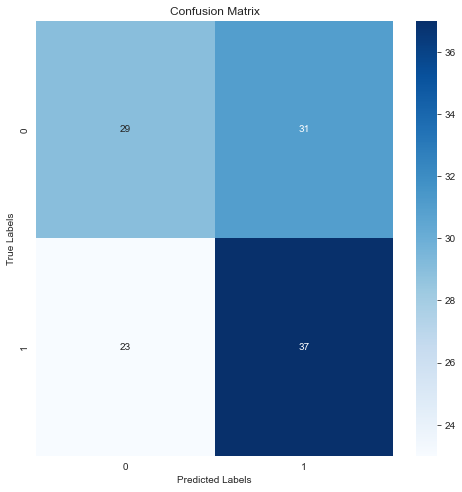

[I 2023-11-02 16:09:01,148] A new study created in memory with name: no-name-90aeee10-2023-4981-bbb0-eeab5cb8f416



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.72694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:09:50,809] Trial 0 finished with value: 0.7269444444444445 and parameters: {'n_d': 12, 'n_a': 28, 'n_steps': 9, 'gamma': 1.2730523932464748, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.03393653727446176}. Best is trial 0 with value: 0.7269444444444445.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.73


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:10:41,859] Trial 1 finished with value: 0.73 and parameters: {'n_d': 56, 'n_a': 36, 'n_steps': 12, 'gamma': 1.5140099848837174, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.04173572304005009}. Best is trial 1 with value: 0.73.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.765


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:10:58,292] Trial 2 finished with value: 0.7650000000000001 and parameters: {'n_d': 36, 'n_a': 53, 'n_steps': 8, 'gamma': 0.308366370823949, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.005873691462789662}. Best is trial 2 with value: 0.7650000000000001.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.75944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:11:34,588] Trial 3 finished with value: 0.7594444444444445 and parameters: {'n_d': 30, 'n_a': 9, 'n_steps': 12, 'gamma': 0.3062723229383365, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.08205657606744557}. Best is trial 2 with value: 0.7650000000000001.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.76722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:11:54,226] Trial 4 finished with value: 0.7672222222222221 and parameters: {'n_d': 48, 'n_a': 39, 'n_steps': 10, 'gamma': 0.9798052683372434, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.008612084918313771}. Best is trial 4 with value: 0.7672222222222221.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.71


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:12:13,829] Trial 5 finished with value: 0.71 and parameters: {'n_d': 58, 'n_a': 36, 'n_steps': 14, 'gamma': 0.7026998091095433, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.09483942918019923}. Best is trial 4 with value: 0.7672222222222221.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.77278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:12:23,386] Trial 6 finished with value: 0.7727777777777779 and parameters: {'n_d': 9, 'n_a': 11, 'n_steps': 7, 'gamma': 0.9360003004022073, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.07123762976688573}. Best is trial 6 with value: 0.7727777777777779.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.59139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:03,122] Trial 7 finished with value: 0.591388888888889 and parameters: {'n_d': 56, 'n_a': 19, 'n_steps': 17, 'gamma': 1.2728910120267247, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.0699925375835747}. Best is trial 6 with value: 0.7727777777777779.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.76361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:14,643] Trial 8 finished with value: 0.7636111111111111 and parameters: {'n_d': 58, 'n_a': 18, 'n_steps': 7, 'gamma': 0.44544416227282246, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.07735835157581222}. Best is trial 6 with value: 0.7727777777777779.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.76472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:40,518] Trial 9 finished with value: 0.7647222222222222 and parameters: {'n_d': 45, 'n_a': 30, 'n_steps': 6, 'gamma': 1.7367126690532688, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.03555485236786869}. Best is trial 6 with value: 0.7727777777777779.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:42,442] Trial 10 finished with value: 0.7425 and parameters: {'n_d': 9, 'n_a': 60, 'n_steps': 1, 'gamma': 1.8916653314260614, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.062231584985283764}. Best is trial 6 with value: 0.7727777777777779.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.7425


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:46,898] Trial 11 finished with value: 0.8088888888888889 and parameters: {'n_d': 23, 'n_a': 48, 'n_steps': 3, 'gamma': 0.8503769223827142, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.003094630561092164}. Best is trial 11 with value: 0.8088888888888889.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.80889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:51,675] Trial 12 finished with value: 0.8019444444444443 and parameters: {'n_d': 21, 'n_a': 51, 'n_steps': 3, 'gamma': 0.8626532297664617, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.05585572179506027}. Best is trial 11 with value: 0.8088888888888889.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.80194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:13:55,551] Trial 13 finished with value: 0.82 and parameters: {'n_d': 22, 'n_a': 50, 'n_steps': 2, 'gamma': 0.7255838912226106, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.05377629002187749}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.82


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:14:01,064] Trial 14 finished with value: 0.7794444444444445 and parameters: {'n_d': 23, 'n_a': 46, 'n_steps': 4, 'gamma': 0.570941459450254, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.02411284360224942}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.77944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:14:02,561] Trial 15 finished with value: 0.7609722222222222 and parameters: {'n_d': 21, 'n_a': 63, 'n_steps': 1, 'gamma': 0.15172912172041764, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.047911253798425424}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.76097


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:14:08,730] Trial 16 finished with value: 0.7930555555555555 and parameters: {'n_d': 30, 'n_a': 47, 'n_steps': 3, 'gamma': 0.6358861832903445, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.02252404569861243}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.79306

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.81028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:14:17,918] Trial 17 finished with value: 0.8102777777777777 and parameters: {'n_d': 15, 'n_a': 55, 'n_steps': 5, 'gamma': 0.7790710341340314, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.05143787128141523}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.77056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:14:45,694] Trial 18 finished with value: 0.7705555555555555 and parameters: {'n_d': 14, 'n_a': 57, 'n_steps': 5, 'gamma': 1.0873749293272719, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.055945196015453766}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.77194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:16:23,238] Trial 19 finished with value: 0.7719444444444444 and parameters: {'n_d': 16, 'n_a': 42, 'n_steps': 18, 'gamma': 0.7144162267345449, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.0485154370521366}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.78472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:16:28,992] Trial 20 finished with value: 0.7847222222222222 and parameters: {'n_d': 31, 'n_a': 55, 'n_steps': 1, 'gamma': 1.1174772255731806, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.06069859124089594}. Best is trial 13 with value: 0.82.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:16:35,388] Trial 21 finished with value: 0.7805555555555556 and parameters: {'n_d': 25, 'n_a': 47, 'n_steps': 3, 'gamma': 0.7949136767498985, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.04319366347296691}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.78056

Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.75722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:16:47,989] Trial 22 finished with value: 0.7572222222222221 and parameters: {'n_d': 17, 'n_a': 51, 'n_steps': 5, 'gamma': 0.5126810385000058, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.002806035970867753}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.80056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:17:01,582] Trial 23 finished with value: 0.8005555555555556 and parameters: {'n_d': 26, 'n_a': 63, 'n_steps': 3, 'gamma': 0.8670263827215625, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.01878870489473637}. Best is trial 13 with value: 0.82.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:17:06,234] Trial 24 finished with value: 0.7725000000000001 and parameters: {'n_d': 40, 'n_a': 43, 'n_steps': 5, 'gamma': 0.7524922429803688, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.033542176424259516}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.7725


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:17:08,799] Trial 25 finished with value: 0.7861111111111112 and parameters: {'n_d': 17, 'n_a': 59, 'n_steps': 2, 'gamma': 0.6118720773146546, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.013375282581354099}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.78611

Early stopping occurred at epoch 48 with best_epoch = 38 and best_val_0_auc = 0.81083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:17:47,591] Trial 26 finished with value: 0.8108333333333333 and parameters: {'n_d': 35, 'n_a': 49, 'n_steps': 6, 'gamma': 0.9904497010671393, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.05195448824017499}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.78278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:18:38,808] Trial 27 finished with value: 0.7827777777777778 and parameters: {'n_d': 64, 'n_a': 53, 'n_steps': 7, 'gamma': 1.0505095492928282, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.052639659153325226}. Best is trial 13 with value: 0.82.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.75722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:19:09,694] Trial 28 finished with value: 0.7572222222222221 and parameters: {'n_d': 36, 'n_a': 30, 'n_steps': 9, 'gamma': 1.2040984746726067, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.06362297945859517}. Best is trial 13 with value: 0.82.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82376 |  0:00:00s
epoch 1  | loss: 0.71386 |  0:00:00s
epoch 2  | loss: 0.69042 |  0:00:00s
epoch 3  | loss: 0.66802 |  0:00:00s
epoch 4  | loss: 0.64877 |  0:00:00s
epoch 5  | loss: 0.64348 |  0:00:00s
epoch 6  | loss: 0.63541 |  0:00:01s
epoch 7  | loss: 0.63049 |  0:00:01s
epoch 8  | loss: 0.62779 |  0:00:01s
epoch 9  | loss: 0.61828 |  0:00:01s
epoch 10 | loss: 0.6085  |  0:00:01s
epoch 11 | loss: 0.61427 |  0:00:01s
epoch 12 | loss: 0.61626 |  0:00:02s
epoch 13 | loss: 0.60828 |  0:00:02s
epoch 14 | loss: 0.59698 |  0:00:02s
epoch 15 | loss: 0.60095 |  0:00:02s
epoch 16 | loss: 0.60276 |  0:00:02s
epoch 17 | loss: 0.58888 |  0:00:02s
epoch 18 | loss: 0.58475 |  0:00:03s
epoch 19 | loss: 0.59352 |  0:00:03s
epoch 20 | loss: 0.58413 |  0:00:03s
epoch 21 | loss: 0.58609 |  0:00:03s
epoch 22 | loss: 0.58346 |  0:00:03s
epoch 23 | loss: 0.5734  |  0:00:03s
epoch 24 | loss: 0.57436 |  0:00:03s
epoch 25 | loss: 0.57676 |  0:00:04s
epoch 26 | loss: 0.56493 |  0:00:04s
e

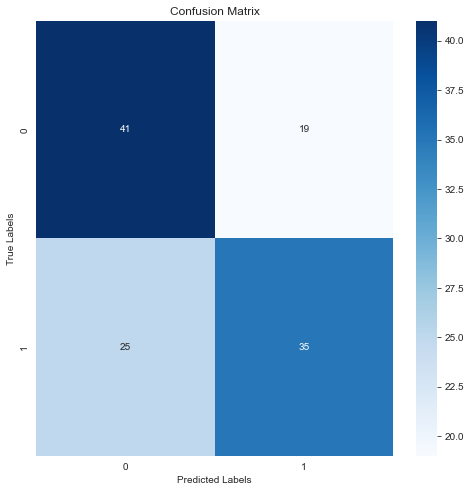

[I 2023-11-02 16:19:25,821] A new study created in memory with name: no-name-cd7d531f-6b54-4be0-b293-3fd7821c7c61



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.7625


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:19:33,280] Trial 0 finished with value: 0.7625000000000001 and parameters: {'n_d': 56, 'n_a': 50, 'n_steps': 4, 'gamma': 1.5719530250329778, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.027289008071395313}. Best is trial 0 with value: 0.7625000000000001.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.78667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:20:06,897] Trial 1 finished with value: 0.7866666666666666 and parameters: {'n_d': 55, 'n_a': 52, 'n_steps': 15, 'gamma': 1.9727903712432513, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.06146729243690649}. Best is trial 1 with value: 0.7866666666666666.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.795


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:21:16,623] Trial 2 finished with value: 0.795 and parameters: {'n_d': 31, 'n_a': 29, 'n_steps': 17, 'gamma': 1.0224181650511996, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.011055063952611867}. Best is trial 2 with value: 0.795.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.73583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:21:34,269] Trial 3 finished with value: 0.7358333333333333 and parameters: {'n_d': 30, 'n_a': 21, 'n_steps': 10, 'gamma': 1.5910910120543627, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.0898094667533624}. Best is trial 2 with value: 0.795.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.79722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:21:46,429] Trial 4 finished with value: 0.7972222222222223 and parameters: {'n_d': 18, 'n_a': 49, 'n_steps': 10, 'gamma': 1.8384411952033803, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.07049336057979955}. Best is trial 4 with value: 0.7972222222222223.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.80333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:23:36,937] Trial 5 finished with value: 0.8033333333333333 and parameters: {'n_d': 34, 'n_a': 36, 'n_steps': 16, 'gamma': 0.4088260043555074, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.013339689535963812}. Best is trial 5 with value: 0.8033333333333333.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.77611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:24:23,932] Trial 6 finished with value: 0.7761111111111112 and parameters: {'n_d': 45, 'n_a': 45, 'n_steps': 16, 'gamma': 0.3732880184175872, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.018170565613332502}. Best is trial 5 with value: 0.8033333333333333.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.81167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:24:36,351] Trial 7 finished with value: 0.8116666666666666 and parameters: {'n_d': 36, 'n_a': 56, 'n_steps': 2, 'gamma': 0.4365622097762818, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.06212958288019571}. Best is trial 7 with value: 0.8116666666666666.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.79667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:24:48,196] Trial 8 finished with value: 0.7966666666666666 and parameters: {'n_d': 23, 'n_a': 44, 'n_steps': 5, 'gamma': 1.4215402324583704, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.09624603903325703}. Best is trial 7 with value: 0.8116666666666666.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.80667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:25:44,412] Trial 9 finished with value: 0.8066666666666666 and parameters: {'n_d': 56, 'n_a': 62, 'n_steps': 9, 'gamma': 0.5135738658318701, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.06181633736176191}. Best is trial 7 with value: 0.8116666666666666.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:25:48,651] Trial 10 finished with value: 0.7616666666666666 and parameters: {'n_d': 9, 'n_a': 64, 'n_steps': 1, 'gamma': 0.15297417527382962, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.038898362380720586}. Best is trial 7 with value: 0.8116666666666666.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.76167

Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.77667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:26:44,287] Trial 11 finished with value: 0.7766666666666666 and parameters: {'n_d': 43, 'n_a': 64, 'n_steps': 7, 'gamma': 0.7518162888136533, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.051433201507565425}. Best is trial 7 with value: 0.8116666666666666.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.81306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:26:59,232] Trial 12 finished with value: 0.8130555555555555 and parameters: {'n_d': 62, 'n_a': 58, 'n_steps': 1, 'gamma': 0.6775656309174569, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.06917919074132374}. Best is trial 12 with value: 0.8130555555555555.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.79486


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:27:12,859] Trial 13 finished with value: 0.7948611111111111 and parameters: {'n_d': 64, 'n_a': 11, 'n_steps': 1, 'gamma': 0.8336786635083624, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.07849582261126548}. Best is trial 12 with value: 0.8130555555555555.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.78806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:27:25,941] Trial 14 finished with value: 0.7880555555555555 and parameters: {'n_d': 43, 'n_a': 57, 'n_steps': 4, 'gamma': 0.10592937347474257, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.046924520305711245}. Best is trial 12 with value: 0.8130555555555555.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.80361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:28:16,197] Trial 15 finished with value: 0.8036111111111112 and parameters: {'n_d': 47, 'n_a': 37, 'n_steps': 13, 'gamma': 0.6652594143387436, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.08325041760283897}. Best is trial 12 with value: 0.8130555555555555.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.76583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:28:23,623] Trial 16 finished with value: 0.7658333333333334 and parameters: {'n_d': 64, 'n_a': 56, 'n_steps': 2, 'gamma': 1.0078229141608916, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.07056087216946458}. Best is trial 12 with value: 0.8130555555555555.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.78528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:29:09,090] Trial 17 finished with value: 0.7852777777777777 and parameters: {'n_d': 24, 'n_a': 37, 'n_steps': 7, 'gamma': 0.6056169473679379, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.07837316893365201}. Best is trial 12 with value: 0.8130555555555555.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53542


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:30:00,322] Trial 18 finished with value: 0.5354166666666667 and parameters: {'n_d': 39, 'n_a': 56, 'n_steps': 19, 'gamma': 0.8686817522309249, 'n_independent': 6, 'n_shared': 9, 'lambda_sparse': 0.09838107489928638}. Best is trial 12 with value: 0.8130555555555555.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.89577 |  0:00:00s
epoch 1  | loss: 0.82834 |  0:00:01s
epoch 2  | loss: 0.79349 |  0:00:01s
epoch 3  | loss: 0.76121 |  0:00:02s
epoch 4  | loss: 0.74286 |  0:00:02s
epoch 5  | loss: 0.71141 |  0:00:03s
epoch 6  | loss: 0.68722 |  0:00:03s
epoch 7  | loss: 0.65934 |  0:00:04s
epoch 8  | loss: 0.67074 |  0:00:04s
epoch 9  | loss: 0.65751 |  0:00:05s
epoch 10 | loss: 0.64077 |  0:00:05s
epoch 11 | loss: 0.64842 |  0:00:06s
epoch 12 | loss: 0.63517 |  0:00:06s
epoch 13 | loss: 0.63244 |  0:00:07s
epoch 14 | loss: 0.62006 |  0:00:08s
epoch 15 | loss: 0.61334 |  0:00:08s
epoch 16 | loss: 0.62309 |  0:00:09s
epoch 17 | loss: 0.62047 |  0:00:09s
epoch 18 | loss: 0.62023 |  0:00:10s
epoch 19 | loss: 0.61146 |  0:00:10s
epoch 20 | loss: 0.60407 |  0:00:11s
epoch 21 | loss: 0.60529 |  0:00:11s
epoch 22 | loss: 0.60289 |  0:00:12s
epoch 23 | loss: 0.60158 |  0:00:12s
epoch 24 | loss: 0.59391 |  0:00:13s
epoch 25 | loss: 0.5953  |  0:00:13s
epoch 26 | loss: 0.59655 |  0:00:14s
e

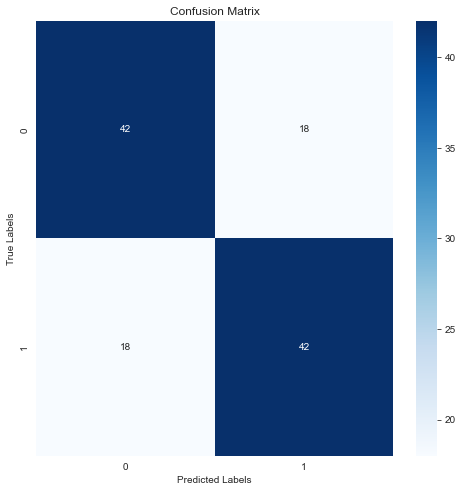

[I 2023-11-02 16:30:52,958] A new study created in memory with name: no-name-bb876f6c-67f4-4b7c-ae36-15bdd5c2b869



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.7125


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:31:18,743] Trial 0 finished with value: 0.7125 and parameters: {'n_d': 60, 'n_a': 19, 'n_steps': 11, 'gamma': 0.4786525030500779, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.055494993735953645}. Best is trial 0 with value: 0.7125.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.69222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:31:28,135] Trial 1 finished with value: 0.6922222222222222 and parameters: {'n_d': 36, 'n_a': 45, 'n_steps': 2, 'gamma': 1.1998641905703877, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.0041373545509611805}. Best is trial 0 with value: 0.7125.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.59083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:32:04,932] Trial 2 finished with value: 0.5908333333333333 and parameters: {'n_d': 38, 'n_a': 9, 'n_steps': 14, 'gamma': 1.7342177431325232, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.06744497564651562}. Best is trial 0 with value: 0.7125.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.69472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:32:12,844] Trial 3 finished with value: 0.6947222222222222 and parameters: {'n_d': 23, 'n_a': 58, 'n_steps': 5, 'gamma': 1.408738324658028, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.037842752418960665}. Best is trial 0 with value: 0.7125.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.74833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:32:46,407] Trial 4 finished with value: 0.7483333333333333 and parameters: {'n_d': 16, 'n_a': 42, 'n_steps': 8, 'gamma': 0.24912824965637023, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.029592609695851865}. Best is trial 4 with value: 0.7483333333333333.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.69958


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:34:01,903] Trial 5 finished with value: 0.6995833333333333 and parameters: {'n_d': 45, 'n_a': 46, 'n_steps': 16, 'gamma': 1.6790756655299184, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.07274478482550845}. Best is trial 4 with value: 0.7483333333333333.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.69153


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:35:21,186] Trial 6 finished with value: 0.6915277777777777 and parameters: {'n_d': 24, 'n_a': 28, 'n_steps': 14, 'gamma': 1.514108794577498, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.02030809454633252}. Best is trial 4 with value: 0.7483333333333333.



Early stopping occurred at epoch 47 with best_epoch = 37 and best_val_0_auc = 0.67472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:38:49,413] Trial 7 finished with value: 0.6747222222222222 and parameters: {'n_d': 39, 'n_a': 19, 'n_steps': 19, 'gamma': 1.9389221590031154, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.050374894299929175}. Best is trial 4 with value: 0.7483333333333333.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.67444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:39:35,174] Trial 8 finished with value: 0.6744444444444444 and parameters: {'n_d': 38, 'n_a': 50, 'n_steps': 15, 'gamma': 1.982749312591188, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.09617453653761329}. Best is trial 4 with value: 0.7483333333333333.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.69889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:41:21,408] Trial 9 finished with value: 0.6988888888888888 and parameters: {'n_d': 63, 'n_a': 56, 'n_steps': 16, 'gamma': 0.8588660317550576, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.09567448802736822}. Best is trial 4 with value: 0.7483333333333333.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.5812  |  0:00:01s
epoch 1  | loss: 1.31554 |  0:00:02s
epoch 2  | loss: 0.98916 |  0:00:04s
epoch 3  | loss: 0.88934 |  0:00:05s
epoch 4  | loss: 0.88951 |  0:00:06s
epoch 5  | loss: 0.81512 |  0:00:08s
epoch 6  | loss: 0.79425 |  0:00:09s
epoch 7  | loss: 0.77204 |  0:00:10s
epoch 8  | loss: 0.73042 |  0:00:12s
epoch 9  | loss: 0.75898 |  0:00:13s
epoch 10 | loss: 0.70347 |  0:00:14s
epoch 11 | loss: 0.69977 |  0:00:16s
epoch 12 | loss: 0.69667 |  0:00:17s
epoch 13 | loss: 0.67664 |  0:00:18s
epoch 14 | loss: 0.65714 |  0:00:20s
epoch 15 | loss: 0.64831 |  0:00:21s
epoch 16 | loss: 0.64321 |  0:00:22s
epoch 17 | loss: 0.63726 |  0:00:24s
epoch 18 | loss: 0.63266 |  0:00:25s
epoch 19 | loss: 0.63327 |  0:00:26s
epoch 20 | loss: 0.62919 |  0:00:28s
epoch 21 | loss: 0.6314  |  0:00:29s
epoch 22 | loss: 0.62681 |  0:00:30s
epoch 23 | loss: 0.61474 |  0:00:32s
epoch 24 | loss: 0.61745 |  0:00:33s
epoch 25 | loss: 0.61924 |  0:00:34s
epoch 26 | loss: 0.60411 |  0:00:36s
e

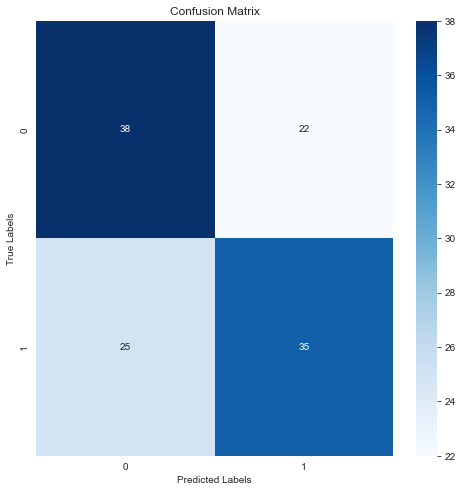

[I 2023-11-02 16:43:35,880] A new study created in memory with name: no-name-ee25cc60-a0d0-4b62-8f8c-0daf8e4871af



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.98333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:43:46,370] Trial 0 finished with value: 0.9833333333333334 and parameters: {'n_d': 39, 'n_a': 26, 'n_steps': 3, 'gamma': 0.11059820077025899, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.04664492346661858}. Best is trial 0 with value: 0.9833333333333334.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.93028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:44:08,389] Trial 1 finished with value: 0.9302777777777778 and parameters: {'n_d': 56, 'n_a': 14, 'n_steps': 11, 'gamma': 1.7980600719626343, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.08957345043731275}. Best is trial 0 with value: 0.9833333333333334.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.98306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:44:30,195] Trial 2 finished with value: 0.9830555555555556 and parameters: {'n_d': 43, 'n_a': 34, 'n_steps': 3, 'gamma': 1.5442083492285361, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.003109532620289428}. Best is trial 0 with value: 0.9833333333333334.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.98278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:45:08,390] Trial 3 finished with value: 0.9827777777777778 and parameters: {'n_d': 16, 'n_a': 61, 'n_steps': 12, 'gamma': 0.809577045375274, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.0072813614673300255}. Best is trial 0 with value: 0.9833333333333334.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.96722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:45:37,921] Trial 4 finished with value: 0.9672222222222222 and parameters: {'n_d': 10, 'n_a': 63, 'n_steps': 9, 'gamma': 0.9471580902453999, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.08784384309608483}. Best is trial 0 with value: 0.9833333333333334.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.93306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:46:04,495] Trial 5 finished with value: 0.9330555555555555 and parameters: {'n_d': 10, 'n_a': 26, 'n_steps': 15, 'gamma': 1.8719112611956206, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.046503736971439696}. Best is trial 0 with value: 0.9833333333333334.



Early stopping occurred at epoch 53 with best_epoch = 43 and best_val_0_auc = 0.98806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:46:48,470] Trial 6 finished with value: 0.9880555555555555 and parameters: {'n_d': 25, 'n_a': 8, 'n_steps': 6, 'gamma': 0.9353882612349917, 'n_independent': 7, 'n_shared': 10, 'lambda_sparse': 0.08563957165471082}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.88306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:47:40,511] Trial 7 finished with value: 0.8830555555555556 and parameters: {'n_d': 54, 'n_a': 33, 'n_steps': 16, 'gamma': 1.5958751883337752, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.0869777407030971}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 56 with best_epoch = 46 and best_val_0_auc = 0.95194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:48:32,446] Trial 8 finished with value: 0.9519444444444445 and parameters: {'n_d': 53, 'n_a': 50, 'n_steps': 9, 'gamma': 1.5660484599275795, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.04024067587091411}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.95139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:49:24,782] Trial 9 finished with value: 0.9513888888888888 and parameters: {'n_d': 61, 'n_a': 51, 'n_steps': 14, 'gamma': 0.2146068332985894, 'n_independent': 9, 'n_shared': 6, 'lambda_sparse': 0.030440567396688645}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.5575


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:49:53,534] Trial 10 finished with value: 0.5575 and parameters: {'n_d': 25, 'n_a': 10, 'n_steps': 19, 'gamma': 1.1739675538210141, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.06885214353066088}. Best is trial 6 with value: 0.9880555555555555.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:49:59,153] Trial 11 finished with value: 0.9819444444444445 and parameters: {'n_d': 32, 'n_a': 19, 'n_steps': 3, 'gamma': 0.12957826215117796, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.06404761599435663}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.98194

Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.96083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:50:11,725] Trial 12 finished with value: 0.9608333333333333 and parameters: {'n_d': 40, 'n_a': 22, 'n_steps': 6, 'gamma': 0.49902255554732033, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.06404469100383059}. Best is trial 6 with value: 0.9880555555555555.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:50:16,344] Trial 13 finished with value: 0.9641666666666666 and parameters: {'n_d': 32, 'n_a': 8, 'n_steps': 1, 'gamma': 0.6706526233765747, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.09950143015030727}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.96417

Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.98722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:50:40,947] Trial 14 finished with value: 0.9872222222222222 and parameters: {'n_d': 22, 'n_a': 43, 'n_steps': 6, 'gamma': 0.4415086008095346, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.05582675710733569}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.94


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:51:10,780] Trial 15 finished with value: 0.94 and parameters: {'n_d': 21, 'n_a': 45, 'n_steps': 7, 'gamma': 1.183887740748214, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.07508569764715105}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.985


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:51:42,122] Trial 16 finished with value: 0.9850000000000001 and parameters: {'n_d': 23, 'n_a': 38, 'n_steps': 6, 'gamma': 0.4882016166743868, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.05908256831955783}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.97028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:52:32,966] Trial 17 finished with value: 0.9702777777777778 and parameters: {'n_d': 30, 'n_a': 42, 'n_steps': 7, 'gamma': 1.0692568772547626, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.07774158473967789}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.98056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:52:59,807] Trial 18 finished with value: 0.9805555555555556 and parameters: {'n_d': 17, 'n_a': 52, 'n_steps': 5, 'gamma': 0.39931822451838406, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.05645491223465747}. Best is trial 6 with value: 0.9880555555555555.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:53:06,279] Trial 19 finished with value: 0.9469444444444445 and parameters: {'n_d': 27, 'n_a': 30, 'n_steps': 1, 'gamma': 0.7310880549074805, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.07568025025284243}. Best is trial 6 with value: 0.9880555555555555.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.94694

Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.97194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:54:08,492] Trial 20 finished with value: 0.9719444444444445 and parameters: {'n_d': 48, 'n_a': 58, 'n_steps': 8, 'gamma': 0.349962533541683, 'n_independent': 8, 'n_shared': 9, 'lambda_sparse': 0.05311675156853416}. Best is trial 6 with value: 0.9880555555555555.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.04802 |  0:00:00s
epoch 1  | loss: 1.38172 |  0:00:01s
epoch 2  | loss: 1.17828 |  0:00:02s
epoch 3  | loss: 1.16129 |  0:00:03s
epoch 4  | loss: 1.0619  |  0:00:04s
epoch 5  | loss: 0.98698 |  0:00:04s
epoch 6  | loss: 0.92073 |  0:00:05s
epoch 7  | loss: 0.90436 |  0:00:06s
epoch 8  | loss: 0.85059 |  0:00:07s
epoch 9  | loss: 0.79584 |  0:00:08s
epoch 10 | loss: 0.78748 |  0:00:08s
epoch 11 | loss: 0.78589 |  0:00:09s
epoch 12 | loss: 0.86128 |  0:00:10s
epoch 13 | loss: 0.86131 |  0:00:11s
epoch 14 | loss: 0.80699 |  0:00:12s
epoch 15 | loss: 0.80227 |  0:00:12s
epoch 16 | loss: 0.79292 |  0:00:13s
epoch 17 | loss: 0.85104 |  0:00:14s
epoch 18 | loss: 0.77776 |  0:00:15s
epoch 19 | loss: 0.73441 |  0:00:16s
epoch 20 | loss: 0.73046 |  0:00:16s
epoch 21 | loss: 0.70507 |  0:00:17s
epoch 22 | loss: 0.72484 |  0:00:18s
epoch 23 | loss: 0.71635 |  0:00:19s
epoch 24 | loss: 0.69981 |  0:00:19s
epoch 25 | loss: 0.69665 |  0:00:20s
epoch 26 | loss: 0.69739 |  0:00:21s
e

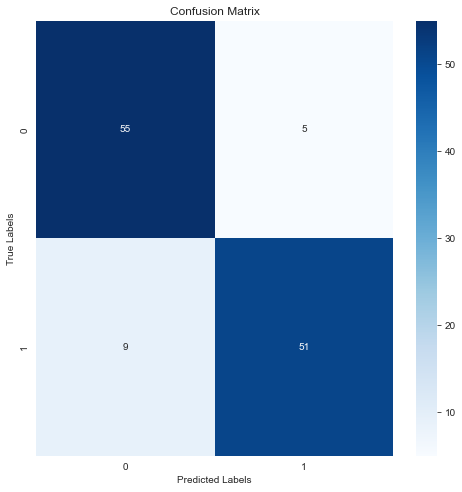

[I 2023-11-02 16:55:28,244] A new study created in memory with name: no-name-e16abbe0-8bd7-46b4-92d2-29d801bd6717



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.61444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:55:43,305] Trial 0 finished with value: 0.6144444444444445 and parameters: {'n_d': 19, 'n_a': 37, 'n_steps': 10, 'gamma': 0.8832689656056156, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.05113629322458039}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.5525


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:56:00,567] Trial 1 finished with value: 0.5524999999999999 and parameters: {'n_d': 53, 'n_a': 63, 'n_steps': 7, 'gamma': 0.9569660048901557, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.03399778928766522}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.5475


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:56:29,686] Trial 2 finished with value: 0.5475 and parameters: {'n_d': 14, 'n_a': 54, 'n_steps': 16, 'gamma': 0.5312370081078162, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.045723751820289545}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.56333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:56:39,052] Trial 3 finished with value: 0.5633333333333334 and parameters: {'n_d': 22, 'n_a': 40, 'n_steps': 15, 'gamma': 1.774248081066656, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.05125252428166586}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:56:46,316] Trial 4 finished with value: 0.5497222222222222 and parameters: {'n_d': 48, 'n_a': 24, 'n_steps': 6, 'gamma': 1.309708821706409, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.09955985943237472}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.58194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:57:14,571] Trial 5 finished with value: 0.5819444444444445 and parameters: {'n_d': 24, 'n_a': 50, 'n_steps': 9, 'gamma': 1.0991781868953172, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.007313985218637126}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.51389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:57:20,611] Trial 6 finished with value: 0.5138888888888888 and parameters: {'n_d': 12, 'n_a': 14, 'n_steps': 3, 'gamma': 0.6228358394549124, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.012715068902952455}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.57278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:57:59,551] Trial 7 finished with value: 0.5727777777777778 and parameters: {'n_d': 59, 'n_a': 46, 'n_steps': 7, 'gamma': 1.6092658483790885, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.08731862801006741}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.54806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:58:11,811] Trial 8 finished with value: 0.5480555555555556 and parameters: {'n_d': 11, 'n_a': 27, 'n_steps': 7, 'gamma': 1.6612237517096853, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.04586500126756518}. Best is trial 0 with value: 0.6144444444444445.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:58:15,352] Trial 9 finished with value: 0.5236111111111111 and parameters: {'n_d': 22, 'n_a': 47, 'n_steps': 2, 'gamma': 1.5224836452816077, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.03272778356225988}. Best is trial 0 with value: 0.6144444444444445.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.52361

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.63583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:58:29,403] Trial 10 finished with value: 0.6358333333333334 and parameters: {'n_d': 38, 'n_a': 31, 'n_steps': 13, 'gamma': 0.16970743748628092, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.06881096960722845}. Best is trial 10 with value: 0.6358333333333334.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.66056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:58:48,042] Trial 11 finished with value: 0.6605555555555556 and parameters: {'n_d': 37, 'n_a': 31, 'n_steps': 13, 'gamma': 0.1129568337087199, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.06980836466538906}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.59417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 16:59:13,534] Trial 12 finished with value: 0.5941666666666666 and parameters: {'n_d': 37, 'n_a': 27, 'n_steps': 13, 'gamma': 0.1276783676616875, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.07239631084856317}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.52889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:00:00,781] Trial 13 finished with value: 0.5288888888888889 and parameters: {'n_d': 36, 'n_a': 9, 'n_steps': 19, 'gamma': 0.11874503442801776, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.07470255550429944}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.61889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:00:25,434] Trial 14 finished with value: 0.6188888888888889 and parameters: {'n_d': 36, 'n_a': 22, 'n_steps': 13, 'gamma': 0.39233647410759354, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.06762552875854196}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.61847


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:00:52,864] Trial 15 finished with value: 0.6184722222222223 and parameters: {'n_d': 41, 'n_a': 32, 'n_steps': 13, 'gamma': 0.3535004877203024, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.06431019150156368}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.61389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:01:11,320] Trial 16 finished with value: 0.6138888888888888 and parameters: {'n_d': 29, 'n_a': 17, 'n_steps': 18, 'gamma': 0.6961965940997336, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.08406265261409918}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.63444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:01:54,005] Trial 17 finished with value: 0.6344444444444444 and parameters: {'n_d': 44, 'n_a': 34, 'n_steps': 12, 'gamma': 0.25895065686493973, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.06121831159937898}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.6225


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:02:16,710] Trial 18 finished with value: 0.6225 and parameters: {'n_d': 31, 'n_a': 41, 'n_steps': 16, 'gamma': 0.44997880215710395, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.07850669192388993}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.625


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:02:31,921] Trial 19 finished with value: 0.625 and parameters: {'n_d': 63, 'n_a': 30, 'n_steps': 11, 'gamma': 0.10244322525413752, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.0923011599384239}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.57167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:03:33,296] Trial 20 finished with value: 0.5716666666666667 and parameters: {'n_d': 52, 'n_a': 19, 'n_steps': 15, 'gamma': 1.993848471030037, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.08078381213701966}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:03:50,114] Trial 21 finished with value: 0.5680555555555554 and parameters: {'n_d': 45, 'n_a': 34, 'n_steps': 12, 'gamma': 0.24907835187791413, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.06515335054733204}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.60167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:04:12,115] Trial 22 finished with value: 0.6016666666666666 and parameters: {'n_d': 43, 'n_a': 38, 'n_steps': 9, 'gamma': 0.30663735941687065, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.059933916323737936}. Best is trial 11 with value: 0.6605555555555556.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.66847


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:04:33,710] Trial 23 finished with value: 0.6684722222222222 and parameters: {'n_d': 33, 'n_a': 31, 'n_steps': 14, 'gamma': 0.21908290166246946, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.05889033740336025}. Best is trial 23 with value: 0.6684722222222222.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.57778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:05:23,234] Trial 24 finished with value: 0.5777777777777778 and parameters: {'n_d': 29, 'n_a': 29, 'n_steps': 17, 'gamma': 0.5445057743986929, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.07233096603391276}. Best is trial 23 with value: 0.6684722222222222.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.62417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:05:44,501] Trial 25 finished with value: 0.6241666666666666 and parameters: {'n_d': 31, 'n_a': 23, 'n_steps': 14, 'gamma': 0.6931742018019317, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.05694948971985098}. Best is trial 23 with value: 0.6684722222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.72425 |  0:00:01s
epoch 1  | loss: 1.52487 |  0:00:02s
epoch 2  | loss: 1.14351 |  0:00:04s
epoch 3  | loss: 0.94538 |  0:00:05s
epoch 4  | loss: 0.88348 |  0:00:06s
epoch 5  | loss: 0.81569 |  0:00:08s
epoch 6  | loss: 0.77017 |  0:00:09s
epoch 7  | loss: 0.70602 |  0:00:10s
epoch 8  | loss: 0.71584 |  0:00:12s
epoch 9  | loss: 0.70532 |  0:00:13s
epoch 10 | loss: 0.6859  |  0:00:15s
epoch 11 | loss: 0.66364 |  0:00:16s
epoch 12 | loss: 0.6713  |  0:00:17s
epoch 13 | loss: 0.64624 |  0:00:19s
epoch 14 | loss: 0.63611 |  0:00:20s
epoch 15 | loss: 0.62369 |  0:00:22s
epoch 16 | loss: 0.61473 |  0:00:23s
epoch 17 | loss: 0.59405 |  0:00:24s
epoch 18 | loss: 0.59121 |  0:00:26s
epoch 19 | loss: 0.5867  |  0:00:27s
epoch 20 | loss: 0.5738  |  0:00:29s
epoch 21 | loss: 0.56116 |  0:00:30s
epoch 22 | loss: 0.54863 |  0:00:31s
epoch 23 | loss: 0.54058 |  0:00:33s
epoch 24 | loss: 0.53945 |  0:00:34s
epoch 25 | loss: 0.54212 |  0:00:35s
epoch 26 | loss: 0.53615 |  0:00:37s
e

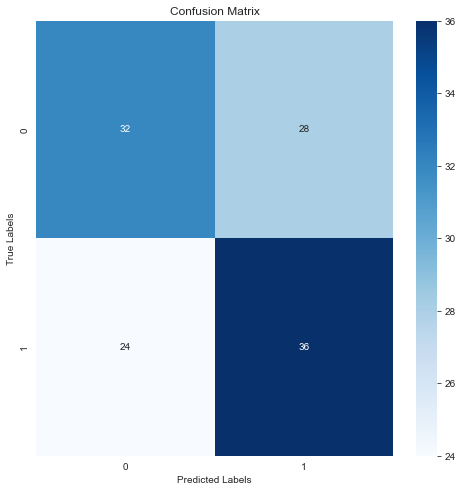

[I 2023-11-02 17:08:04,240] A new study created in memory with name: no-name-8dd046cc-8116-49ba-bf57-ac3cc6ff79ca



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.65972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:08:15,982] Trial 0 finished with value: 0.6597222222222222 and parameters: {'n_d': 36, 'n_a': 24, 'n_steps': 5, 'gamma': 1.6015449109059732, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.041988653065769876}. Best is trial 0 with value: 0.6597222222222222.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.68875


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:08:26,647] Trial 1 finished with value: 0.68875 and parameters: {'n_d': 56, 'n_a': 62, 'n_steps': 12, 'gamma': 0.4904254298157268, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.08008183920867112}. Best is trial 1 with value: 0.68875.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.72694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:09:34,419] Trial 2 finished with value: 0.7269444444444444 and parameters: {'n_d': 25, 'n_a': 14, 'n_steps': 19, 'gamma': 0.20588634684599993, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.002891794647374012}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.71833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:10:18,398] Trial 3 finished with value: 0.7183333333333333 and parameters: {'n_d': 39, 'n_a': 64, 'n_steps': 12, 'gamma': 1.2853797284559079, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.006177176183329743}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.70056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:10:35,915] Trial 4 finished with value: 0.7005555555555555 and parameters: {'n_d': 54, 'n_a': 25, 'n_steps': 6, 'gamma': 0.6006058863228728, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.05958914553038774}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.71056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:10:41,949] Trial 5 finished with value: 0.7105555555555555 and parameters: {'n_d': 8, 'n_a': 48, 'n_steps': 3, 'gamma': 0.38304940794653597, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.03078300455948902}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.7225


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:10:50,421] Trial 6 finished with value: 0.7225 and parameters: {'n_d': 44, 'n_a': 60, 'n_steps': 8, 'gamma': 1.121894759222953, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.004361388450485588}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.68083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:12:05,421] Trial 7 finished with value: 0.6808333333333333 and parameters: {'n_d': 27, 'n_a': 56, 'n_steps': 14, 'gamma': 1.3532100403048484, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.035208801066595644}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 42 with best_epoch = 32 and best_val_0_auc = 0.70472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:12:52,501] Trial 8 finished with value: 0.7047222222222222 and parameters: {'n_d': 31, 'n_a': 40, 'n_steps': 8, 'gamma': 1.2477274511556184, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.017699297361071935}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.69444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:13:22,997] Trial 9 finished with value: 0.6944444444444443 and parameters: {'n_d': 50, 'n_a': 19, 'n_steps': 17, 'gamma': 1.0761827546766076, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.07092492658329563}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.68139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:14:01,833] Trial 10 finished with value: 0.6813888888888888 and parameters: {'n_d': 19, 'n_a': 9, 'n_steps': 18, 'gamma': 0.14975896801391775, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.08971344966169413}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.68722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:14:23,289] Trial 11 finished with value: 0.6872222222222222 and parameters: {'n_d': 43, 'n_a': 36, 'n_steps': 9, 'gamma': 0.8082256375447977, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.0017392889143566632}. Best is trial 2 with value: 0.7269444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:14:27,136] Trial 12 finished with value: 0.6897222222222222 and parameters: {'n_d': 22, 'n_a': 10, 'n_steps': 1, 'gamma': 0.8647479218299251, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.018523123882889934}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.68972

Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.67944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:15:01,221] Trial 13 finished with value: 0.6794444444444444 and parameters: {'n_d': 62, 'n_a': 35, 'n_steps': 15, 'gamma': 0.16619130318036623, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.000436070903427429}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.68764


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:15:59,176] Trial 14 finished with value: 0.687638888888889 and parameters: {'n_d': 45, 'n_a': 47, 'n_steps': 19, 'gamma': 1.736780311928859, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.019526498759465324}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.70083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:16:14,602] Trial 15 finished with value: 0.7008333333333333 and parameters: {'n_d': 11, 'n_a': 18, 'n_steps': 11, 'gamma': 0.8027392819897136, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.05124518006521478}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.71417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:16:33,687] Trial 16 finished with value: 0.7141666666666666 and parameters: {'n_d': 31, 'n_a': 29, 'n_steps': 7, 'gamma': 1.9840278920293917, 'n_independent': 6, 'n_shared': 7, 'lambda_sparse': 0.013372916726508727}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53625


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:17:01,493] Trial 17 finished with value: 0.53625 and parameters: {'n_d': 19, 'n_a': 54, 'n_steps': 15, 'gamma': 1.0466746766843404, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.02756877790245243}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.69139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:17:08,976] Trial 18 finished with value: 0.6913888888888888 and parameters: {'n_d': 36, 'n_a': 42, 'n_steps': 4, 'gamma': 0.3405764136611057, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.011280753117968705}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.69861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:17:42,497] Trial 19 finished with value: 0.6986111111111112 and parameters: {'n_d': 25, 'n_a': 16, 'n_steps': 10, 'gamma': 0.6882021894046112, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.024587423632058205}. Best is trial 2 with value: 0.7269444444444444.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.66917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:18:10,563] Trial 20 finished with value: 0.6691666666666667 and parameters: {'n_d': 15, 'n_a': 30, 'n_steps': 13, 'gamma': 0.5768739303270671, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.0004897689563332134}. Best is trial 2 with value: 0.7269444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.77802 |  0:00:02s
epoch 1  | loss: 1.38324 |  0:00:04s
epoch 2  | loss: 1.20836 |  0:00:07s
epoch 3  | loss: 1.13322 |  0:00:09s
epoch 4  | loss: 1.21583 |  0:00:11s
epoch 5  | loss: 0.87362 |  0:00:14s
epoch 6  | loss: 1.25408 |  0:00:16s
epoch 7  | loss: 1.0269  |  0:00:18s
epoch 8  | loss: 0.96536 |  0:00:21s
epoch 9  | loss: 0.71605 |  0:00:23s
epoch 10 | loss: 0.70171 |  0:00:26s
epoch 11 | loss: 0.65509 |  0:00:28s
epoch 12 | loss: 0.66054 |  0:00:30s
epoch 13 | loss: 0.64408 |  0:00:33s
epoch 14 | loss: 0.64109 |  0:00:35s
epoch 15 | loss: 0.61362 |  0:00:37s
epoch 16 | loss: 0.6245  |  0:00:40s
epoch 17 | loss: 0.61055 |  0:00:42s
epoch 18 | loss: 0.59188 |  0:00:44s
epoch 19 | loss: 0.59559 |  0:00:47s
epoch 20 | loss: 0.56662 |  0:00:49s
epoch 21 | loss: 0.56538 |  0:00:51s
epoch 22 | loss: 0.55692 |  0:00:54s
epoch 23 | loss: 0.54466 |  0:00:56s
epoch 24 | loss: 0.55177 |  0:00:58s
epoch 25 | loss: 0.53911 |  0:01:01s
epoch 26 | loss: 0.54434 |  0:01:03s
e

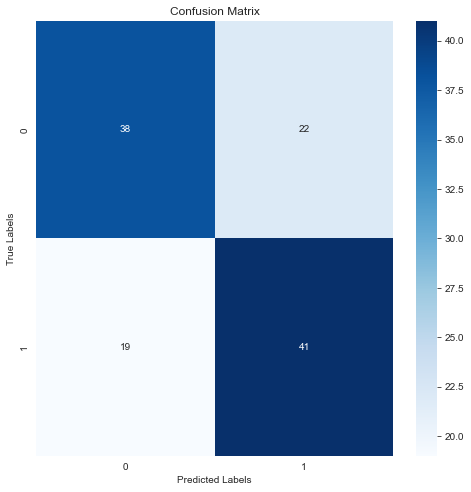

[I 2023-11-02 17:22:07,580] A new study created in memory with name: no-name-5db07954-06d1-4a64-9ca8-ba55e4454a2b



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.78833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:22:55,830] Trial 0 finished with value: 0.7883333333333333 and parameters: {'n_d': 63, 'n_a': 11, 'n_steps': 15, 'gamma': 1.8070231051646855, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.07295096023807451}. Best is trial 0 with value: 0.7883333333333333.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.75056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:23:02,638] Trial 1 finished with value: 0.7505555555555555 and parameters: {'n_d': 59, 'n_a': 37, 'n_steps': 5, 'gamma': 1.9317951243805618, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.024052195392917124}. Best is trial 0 with value: 0.7883333333333333.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.76917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:23:20,556] Trial 2 finished with value: 0.7691666666666667 and parameters: {'n_d': 25, 'n_a': 30, 'n_steps': 9, 'gamma': 1.1580158211340863, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.07426241161698494}. Best is trial 0 with value: 0.7883333333333333.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.71681


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:24:21,522] Trial 3 finished with value: 0.7168055555555556 and parameters: {'n_d': 13, 'n_a': 47, 'n_steps': 19, 'gamma': 1.7672468524728038, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.06588029507634151}. Best is trial 0 with value: 0.7883333333333333.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.805


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:24:39,051] Trial 4 finished with value: 0.8049999999999999 and parameters: {'n_d': 10, 'n_a': 44, 'n_steps': 8, 'gamma': 0.39460154867636454, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.02868386961166435}. Best is trial 4 with value: 0.8049999999999999.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47764


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:25:36,858] Trial 5 finished with value: 0.4776388888888889 and parameters: {'n_d': 32, 'n_a': 63, 'n_steps': 19, 'gamma': 1.0574363730988514, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.09613542856973188}. Best is trial 4 with value: 0.8049999999999999.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.78639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:25:45,907] Trial 6 finished with value: 0.7863888888888888 and parameters: {'n_d': 55, 'n_a': 61, 'n_steps': 2, 'gamma': 1.0211484958752348, 'n_independent': 6, 'n_shared': 7, 'lambda_sparse': 0.04494764584415797}. Best is trial 4 with value: 0.8049999999999999.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.8275


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:26:13,574] Trial 7 finished with value: 0.8275 and parameters: {'n_d': 38, 'n_a': 23, 'n_steps': 12, 'gamma': 0.4350155814949984, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.07008526244256684}. Best is trial 7 with value: 0.8275.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.74833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:26:22,165] Trial 8 finished with value: 0.7483333333333333 and parameters: {'n_d': 35, 'n_a': 34, 'n_steps': 9, 'gamma': 1.0469597948207334, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.07858319013617618}. Best is trial 7 with value: 0.8275.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.81278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:26:44,366] Trial 9 finished with value: 0.8127777777777778 and parameters: {'n_d': 51, 'n_a': 49, 'n_steps': 19, 'gamma': 0.33190174362535874, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.08095261267279666}. Best is trial 7 with value: 0.8275.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.8325


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:27:31,952] Trial 10 finished with value: 0.8325 and parameters: {'n_d': 44, 'n_a': 20, 'n_steps': 13, 'gamma': 0.10966939476802195, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.04839564296765415}. Best is trial 10 with value: 0.8325.



Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_auc = 0.78333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:28:58,098] Trial 11 finished with value: 0.7833333333333334 and parameters: {'n_d': 45, 'n_a': 17, 'n_steps': 13, 'gamma': 0.14897756664887185, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.04302819929930065}. Best is trial 10 with value: 0.8325.



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.8


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:30:55,593] Trial 12 finished with value: 0.7999999999999999 and parameters: {'n_d': 43, 'n_a': 22, 'n_steps': 13, 'gamma': 0.13677856453560966, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.05616393869057812}. Best is trial 10 with value: 0.8325.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.80389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:31:34,413] Trial 13 finished with value: 0.803888888888889 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 14, 'gamma': 0.5243593100345583, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.0044842843132479535}. Best is trial 10 with value: 0.8325.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.80944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:32:11,023] Trial 14 finished with value: 0.8094444444444445 and parameters: {'n_d': 43, 'n_a': 15, 'n_steps': 11, 'gamma': 0.5989203577577507, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.056013598419736535}. Best is trial 10 with value: 0.8325.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.84774 |  0:00:01s
epoch 1  | loss: 1.27871 |  0:00:03s
epoch 2  | loss: 1.6479  |  0:00:04s
epoch 3  | loss: 1.79105 |  0:00:06s
epoch 4  | loss: 1.5361  |  0:00:08s
epoch 5  | loss: 1.17171 |  0:00:09s
epoch 6  | loss: 1.19494 |  0:00:11s
epoch 7  | loss: 0.97627 |  0:00:13s
epoch 8  | loss: 0.79976 |  0:00:15s
epoch 9  | loss: 0.88039 |  0:00:17s
epoch 10 | loss: 0.79093 |  0:00:19s
epoch 11 | loss: 0.72426 |  0:00:20s
epoch 12 | loss: 0.7252  |  0:00:22s
epoch 13 | loss: 0.70845 |  0:00:24s
epoch 14 | loss: 0.70542 |  0:00:26s
epoch 15 | loss: 0.69527 |  0:00:28s
epoch 16 | loss: 0.70178 |  0:00:30s
epoch 17 | loss: 0.7086  |  0:00:31s
epoch 18 | loss: 0.69469 |  0:00:33s
epoch 19 | loss: 0.6822  |  0:00:35s
epoch 20 | loss: 0.67429 |  0:00:37s
epoch 21 | loss: 0.66776 |  0:00:39s
epoch 22 | loss: 0.66365 |  0:00:40s
epoch 23 | loss: 0.66107 |  0:00:42s
epoch 24 | loss: 0.65332 |  0:00:44s
epoch 25 | loss: 0.65364 |  0:00:46s
epoch 26 | loss: 0.64727 |  0:00:48s
e

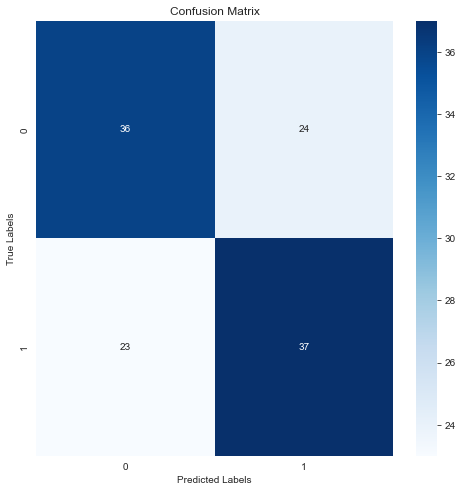

[I 2023-11-02 17:35:13,830] A new study created in memory with name: no-name-63a2de0a-281f-41ca-99fc-8259e54d8b62



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.68556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:35:20,391] Trial 0 finished with value: 0.6855555555555556 and parameters: {'n_d': 40, 'n_a': 55, 'n_steps': 4, 'gamma': 1.326970529033433, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.05140395568041079}. Best is trial 0 with value: 0.6855555555555556.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.71222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:35:43,962] Trial 1 finished with value: 0.7122222222222222 and parameters: {'n_d': 44, 'n_a': 58, 'n_steps': 12, 'gamma': 1.220346753887144, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.016587424236343178}. Best is trial 1 with value: 0.7122222222222222.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.69639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:36:07,701] Trial 2 finished with value: 0.696388888888889 and parameters: {'n_d': 23, 'n_a': 36, 'n_steps': 12, 'gamma': 1.0614427288275172, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.024310933377603337}. Best is trial 1 with value: 0.7122222222222222.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.75444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:36:38,684] Trial 3 finished with value: 0.7544444444444444 and parameters: {'n_d': 21, 'n_a': 54, 'n_steps': 19, 'gamma': 1.5393563790626004, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.08536363608530824}. Best is trial 3 with value: 0.7544444444444444.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.71111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:36:50,560] Trial 4 finished with value: 0.711111111111111 and parameters: {'n_d': 32, 'n_a': 26, 'n_steps': 5, 'gamma': 0.43473050147586934, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.08777917897328105}. Best is trial 3 with value: 0.7544444444444444.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.66444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:37:05,388] Trial 5 finished with value: 0.6644444444444445 and parameters: {'n_d': 34, 'n_a': 11, 'n_steps': 14, 'gamma': 0.990465710735968, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.023117641787616595}. Best is trial 3 with value: 0.7544444444444444.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.73806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:38:10,172] Trial 6 finished with value: 0.7380555555555556 and parameters: {'n_d': 37, 'n_a': 51, 'n_steps': 9, 'gamma': 0.7191354849247591, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.02738812213514443}. Best is trial 3 with value: 0.7544444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:38:12,909] Trial 7 finished with value: 0.7619444444444444 and parameters: {'n_d': 17, 'n_a': 11, 'n_steps': 1, 'gamma': 1.0995373757441742, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.07372722194954746}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.76194

Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.71056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:38:40,029] Trial 8 finished with value: 0.7105555555555556 and parameters: {'n_d': 42, 'n_a': 45, 'n_steps': 11, 'gamma': 0.4094301992945244, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.05304352262835501}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.70542


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:38:54,102] Trial 9 finished with value: 0.7054166666666666 and parameters: {'n_d': 36, 'n_a': 18, 'n_steps': 13, 'gamma': 0.4510345439517559, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.09649247342050195}. Best is trial 7 with value: 0.7619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:38:55,963] Trial 10 finished with value: 0.7224999999999999 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 1, 'gamma': 1.9478881343789927, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.07039175762859676}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.7225

Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.70111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:39:36,812] Trial 11 finished with value: 0.7011111111111111 and parameters: {'n_d': 62, 'n_a': 64, 'n_steps': 19, 'gamma': 1.5533016498471195, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.07964820877688186}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.73417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:39:57,827] Trial 12 finished with value: 0.7341666666666666 and parameters: {'n_d': 13, 'n_a': 35, 'n_steps': 19, 'gamma': 1.5813752492763915, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.07164553407167126}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.68861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:40:16,765] Trial 13 finished with value: 0.6886111111111111 and parameters: {'n_d': 23, 'n_a': 26, 'n_steps': 16, 'gamma': 0.8320293346563828, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.09901858811079169}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.70972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:40:34,952] Trial 14 finished with value: 0.7097222222222221 and parameters: {'n_d': 19, 'n_a': 44, 'n_steps': 8, 'gamma': 0.12599031072899913, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.0653983842474575}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.70889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:40:46,643] Trial 15 finished with value: 0.7088888888888888 and parameters: {'n_d': 17, 'n_a': 28, 'n_steps': 6, 'gamma': 1.4452067648138214, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.08395795063663632}. Best is trial 7 with value: 0.7619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:40:52,276] Trial 16 finished with value: 0.6625 and parameters: {'n_d': 27, 'n_a': 43, 'n_steps': 2, 'gamma': 1.7681938871747134, 'n_independent': 6, 'n_shared': 5, 'lambda_sparse': 0.061662919321681386}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.6625

Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.67972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:41:09,200] Trial 17 finished with value: 0.6797222222222222 and parameters: {'n_d': 51, 'n_a': 16, 'n_steps': 15, 'gamma': 1.1842791961754577, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.03901990584966545}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.70444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:41:49,126] Trial 18 finished with value: 0.7044444444444444 and parameters: {'n_d': 9, 'n_a': 36, 'n_steps': 17, 'gamma': 1.7261745783580382, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.077428871754514}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.74556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:42:02,523] Trial 19 finished with value: 0.7455555555555555 and parameters: {'n_d': 25, 'n_a': 63, 'n_steps': 7, 'gamma': 1.363783448319356, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.0031304567794955204}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.70639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:42:08,291] Trial 20 finished with value: 0.706388888888889 and parameters: {'n_d': 16, 'n_a': 50, 'n_steps': 4, 'gamma': 1.1788610227858263, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.05850646886982965}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.71


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:42:26,225] Trial 21 finished with value: 0.71 and parameters: {'n_d': 28, 'n_a': 64, 'n_steps': 7, 'gamma': 1.348458416598111, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.00020256764669830674}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.67889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:42:45,310] Trial 22 finished with value: 0.6788888888888889 and parameters: {'n_d': 25, 'n_a': 58, 'n_steps': 10, 'gamma': 1.469364196465408, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.043890726064444524}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.72833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:42:51,208] Trial 23 finished with value: 0.7283333333333334 and parameters: {'n_d': 21, 'n_a': 59, 'n_steps': 3, 'gamma': 1.3989564862347632, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.09118379247175729}. Best is trial 7 with value: 0.7619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:42:53,191] Trial 24 finished with value: 0.7055555555555555 and parameters: {'n_d': 14, 'n_a': 51, 'n_steps': 1, 'gamma': 1.6760221061069467, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.07363120062444196}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.70556

Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.68861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:43:05,772] Trial 25 finished with value: 0.6886111111111112 and parameters: {'n_d': 29, 'n_a': 18, 'n_steps': 7, 'gamma': 0.9860803418805926, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.08428531455538565}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.69056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:43:31,486] Trial 26 finished with value: 0.6905555555555555 and parameters: {'n_d': 13, 'n_a': 61, 'n_steps': 9, 'gamma': 1.259899034197026, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.064252355491522}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.67111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:43:45,764] Trial 27 finished with value: 0.6711111111111111 and parameters: {'n_d': 31, 'n_a': 40, 'n_steps': 5, 'gamma': 1.5930912205007854, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.09189151199765788}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.70833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:44:16,804] Trial 28 finished with value: 0.7083333333333333 and parameters: {'n_d': 19, 'n_a': 54, 'n_steps': 17, 'gamma': 1.4532281448636533, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.07903362578096115}. Best is trial 7 with value: 0.7619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:44:23,452] Trial 29 finished with value: 0.7013888888888888 and parameters: {'n_d': 25, 'n_a': 31, 'n_steps': 3, 'gamma': 1.3536988892604644, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.05469236989047682}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.70139

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.69944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:44:33,021] Trial 30 finished with value: 0.6994444444444444 and parameters: {'n_d': 48, 'n_a': 54, 'n_steps': 4, 'gamma': 1.2734806480487129, 'n_independent': 6, 'n_shared': 5, 'lambda_sparse': 0.04543934926291783}. Best is trial 7 with value: 0.7619444444444444.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.69778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:45:31,811] Trial 31 finished with value: 0.6977777777777778 and parameters: {'n_d': 39, 'n_a': 49, 'n_steps': 9, 'gamma': 0.8800106886182912, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.0011752622701354035}. Best is trial 7 with value: 0.7619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76492 |  0:00:00s
epoch 1  | loss: 0.70187 |  0:00:00s
epoch 2  | loss: 0.68515 |  0:00:00s
epoch 3  | loss: 0.67348 |  0:00:00s
epoch 4  | loss: 0.6611  |  0:00:00s
epoch 5  | loss: 0.64756 |  0:00:00s
epoch 6  | loss: 0.64368 |  0:00:00s
epoch 7  | loss: 0.63298 |  0:00:00s
epoch 8  | loss: 0.63358 |  0:00:00s
epoch 9  | loss: 0.62634 |  0:00:00s
epoch 10 | loss: 0.62416 |  0:00:00s
epoch 11 | loss: 0.61244 |  0:00:00s
epoch 12 | loss: 0.61103 |  0:00:01s
epoch 13 | loss: 0.59526 |  0:00:01s
epoch 14 | loss: 0.60682 |  0:00:01s
epoch 15 | loss: 0.58827 |  0:00:01s
epoch 16 | loss: 0.58889 |  0:00:01s
epoch 17 | loss: 0.58497 |  0:00:01s
epoch 18 | loss: 0.58602 |  0:00:01s
epoch 19 | loss: 0.57189 |  0:00:01s
epoch 20 | loss: 0.57366 |  0:00:01s
epoch 21 | loss: 0.57281 |  0:00:01s
epoch 22 | loss: 0.58228 |  0:00:01s
epoch 23 | loss: 0.56757 |  0:00:01s
epoch 24 | loss: 0.56797 |  0:00:01s
epoch 25 | loss: 0.56608 |  0:00:01s
epoch 26 | loss: 0.57035 |  0:00:01s
e

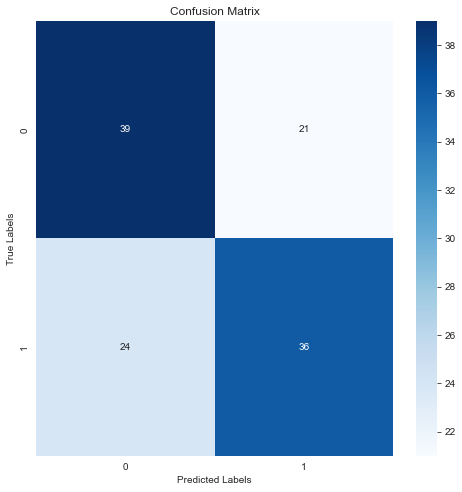

[I 2023-11-02 17:45:38,498] A new study created in memory with name: no-name-6e003d19-29c2-42f2-b01a-592bb50229b4



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.8239


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:45:53,410] Trial 0 finished with value: 0.8239011778224647 and parameters: {'n_d': 10, 'n_a': 12, 'n_steps': 16, 'gamma': 1.1931353017464597, 'n_independent': 2, 'n_shared': 2, 'lambda_sparse': 0.0993919029503537}. Best is trial 0 with value: 0.8239011778224647.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:46:00,706] Trial 1 finished with value: 0.8213157138753233 and parameters: {'n_d': 31, 'n_a': 17, 'n_steps': 5, 'gamma': 0.9734410333333332, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.025659596220865985}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.82132

Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_auc = 0.78483


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:47:58,255] Trial 2 finished with value: 0.7848319448434358 and parameters: {'n_d': 22, 'n_a': 39, 'n_steps': 18, 'gamma': 1.0502911179042012, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.032936881873155466}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.75352


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:49:39,861] Trial 3 finished with value: 0.7535191037058316 and parameters: {'n_d': 60, 'n_a': 35, 'n_steps': 19, 'gamma': 1.5876199699913374, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.0963076721537148}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.76156


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:50:36,079] Trial 4 finished with value: 0.7615627693191611 and parameters: {'n_d': 33, 'n_a': 63, 'n_steps': 12, 'gamma': 1.3751938967582875, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.06781112663390852}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.79805


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:50:45,540] Trial 5 finished with value: 0.7980465383510487 and parameters: {'n_d': 17, 'n_a': 24, 'n_steps': 17, 'gamma': 0.6234540630800516, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.0003474245539309902}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.7472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:51:49,003] Trial 6 finished with value: 0.7471990807239299 and parameters: {'n_d': 61, 'n_a': 53, 'n_steps': 13, 'gamma': 0.9796538438873232, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.0740149868175701}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.79747


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:52:24,663] Trial 7 finished with value: 0.7974719908072393 and parameters: {'n_d': 61, 'n_a': 58, 'n_steps': 5, 'gamma': 1.5407845997032392, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.08617095196862051}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.81413


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:53:27,055] Trial 8 finished with value: 0.8141338695777075 and parameters: {'n_d': 33, 'n_a': 63, 'n_steps': 12, 'gamma': 0.3418338959542686, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.01607645593269461}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.73916


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:54:25,812] Trial 9 finished with value: 0.7391554151106003 and parameters: {'n_d': 15, 'n_a': 26, 'n_steps': 19, 'gamma': 1.7956525140858692, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.045405555396067686}. Best is trial 0 with value: 0.8239011778224647.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:54:26,524] Trial 10 finished with value: 0.8194484343579431 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 1, 'gamma': 1.9422814920040696, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.09767584584378806}. Best is trial 0 with value: 0.8239011778224647.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.81945

Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.82419


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:54:36,919] Trial 11 finished with value: 0.8241884515943695 and parameters: {'n_d': 45, 'n_a': 9, 'n_steps': 7, 'gamma': 1.055630300128422, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.05835988164536511}. Best is trial 11 with value: 0.8241884515943695.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.80006


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:54:44,103] Trial 12 finished with value: 0.8000574547543808 and parameters: {'n_d': 47, 'n_a': 8, 'n_steps': 7, 'gamma': 1.222211300790164, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.06002104895984407}. Best is trial 11 with value: 0.8241884515943695.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.86929


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:54:53,932] Trial 13 finished with value: 0.8692904337833954 and parameters: {'n_d': 46, 'n_a': 17, 'n_steps': 9, 'gamma': 0.7836194431657715, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.07845232144547518}. Best is trial 13 with value: 0.8692904337833954.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.76242


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:54:59,438] Trial 14 finished with value: 0.7624245906348751 and parameters: {'n_d': 47, 'n_a': 19, 'n_steps': 8, 'gamma': 0.7164082373602815, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.050071636079120505}. Best is trial 13 with value: 0.8692904337833954.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.81729


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:55:15,440] Trial 15 finished with value: 0.8172938810686584 and parameters: {'n_d': 45, 'n_a': 33, 'n_steps': 9, 'gamma': 0.26123667723906296, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.07491683115242223}. Best is trial 13 with value: 0.8692904337833954.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.82132


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:55:21,141] Trial 16 finished with value: 0.8213157138753231 and parameters: {'n_d': 41, 'n_a': 18, 'n_steps': 3, 'gamma': 0.6964199037102321, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.05956414833306153}. Best is trial 13 with value: 0.8692904337833954.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.81988


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:55:54,482] Trial 17 finished with value: 0.8198793450158001 and parameters: {'n_d': 53, 'n_a': 45, 'n_steps': 10, 'gamma': 0.8381843674925766, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.08204679871803079}. Best is trial 13 with value: 0.8692904337833954.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.02599 |  0:00:00s
epoch 1  | loss: 1.49316 |  0:00:00s
epoch 2  | loss: 1.2327  |  0:00:01s
epoch 3  | loss: 1.04393 |  0:00:01s
epoch 4  | loss: 0.97337 |  0:00:02s
epoch 5  | loss: 0.93645 |  0:00:02s
epoch 6  | loss: 0.9287  |  0:00:02s
epoch 7  | loss: 0.92506 |  0:00:03s
epoch 8  | loss: 0.93387 |  0:00:03s
epoch 9  | loss: 0.89704 |  0:00:04s
epoch 10 | loss: 0.84184 |  0:00:04s
epoch 11 | loss: 0.77781 |  0:00:04s
epoch 12 | loss: 0.78728 |  0:00:05s
epoch 13 | loss: 0.78888 |  0:00:05s
epoch 14 | loss: 0.74322 |  0:00:06s
epoch 15 | loss: 0.74144 |  0:00:06s
epoch 16 | loss: 0.74174 |  0:00:07s
epoch 17 | loss: 0.72328 |  0:00:07s
epoch 18 | loss: 0.72561 |  0:00:07s
epoch 19 | loss: 0.72635 |  0:00:08s
epoch 20 | loss: 0.71219 |  0:00:08s
epoch 21 | loss: 0.70811 |  0:00:09s
epoch 22 | loss: 0.70439 |  0:00:09s
epoch 23 | loss: 0.70463 |  0:00:09s
epoch 24 | loss: 0.68522 |  0:00:10s
epoch 25 | loss: 0.68678 |  0:00:10s
epoch 26 | loss: 0.69326 |  0:00:11s
e

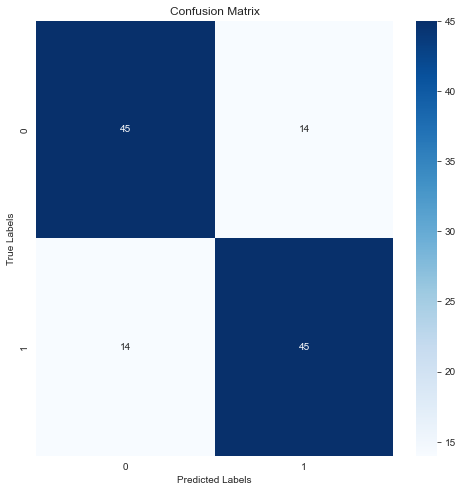

[I 2023-11-02 17:56:35,537] A new study created in memory with name: no-name-7a08a3a9-6309-476b-9f7f-86d18569c57c



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.67972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 17:58:38,192] Trial 0 finished with value: 0.6797222222222222 and parameters: {'n_d': 58, 'n_a': 34, 'n_steps': 14, 'gamma': 1.044150343938151, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.0010945068145414517}. Best is trial 0 with value: 0.6797222222222222.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.67972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:00:28,355] Trial 1 finished with value: 0.6797222222222222 and parameters: {'n_d': 12, 'n_a': 61, 'n_steps': 18, 'gamma': 0.9693170169704064, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.0689638942403096}. Best is trial 0 with value: 0.6797222222222222.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.74722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:00:41,623] Trial 2 finished with value: 0.7472222222222222 and parameters: {'n_d': 41, 'n_a': 17, 'n_steps': 4, 'gamma': 0.1450993947542321, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.04177094528397816}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.69917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:00:47,807] Trial 3 finished with value: 0.6991666666666666 and parameters: {'n_d': 24, 'n_a': 26, 'n_steps': 3, 'gamma': 0.9297624334158482, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.09096234080492804}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.67278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:00:58,589] Trial 4 finished with value: 0.6727777777777778 and parameters: {'n_d': 27, 'n_a': 59, 'n_steps': 6, 'gamma': 0.5909311310273517, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.05013920686758419}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.68917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:01:07,042] Trial 5 finished with value: 0.6891666666666667 and parameters: {'n_d': 50, 'n_a': 61, 'n_steps': 2, 'gamma': 1.9316531960375067, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.060020025390342444}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.68597


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:01:44,446] Trial 6 finished with value: 0.6859722222222222 and parameters: {'n_d': 50, 'n_a': 51, 'n_steps': 15, 'gamma': 0.4891885883723308, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.09292650846504671}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.68958


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:02:16,935] Trial 7 finished with value: 0.6895833333333333 and parameters: {'n_d': 36, 'n_a': 26, 'n_steps': 12, 'gamma': 0.8129133208077975, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.07905401639366043}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.61972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:02:33,353] Trial 8 finished with value: 0.6197222222222223 and parameters: {'n_d': 32, 'n_a': 19, 'n_steps': 16, 'gamma': 1.8820600518250867, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.03436652970378182}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.69833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:02:56,033] Trial 9 finished with value: 0.6983333333333335 and parameters: {'n_d': 27, 'n_a': 44, 'n_steps': 18, 'gamma': 1.283345313665677, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.04608340047073263}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.62528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:03:10,766] Trial 10 finished with value: 0.6252777777777777 and parameters: {'n_d': 46, 'n_a': 8, 'n_steps': 7, 'gamma': 0.10964544132788345, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.026879021450073332}. Best is trial 2 with value: 0.7472222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:03:14,845] Trial 11 finished with value: 0.6788888888888889 and parameters: {'n_d': 16, 'n_a': 18, 'n_steps': 2, 'gamma': 0.10730542951428836, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.09836123480781635}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.67889

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.65778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:03:22,593] Trial 12 finished with value: 0.6577777777777779 and parameters: {'n_d': 22, 'n_a': 32, 'n_steps': 6, 'gamma': 1.4418233007141326, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.07921312559227196}. Best is trial 2 with value: 0.7472222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:03:30,028] Trial 13 finished with value: 0.6825 and parameters: {'n_d': 43, 'n_a': 9, 'n_steps': 1, 'gamma': 0.4347439373979868, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.08287591152762605}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.6825

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.69389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:04:00,492] Trial 14 finished with value: 0.6938888888888889 and parameters: {'n_d': 38, 'n_a': 21, 'n_steps': 9, 'gamma': 0.7061266173626396, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.06217855892679039}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.67778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:04:09,312] Trial 15 finished with value: 0.6777777777777778 and parameters: {'n_d': 59, 'n_a': 41, 'n_steps': 4, 'gamma': 0.32506245414315416, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.09987394671166314}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.69667


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:04:32,609] Trial 16 finished with value: 0.6966666666666667 and parameters: {'n_d': 25, 'n_a': 27, 'n_steps': 9, 'gamma': 0.7193054728922408, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.06700832824436406}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.66306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:04:44,470] Trial 17 finished with value: 0.6630555555555555 and parameters: {'n_d': 9, 'n_a': 14, 'n_steps': 4, 'gamma': 0.3301558419059696, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.04621841049363887}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.68333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:04:57,799] Trial 18 finished with value: 0.6833333333333333 and parameters: {'n_d': 17, 'n_a': 26, 'n_steps': 4, 'gamma': 0.8846325640774134, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.08394910657089355}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.65861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:05:39,540] Trial 19 finished with value: 0.658611111111111 and parameters: {'n_d': 32, 'n_a': 39, 'n_steps': 11, 'gamma': 1.1849842599873233, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.030543811841459476}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.71944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:05:50,687] Trial 20 finished with value: 0.7194444444444444 and parameters: {'n_d': 41, 'n_a': 14, 'n_steps': 7, 'gamma': 0.6120339453188564, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.0898563047577498}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.63389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:06:02,137] Trial 21 finished with value: 0.6338888888888888 and parameters: {'n_d': 41, 'n_a': 13, 'n_steps': 8, 'gamma': 0.6459579780819505, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.08809504184567882}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.66333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:06:12,340] Trial 22 finished with value: 0.6633333333333333 and parameters: {'n_d': 52, 'n_a': 22, 'n_steps': 5, 'gamma': 0.8524646032296093, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.09082422482817039}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.71028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:06:17,206] Trial 23 finished with value: 0.7102777777777778 and parameters: {'n_d': 33, 'n_a': 15, 'n_steps': 3, 'gamma': 0.28559720954331635, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.07490681920509384}. Best is trial 2 with value: 0.7472222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:06:22,144] Trial 24 finished with value: 0.7020833333333333 and parameters: {'n_d': 34, 'n_a': 14, 'n_steps': 1, 'gamma': 0.26053644358083233, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.07514296268333366}. Best is trial 2 with value: 0.7472222222222222.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.70208

Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.67306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:06:37,995] Trial 25 finished with value: 0.6730555555555554 and parameters: {'n_d': 44, 'n_a': 13, 'n_steps': 7, 'gamma': 0.5137493149783574, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.07170941201205167}. Best is trial 2 with value: 0.7472222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.03135 |  0:00:00s
epoch 1  | loss: 0.91838 |  0:00:01s
epoch 2  | loss: 0.88546 |  0:00:02s
epoch 3  | loss: 0.86804 |  0:00:02s
epoch 4  | loss: 0.8008  |  0:00:03s
epoch 5  | loss: 0.75415 |  0:00:04s
epoch 6  | loss: 0.764   |  0:00:04s
epoch 7  | loss: 0.75926 |  0:00:05s
epoch 8  | loss: 0.74317 |  0:00:06s
epoch 9  | loss: 0.75088 |  0:00:06s
epoch 10 | loss: 0.73387 |  0:00:07s
epoch 11 | loss: 0.71796 |  0:00:08s
epoch 12 | loss: 0.70439 |  0:00:08s
epoch 13 | loss: 0.70258 |  0:00:09s
epoch 14 | loss: 0.67583 |  0:00:10s
epoch 15 | loss: 0.69461 |  0:00:10s
epoch 16 | loss: 0.68136 |  0:00:11s
epoch 17 | loss: 0.65599 |  0:00:12s
epoch 18 | loss: 0.65715 |  0:00:12s
epoch 19 | loss: 0.66304 |  0:00:13s
epoch 20 | loss: 0.65882 |  0:00:14s
epoch 21 | loss: 0.64906 |  0:00:14s
epoch 22 | loss: 0.6465  |  0:00:15s
epoch 23 | loss: 0.64725 |  0:00:16s
epoch 24 | loss: 0.63734 |  0:00:17s
epoch 25 | loss: 0.63765 |  0:00:17s
epoch 26 | loss: 0.63679 |  0:00:18s
e

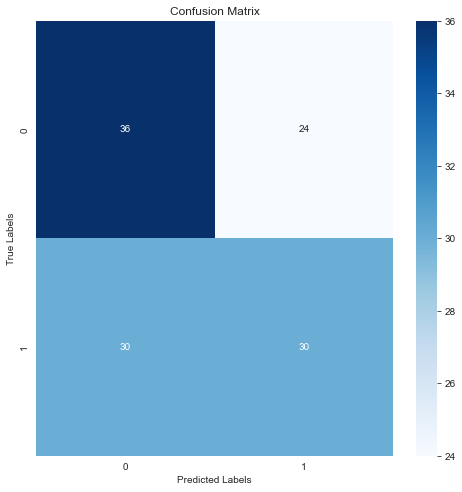

[I 2023-11-02 18:07:46,243] A new study created in memory with name: no-name-7ea4964b-369b-447d-9e5f-cb31e1a8602f



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.80444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:08:15,226] Trial 0 finished with value: 0.8044444444444444 and parameters: {'n_d': 18, 'n_a': 59, 'n_steps': 10, 'gamma': 1.4731116297531948, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.04692909852402033}. Best is trial 0 with value: 0.8044444444444444.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.88778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:08:47,873] Trial 1 finished with value: 0.8877777777777777 and parameters: {'n_d': 45, 'n_a': 40, 'n_steps': 7, 'gamma': 1.2078286718840212, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.03227957087938371}. Best is trial 1 with value: 0.8877777777777777.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.79042


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:09:09,021] Trial 2 finished with value: 0.7904166666666665 and parameters: {'n_d': 24, 'n_a': 61, 'n_steps': 12, 'gamma': 1.8590263193780672, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.034454653067518444}. Best is trial 1 with value: 0.8877777777777777.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.78944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:09:49,497] Trial 3 finished with value: 0.7894444444444444 and parameters: {'n_d': 19, 'n_a': 25, 'n_steps': 19, 'gamma': 1.9946082592437289, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.055087427740039274}. Best is trial 1 with value: 0.8877777777777777.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.89389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:10:08,648] Trial 4 finished with value: 0.8938888888888888 and parameters: {'n_d': 51, 'n_a': 39, 'n_steps': 5, 'gamma': 0.11332058674103457, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.080582377293631}. Best is trial 4 with value: 0.8938888888888888.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.79472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:10:37,230] Trial 5 finished with value: 0.7947222222222222 and parameters: {'n_d': 17, 'n_a': 27, 'n_steps': 17, 'gamma': 1.4582147877380274, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.055227934484990644}. Best is trial 4 with value: 0.8938888888888888.



Early stopping occurred at epoch 56 with best_epoch = 46 and best_val_0_auc = 0.87306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:11:35,823] Trial 6 finished with value: 0.8730555555555556 and parameters: {'n_d': 49, 'n_a': 58, 'n_steps': 9, 'gamma': 1.593349479583764, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.07191562298347588}. Best is trial 4 with value: 0.8938888888888888.



Early stopping occurred at epoch 48 with best_epoch = 38 and best_val_0_auc = 0.84389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:13:40,882] Trial 7 finished with value: 0.8438888888888889 and parameters: {'n_d': 24, 'n_a': 53, 'n_steps': 17, 'gamma': 1.744230144912649, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.031076439854505814}. Best is trial 4 with value: 0.8938888888888888.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.82639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:14:09,597] Trial 8 finished with value: 0.8263888888888888 and parameters: {'n_d': 58, 'n_a': 32, 'n_steps': 10, 'gamma': 1.1887314838793626, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.057466836002114594}. Best is trial 4 with value: 0.8938888888888888.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:14:22,108] Trial 9 finished with value: 0.8794444444444444 and parameters: {'n_d': 26, 'n_a': 40, 'n_steps': 1, 'gamma': 1.8822032038079841, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.03547970339273384}. Best is trial 4 with value: 0.8938888888888888.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.87944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:14:27,588] Trial 10 finished with value: 0.8572222222222222 and parameters: {'n_d': 39, 'n_a': 16, 'n_steps': 2, 'gamma': 0.12988284156460483, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.08009374044341298}. Best is trial 4 with value: 0.8938888888888888.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.85722

Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.90722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:14:59,571] Trial 11 finished with value: 0.9072222222222222 and parameters: {'n_d': 45, 'n_a': 44, 'n_steps': 5, 'gamma': 0.6209458316132812, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.0103022909289196}. Best is trial 11 with value: 0.9072222222222222.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.895


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:15:31,415] Trial 12 finished with value: 0.895 and parameters: {'n_d': 62, 'n_a': 45, 'n_steps': 5, 'gamma': 0.33153919211984473, 'n_independent': 6, 'n_shared': 7, 'lambda_sparse': 0.006681132009092629}. Best is trial 11 with value: 0.9072222222222222.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.89472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:16:14,747] Trial 13 finished with value: 0.8947222222222223 and parameters: {'n_d': 60, 'n_a': 49, 'n_steps': 5, 'gamma': 0.5396582715579675, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.001446163958114038}. Best is trial 11 with value: 0.9072222222222222.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.88167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:16:38,790] Trial 14 finished with value: 0.8816666666666666 and parameters: {'n_d': 64, 'n_a': 47, 'n_steps': 5, 'gamma': 0.6789325572828783, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.0011772638996399212}. Best is trial 11 with value: 0.9072222222222222.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.67556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:16:56,802] Trial 15 finished with value: 0.6755555555555556 and parameters: {'n_d': 8, 'n_a': 12, 'n_steps': 13, 'gamma': 0.6852626793636136, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.01670316836529888}. Best is trial 11 with value: 0.9072222222222222.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.88


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:17:07,795] Trial 16 finished with value: 0.88 and parameters: {'n_d': 35, 'n_a': 46, 'n_steps': 3, 'gamma': 0.4331713640416255, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.014981239119919203}. Best is trial 11 with value: 0.9072222222222222.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.89306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:17:46,803] Trial 17 finished with value: 0.8930555555555555 and parameters: {'n_d': 54, 'n_a': 33, 'n_steps': 7, 'gamma': 0.9578345166947553, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.01338163187490175}. Best is trial 11 with value: 0.9072222222222222.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.4716  |  0:00:00s
epoch 1  | loss: 1.0274  |  0:00:01s
epoch 2  | loss: 0.8042  |  0:00:02s
epoch 3  | loss: 0.78542 |  0:00:03s
epoch 4  | loss: 0.7401  |  0:00:03s
epoch 5  | loss: 0.70648 |  0:00:04s
epoch 6  | loss: 0.69075 |  0:00:05s
epoch 7  | loss: 0.68548 |  0:00:06s
epoch 8  | loss: 0.65642 |  0:00:07s
epoch 9  | loss: 0.65525 |  0:00:07s
epoch 10 | loss: 0.63184 |  0:00:08s
epoch 11 | loss: 0.62601 |  0:00:09s
epoch 12 | loss: 0.62372 |  0:00:10s
epoch 13 | loss: 0.61099 |  0:00:10s
epoch 14 | loss: 0.61138 |  0:00:11s
epoch 15 | loss: 0.61546 |  0:00:12s
epoch 16 | loss: 0.5985  |  0:00:13s
epoch 17 | loss: 0.60598 |  0:00:14s
epoch 18 | loss: 0.61097 |  0:00:14s
epoch 19 | loss: 0.60092 |  0:00:15s
epoch 20 | loss: 0.59763 |  0:00:16s
epoch 21 | loss: 0.59691 |  0:00:17s
epoch 22 | loss: 0.60088 |  0:00:17s
epoch 23 | loss: 0.59452 |  0:00:18s
epoch 24 | loss: 0.59497 |  0:00:19s
epoch 25 | loss: 0.5948  |  0:00:20s
epoch 26 | loss: 0.59508 |  0:00:21s
e

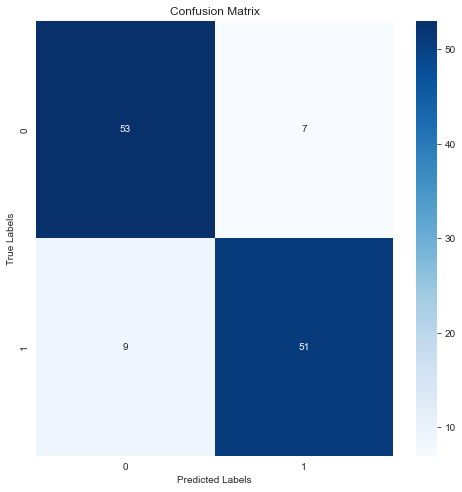

[I 2023-11-02 18:19:05,322] A new study created in memory with name: no-name-71c7f650-8ceb-4c0b-9904-7d5f867e6c1b
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:19:08,876] Trial 0 finished with value: 0.8508333333333333 and parameters: {'n_d': 43, 'n_a': 9, 'n_steps': 1, 'gamma': 0.20419317819151328, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.07893728553292256}. Best is trial 0 with value: 0.8508333333333333.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.85083

Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.86583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:19:29,402] Trial 1 finished with value: 0.8658333333333333 and parameters: {'n_d': 49, 'n_a': 47, 'n_steps': 5, 'gamma': 0.7016490185583372, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.00024780377406875386}. Best is trial 1 with value: 0.8658333333333333.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.86917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:19:46,599] Trial 2 finished with value: 0.8691666666666666 and parameters: {'n_d': 23, 'n_a': 63, 'n_steps': 7, 'gamma': 1.0981458870850958, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.08520412874284468}. Best is trial 2 with value: 0.8691666666666666.



Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_auc = 0.8675


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:21:56,017] Trial 3 finished with value: 0.8674999999999999 and parameters: {'n_d': 19, 'n_a': 49, 'n_steps': 17, 'gamma': 1.8345005385078155, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.020982623638165727}. Best is trial 2 with value: 0.8691666666666666.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.8825


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:22:43,358] Trial 4 finished with value: 0.8825000000000001 and parameters: {'n_d': 46, 'n_a': 37, 'n_steps': 11, 'gamma': 0.5283681890827683, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.0645572665107956}. Best is trial 4 with value: 0.8825000000000001.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.85972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:22:59,268] Trial 5 finished with value: 0.8597222222222223 and parameters: {'n_d': 28, 'n_a': 44, 'n_steps': 5, 'gamma': 0.2599680568234681, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.04062464667717183}. Best is trial 4 with value: 0.8825000000000001.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.87694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:23:13,438] Trial 6 finished with value: 0.8769444444444444 and parameters: {'n_d': 21, 'n_a': 49, 'n_steps': 4, 'gamma': 1.209642241027965, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.017024785287649245}. Best is trial 4 with value: 0.8825000000000001.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:23:20,747] Trial 7 finished with value: 0.8900000000000001 and parameters: {'n_d': 20, 'n_a': 36, 'n_steps': 1, 'gamma': 1.4091730981127908, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.08836729974665411}. Best is trial 7 with value: 0.8900000000000001.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.89

Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.8725


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:23:53,718] Trial 8 finished with value: 0.8725 and parameters: {'n_d': 63, 'n_a': 14, 'n_steps': 6, 'gamma': 1.7521124082192219, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.032198094042801884}. Best is trial 7 with value: 0.8900000000000001.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.865


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:24:54,069] Trial 9 finished with value: 0.865 and parameters: {'n_d': 50, 'n_a': 63, 'n_steps': 10, 'gamma': 0.8374109909009604, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.0491052090339259}. Best is trial 7 with value: 0.8900000000000001.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.85361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:26:24,144] Trial 10 finished with value: 0.8536111111111112 and parameters: {'n_d': 10, 'n_a': 30, 'n_steps': 19, 'gamma': 1.3938382914759826, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.09674951974701686}. Best is trial 7 with value: 0.8900000000000001.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.86778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:27:00,539] Trial 11 finished with value: 0.8677777777777778 and parameters: {'n_d': 36, 'n_a': 26, 'n_steps': 14, 'gamma': 0.5713867188784678, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.06396530826263368}. Best is trial 7 with value: 0.8900000000000001.



Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_auc = 0.88639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:27:48,919] Trial 12 finished with value: 0.8863888888888889 and parameters: {'n_d': 9, 'n_a': 35, 'n_steps': 11, 'gamma': 1.488700619160914, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.06332611337248094}. Best is trial 7 with value: 0.8900000000000001.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.89167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:28:24,996] Trial 13 finished with value: 0.8916666666666667 and parameters: {'n_d': 8, 'n_a': 22, 'n_steps': 10, 'gamma': 1.5233367540086389, 'n_independent': 6, 'n_shared': 5, 'lambda_sparse': 0.061974006484449416}. Best is trial 13 with value: 0.8916666666666667.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:28:27,552] Trial 14 finished with value: 0.8783333333333334 and parameters: {'n_d': 16, 'n_a': 21, 'n_steps': 1, 'gamma': 1.9887717751878924, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.09566828085256046}. Best is trial 13 with value: 0.8916666666666667.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.87833

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.89111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:28:57,751] Trial 15 finished with value: 0.8911111111111111 and parameters: {'n_d': 30, 'n_a': 21, 'n_steps': 14, 'gamma': 1.568804172965387, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.07853253483808229}. Best is trial 13 with value: 0.8916666666666667.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.91139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:29:22,942] Trial 16 finished with value: 0.9113888888888889 and parameters: {'n_d': 32, 'n_a': 19, 'n_steps': 14, 'gamma': 1.5882497698187312, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.07436178591014067}. Best is trial 16 with value: 0.9113888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.7719  |  0:00:00s
epoch 1  | loss: 1.46712 |  0:00:01s
epoch 2  | loss: 1.38483 |  0:00:02s
epoch 3  | loss: 1.26699 |  0:00:03s
epoch 4  | loss: 1.13765 |  0:00:04s
epoch 5  | loss: 0.99426 |  0:00:05s
epoch 6  | loss: 0.93184 |  0:00:06s
epoch 7  | loss: 1.04956 |  0:00:06s
epoch 8  | loss: 2.19818 |  0:00:07s
epoch 9  | loss: 1.22096 |  0:00:08s
epoch 10 | loss: 1.57292 |  0:00:09s
epoch 11 | loss: 1.06579 |  0:00:10s
epoch 12 | loss: 1.19207 |  0:00:11s
epoch 13 | loss: 1.2934  |  0:00:12s
epoch 14 | loss: 1.07942 |  0:00:13s
epoch 15 | loss: 2.36614 |  0:00:14s
epoch 16 | loss: 1.81351 |  0:00:15s
epoch 17 | loss: 1.30054 |  0:00:16s
epoch 18 | loss: 3.65919 |  0:00:17s
epoch 19 | loss: 4.09402 |  0:00:18s
epoch 20 | loss: 1.83097 |  0:00:19s
epoch 21 | loss: 1.74255 |  0:00:20s
epoch 22 | loss: 3.78546 |  0:00:20s
epoch 23 | loss: 4.04328 |  0:00:21s
epoch 24 | loss: 3.45779 |  0:00:22s
epoch 25 | loss: 2.58918 |  0:00:23s
epoch 26 | loss: 1.27774 |  0:00:24s
e

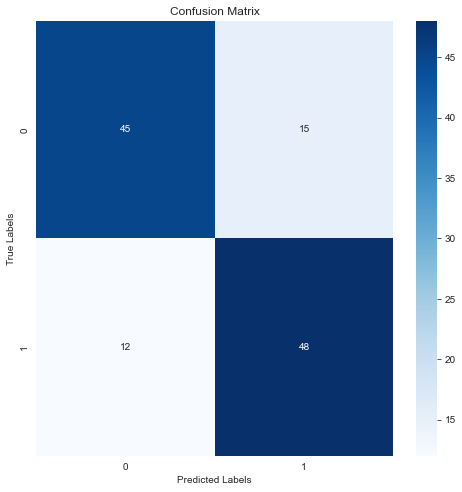

[I 2023-11-02 18:30:55,485] A new study created in memory with name: no-name-3e22453d-ef20-46ff-8631-e72f5a281bb3



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.94056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:31:09,648] Trial 0 finished with value: 0.9405555555555557 and parameters: {'n_d': 12, 'n_a': 19, 'n_steps': 15, 'gamma': 0.31295338909885334, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.014734381494363562}. Best is trial 0 with value: 0.9405555555555557.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.87778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:32:44,569] Trial 1 finished with value: 0.8777777777777778 and parameters: {'n_d': 34, 'n_a': 33, 'n_steps': 17, 'gamma': 1.8368892567086597, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.009542680243036492}. Best is trial 0 with value: 0.9405555555555557.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.87194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:33:24,641] Trial 2 finished with value: 0.8719444444444444 and parameters: {'n_d': 53, 'n_a': 64, 'n_steps': 13, 'gamma': 1.0789458305072364, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.08992385102155122}. Best is trial 0 with value: 0.9405555555555557.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.94389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:33:47,301] Trial 3 finished with value: 0.9438888888888888 and parameters: {'n_d': 25, 'n_a': 36, 'n_steps': 5, 'gamma': 1.83518749409181, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.06968788808793423}. Best is trial 3 with value: 0.9438888888888888.



Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_auc = 0.96083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:34:53,268] Trial 4 finished with value: 0.9608333333333334 and parameters: {'n_d': 40, 'n_a': 53, 'n_steps': 8, 'gamma': 0.692151557985821, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.08181760229743347}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.89583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:35:24,974] Trial 5 finished with value: 0.8958333333333334 and parameters: {'n_d': 46, 'n_a': 38, 'n_steps': 15, 'gamma': 1.1672683455580715, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.02160071003368606}. Best is trial 4 with value: 0.9608333333333334.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:35:27,434] Trial 6 finished with value: 0.9369444444444444 and parameters: {'n_d': 17, 'n_a': 11, 'n_steps': 4, 'gamma': 0.421393440969159, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.048061409782677124}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.93694

Early stopping occurred at epoch 45 with best_epoch = 35 and best_val_0_auc = 0.93694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:35:45,494] Trial 7 finished with value: 0.9369444444444444 and parameters: {'n_d': 48, 'n_a': 61, 'n_steps': 1, 'gamma': 0.10886406155129949, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.03867900462504645}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.90833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:36:23,698] Trial 8 finished with value: 0.9083333333333333 and parameters: {'n_d': 62, 'n_a': 29, 'n_steps': 5, 'gamma': 1.0857890495581093, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.09084190120287326}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.93889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:36:53,283] Trial 9 finished with value: 0.9388888888888889 and parameters: {'n_d': 13, 'n_a': 64, 'n_steps': 15, 'gamma': 0.19906131572284708, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.051429040893166515}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.94167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:38:08,740] Trial 10 finished with value: 0.9416666666666667 and parameters: {'n_d': 35, 'n_a': 48, 'n_steps': 9, 'gamma': 0.6908338839739591, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.07310751002616223}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.87056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:38:47,949] Trial 11 finished with value: 0.8705555555555556 and parameters: {'n_d': 25, 'n_a': 48, 'n_steps': 8, 'gamma': 1.9857002183391401, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.06990695668443972}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.93694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:39:15,791] Trial 12 finished with value: 0.9369444444444444 and parameters: {'n_d': 25, 'n_a': 48, 'n_steps': 6, 'gamma': 1.533288572122078, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.07153891540389169}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.93611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:40:24,288] Trial 13 finished with value: 0.9361111111111111 and parameters: {'n_d': 26, 'n_a': 41, 'n_steps': 11, 'gamma': 0.7763912224848648, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.09654998422673117}. Best is trial 4 with value: 0.9608333333333334.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:40:31,922] Trial 14 finished with value: 0.9230555555555555 and parameters: {'n_d': 41, 'n_a': 28, 'n_steps': 1, 'gamma': 1.5073595613480966, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.08030360090855962}. Best is trial 4 with value: 0.9608333333333334.



Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_auc = 0.92306

Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.94194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:41:05,241] Trial 15 finished with value: 0.9419444444444445 and parameters: {'n_d': 29, 'n_a': 55, 'n_steps': 7, 'gamma': 0.7453174398222433, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.06125795682181234}. Best is trial 4 with value: 0.9608333333333334.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.7165  |  0:00:01s
epoch 1  | loss: 1.37187 |  0:00:02s
epoch 2  | loss: 1.21483 |  0:00:04s
epoch 3  | loss: 1.00427 |  0:00:05s
epoch 4  | loss: 1.0022  |  0:00:07s
epoch 5  | loss: 0.92484 |  0:00:08s
epoch 6  | loss: 0.91546 |  0:00:09s
epoch 7  | loss: 0.87419 |  0:00:11s
epoch 8  | loss: 0.85725 |  0:00:12s
epoch 9  | loss: 0.89277 |  0:00:14s
epoch 10 | loss: 0.93791 |  0:00:15s
epoch 11 | loss: 0.82454 |  0:00:17s
epoch 12 | loss: 0.82228 |  0:00:18s
epoch 13 | loss: 0.81025 |  0:00:20s
epoch 14 | loss: 0.77638 |  0:00:21s
epoch 15 | loss: 0.76601 |  0:00:23s
epoch 16 | loss: 0.75691 |  0:00:24s
epoch 17 | loss: 0.74611 |  0:00:26s
epoch 18 | loss: 0.74118 |  0:00:27s
epoch 19 | loss: 0.7358  |  0:00:28s
epoch 20 | loss: 0.723   |  0:00:30s
epoch 21 | loss: 0.72842 |  0:00:31s
epoch 22 | loss: 0.71055 |  0:00:33s
epoch 23 | loss: 0.72263 |  0:00:34s
epoch 24 | loss: 0.7103  |  0:00:36s
epoch 25 | loss: 0.71616 |  0:00:37s
epoch 26 | loss: 0.70694 |  0:00:39s
e

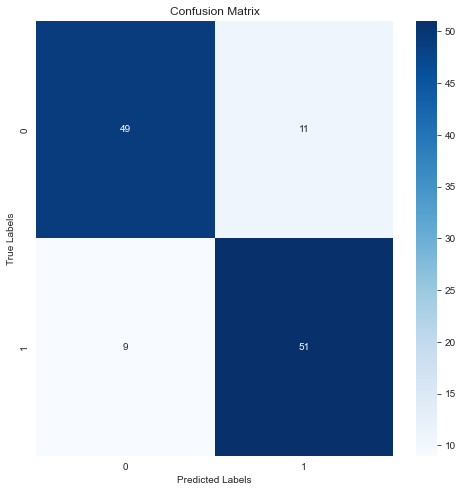

[I 2023-11-02 18:43:29,335] A new study created in memory with name: no-name-32b6793f-43b0-4328-8e55-1bdc8da2a136



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.57139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:43:51,208] Trial 0 finished with value: 0.571388888888889 and parameters: {'n_d': 46, 'n_a': 31, 'n_steps': 15, 'gamma': 0.28130749922527337, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.05388925433191993}. Best is trial 0 with value: 0.571388888888889.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.55083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:43:57,452] Trial 1 finished with value: 0.5508333333333333 and parameters: {'n_d': 45, 'n_a': 23, 'n_steps': 5, 'gamma': 0.8278061925834442, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.08361623022831233}. Best is trial 0 with value: 0.571388888888889.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.58583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:44:04,102] Trial 2 finished with value: 0.5858333333333334 and parameters: {'n_d': 56, 'n_a': 59, 'n_steps': 3, 'gamma': 1.3423806135669767, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.02030158419825036}. Best is trial 2 with value: 0.5858333333333334.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52264


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:44:19,023] Trial 3 finished with value: 0.5226388888888889 and parameters: {'n_d': 50, 'n_a': 40, 'n_steps': 6, 'gamma': 1.3603648666134596, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.07701896134527722}. Best is trial 2 with value: 0.5858333333333334.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.60389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:44:32,540] Trial 4 finished with value: 0.6038888888888889 and parameters: {'n_d': 64, 'n_a': 14, 'n_steps': 7, 'gamma': 0.5112573945845017, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.016284658606051973}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.57764


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:45:15,032] Trial 5 finished with value: 0.5776388888888888 and parameters: {'n_d': 62, 'n_a': 16, 'n_steps': 16, 'gamma': 1.946584979660881, 'n_independent': 6, 'n_shared': 9, 'lambda_sparse': 0.006544422762800102}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.56944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:45:30,280] Trial 6 finished with value: 0.5694444444444444 and parameters: {'n_d': 62, 'n_a': 29, 'n_steps': 10, 'gamma': 0.27491162976339034, 'n_independent': 4, 'n_shared': 1, 'lambda_sparse': 0.020906866475408858}. Best is trial 4 with value: 0.6038888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:45:33,970] Trial 7 finished with value: 0.565 and parameters: {'n_d': 25, 'n_a': 21, 'n_steps': 3, 'gamma': 1.9345168589332316, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.07302517549575488}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.565

Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.53889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:45:57,562] Trial 8 finished with value: 0.538888888888889 and parameters: {'n_d': 48, 'n_a': 60, 'n_steps': 6, 'gamma': 1.9891234393967245, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.0041707672043116385}. Best is trial 4 with value: 0.6038888888888889.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:46:00,310] Trial 9 finished with value: 0.5540277777777778 and parameters: {'n_d': 13, 'n_a': 29, 'n_steps': 1, 'gamma': 1.3336212161740473, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.06636802063013066}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55403

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.55167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:46:12,338] Trial 10 finished with value: 0.5516666666666666 and parameters: {'n_d': 27, 'n_a': 8, 'n_steps': 10, 'gamma': 0.6486253392514066, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.09853292237468689}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.53986


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:46:26,278] Trial 11 finished with value: 0.5398611111111111 and parameters: {'n_d': 63, 'n_a': 63, 'n_steps': 8, 'gamma': 1.1582640307779934, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.030952009160934504}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:46:30,611] Trial 12 finished with value: 0.5783333333333334 and parameters: {'n_d': 55, 'n_a': 47, 'n_steps': 2, 'gamma': 0.5916927371360398, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.03391574722836357}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:46:34,152] Trial 13 finished with value: 0.5697222222222221 and parameters: {'n_d': 36, 'n_a': 51, 'n_steps': 4, 'gamma': 0.1394834290916782, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.02122891941472547}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.58444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:46:58,544] Trial 14 finished with value: 0.5844444444444444 and parameters: {'n_d': 55, 'n_a': 42, 'n_steps': 13, 'gamma': 0.9338429883366395, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.04769376319542458}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.58208


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:47:50,635] Trial 15 finished with value: 0.5820833333333334 and parameters: {'n_d': 37, 'n_a': 54, 'n_steps': 19, 'gamma': 1.5912474765034055, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.0014082929349637369}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.57028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:48:11,483] Trial 16 finished with value: 0.5702777777777778 and parameters: {'n_d': 55, 'n_a': 8, 'n_steps': 8, 'gamma': 1.0444497173616762, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.01638600132624473}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.59361


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:48:19,797] Trial 17 finished with value: 0.5936111111111111 and parameters: {'n_d': 64, 'n_a': 38, 'n_steps': 8, 'gamma': 0.5727874759993083, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.03666468203410924}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.56611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:48:25,722] Trial 18 finished with value: 0.566111111111111 and parameters: {'n_d': 8, 'n_a': 34, 'n_steps': 12, 'gamma': 0.4916383247025955, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.037642538072963305}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.55722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:48:41,264] Trial 19 finished with value: 0.5572222222222222 and parameters: {'n_d': 37, 'n_a': 16, 'n_steps': 7, 'gamma': 0.7708107665521582, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.04310103329227731}. Best is trial 4 with value: 0.6038888888888889.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.60861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:49:10,241] Trial 20 finished with value: 0.6086111111111112 and parameters: {'n_d': 42, 'n_a': 39, 'n_steps': 10, 'gamma': 0.4078202882036803, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.05506183642113253}. Best is trial 20 with value: 0.6086111111111112.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.67028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:49:30,229] Trial 21 finished with value: 0.6702777777777778 and parameters: {'n_d': 24, 'n_a': 40, 'n_steps': 10, 'gamma': 0.4510539605060807, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.05669157129773306}. Best is trial 21 with value: 0.6702777777777778.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.55681


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:49:51,080] Trial 22 finished with value: 0.5568055555555556 and parameters: {'n_d': 21, 'n_a': 45, 'n_steps': 10, 'gamma': 0.33858997421118797, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.0542943403200561}. Best is trial 21 with value: 0.6702777777777778.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.62528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:50:12,359] Trial 23 finished with value: 0.6252777777777778 and parameters: {'n_d': 30, 'n_a': 36, 'n_steps': 12, 'gamma': 0.417112008449486, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.06122116775229947}. Best is trial 21 with value: 0.6702777777777778.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:50:29,221] Trial 24 finished with value: 0.5661111111111111 and parameters: {'n_d': 29, 'n_a': 35, 'n_steps': 12, 'gamma': 0.11991967240501711, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.06025685043802423}. Best is trial 21 with value: 0.6702777777777778.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.58194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:51:47,925] Trial 25 finished with value: 0.5819444444444445 and parameters: {'n_d': 32, 'n_a': 46, 'n_steps': 14, 'gamma': 0.405572424100751, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.058854491411274606}. Best is trial 21 with value: 0.6702777777777778.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.61472


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:52:35,352] Trial 26 finished with value: 0.6147222222222223 and parameters: {'n_d': 19, 'n_a': 51, 'n_steps': 17, 'gamma': 0.7020731770590114, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.04597271583443682}. Best is trial 21 with value: 0.6702777777777778.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.59083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:53:33,236] Trial 27 finished with value: 0.5908333333333333 and parameters: {'n_d': 23, 'n_a': 51, 'n_steps': 18, 'gamma': 0.7423589150146044, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.0471902136476401}. Best is trial 21 with value: 0.6702777777777778.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.17711 |  0:00:01s
epoch 1  | loss: 1.18481 |  0:00:02s
epoch 2  | loss: 0.92639 |  0:00:03s
epoch 3  | loss: 0.88259 |  0:00:05s
epoch 4  | loss: 0.87541 |  0:00:06s
epoch 5  | loss: 0.79107 |  0:00:07s
epoch 6  | loss: 0.84555 |  0:00:09s
epoch 7  | loss: 0.80931 |  0:00:10s
epoch 8  | loss: 0.81208 |  0:00:11s
epoch 9  | loss: 0.75322 |  0:00:13s
epoch 10 | loss: 0.76153 |  0:00:14s
epoch 11 | loss: 0.72374 |  0:00:15s
epoch 12 | loss: 0.715   |  0:00:16s
epoch 13 | loss: 0.66915 |  0:00:18s
epoch 14 | loss: 0.68013 |  0:00:19s
epoch 15 | loss: 0.6739  |  0:00:20s
epoch 16 | loss: 0.66802 |  0:00:22s
epoch 17 | loss: 0.66408 |  0:00:23s
epoch 18 | loss: 0.65551 |  0:00:24s
epoch 19 | loss: 0.65476 |  0:00:26s
epoch 20 | loss: 0.64814 |  0:00:27s
epoch 21 | loss: 0.64428 |  0:00:28s
epoch 22 | loss: 0.63546 |  0:00:30s
epoch 23 | loss: 0.62946 |  0:00:31s
epoch 24 | loss: 0.61817 |  0:00:32s
epoch 25 | loss: 0.62229 |  0:00:33s
epoch 26 | loss: 0.6014  |  0:00:35s
e

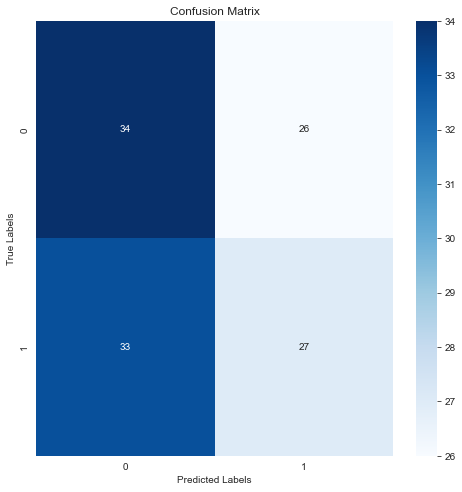

[I 2023-11-02 18:55:41,048] A new study created in memory with name: no-name-91ff40d2-7e8c-4c6c-b65b-981fbe5fce44



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.98111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:56:10,337] Trial 0 finished with value: 0.981111111111111 and parameters: {'n_d': 59, 'n_a': 64, 'n_steps': 6, 'gamma': 0.22188663597973032, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.022855107269285486}. Best is trial 0 with value: 0.981111111111111.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:56:22,194] Trial 1 finished with value: 0.9694444444444444 and parameters: {'n_d': 60, 'n_a': 12, 'n_steps': 3, 'gamma': 0.6694223149703127, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.08237847683190325}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.96944

Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.94944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:56:30,084] Trial 2 finished with value: 0.9494444444444444 and parameters: {'n_d': 30, 'n_a': 25, 'n_steps': 8, 'gamma': 1.2714058350637198, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.005432130560032583}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.92


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:57:07,626] Trial 3 finished with value: 0.92 and parameters: {'n_d': 19, 'n_a': 38, 'n_steps': 13, 'gamma': 1.3533743044384143, 'n_independent': 7, 'n_shared': 5, 'lambda_sparse': 0.014001442516472798}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.93694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:57:49,139] Trial 4 finished with value: 0.9369444444444445 and parameters: {'n_d': 23, 'n_a': 56, 'n_steps': 10, 'gamma': 1.7546296232870429, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.06444823403953528}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.74778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:59:29,970] Trial 5 finished with value: 0.7477777777777779 and parameters: {'n_d': 52, 'n_a': 14, 'n_steps': 16, 'gamma': 1.1042599872130099, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.08248239964089463}. Best is trial 0 with value: 0.981111111111111.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 18:59:35,087] Trial 6 finished with value: 0.9597222222222223 and parameters: {'n_d': 38, 'n_a': 58, 'n_steps': 4, 'gamma': 0.40548833118100214, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.08139235403187617}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.95972

Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.97167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:00:00,108] Trial 7 finished with value: 0.9716666666666666 and parameters: {'n_d': 62, 'n_a': 25, 'n_steps': 11, 'gamma': 0.4882852524231801, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.08248677425976746}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_auc = 0.97417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:01:18,807] Trial 8 finished with value: 0.9741666666666666 and parameters: {'n_d': 18, 'n_a': 57, 'n_steps': 7, 'gamma': 0.88655575937472, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.05443809798628853}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.86028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:04:09,819] Trial 9 finished with value: 0.8602777777777778 and parameters: {'n_d': 46, 'n_a': 56, 'n_steps': 18, 'gamma': 1.6137075100424465, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.019986100992916287}. Best is trial 0 with value: 0.981111111111111.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:04:19,745] Trial 10 finished with value: 0.9744444444444443 and parameters: {'n_d': 10, 'n_a': 44, 'n_steps': 2, 'gamma': 0.10075915720712625, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.03482805226701451}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.97444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:04:23,924] Trial 11 finished with value: 0.9633333333333334 and parameters: {'n_d': 8, 'n_a': 43, 'n_steps': 1, 'gamma': 0.14945018911567293, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.030642773382153633}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.96333

Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.98028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:04:40,709] Trial 12 finished with value: 0.9802777777777778 and parameters: {'n_d': 43, 'n_a': 46, 'n_steps': 5, 'gamma': 0.11454303818625466, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.03426279868747081}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.98056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:05:04,356] Trial 13 finished with value: 0.9805555555555556 and parameters: {'n_d': 50, 'n_a': 48, 'n_steps': 6, 'gamma': 0.34982116217816206, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.03740259228498565}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.91611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:05:20,109] Trial 14 finished with value: 0.9161111111111111 and parameters: {'n_d': 53, 'n_a': 63, 'n_steps': 7, 'gamma': 0.7451923020597603, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.04629692768257122}. Best is trial 0 with value: 0.981111111111111.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.9775


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:05:44,610] Trial 15 finished with value: 0.9774999999999999 and parameters: {'n_d': 53, 'n_a': 49, 'n_steps': 6, 'gamma': 0.39305563783680336, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.002499068106524123}. Best is trial 0 with value: 0.981111111111111.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.12055 |  0:00:01s
epoch 1  | loss: 1.43464 |  0:00:02s
epoch 2  | loss: 1.2622  |  0:00:03s
epoch 3  | loss: 1.05701 |  0:00:04s
epoch 4  | loss: 0.91152 |  0:00:05s
epoch 5  | loss: 0.81509 |  0:00:06s
epoch 6  | loss: 0.74049 |  0:00:07s
epoch 7  | loss: 0.71336 |  0:00:08s
epoch 8  | loss: 0.68698 |  0:00:09s
epoch 9  | loss: 0.71843 |  0:00:10s
epoch 10 | loss: 0.678   |  0:00:11s
epoch 11 | loss: 0.65691 |  0:00:12s
epoch 12 | loss: 0.6482  |  0:00:13s
epoch 13 | loss: 0.64517 |  0:00:14s
epoch 14 | loss: 0.64231 |  0:00:15s
epoch 15 | loss: 0.62945 |  0:00:16s
epoch 16 | loss: 0.61039 |  0:00:17s
epoch 17 | loss: 0.6207  |  0:00:18s
epoch 18 | loss: 0.61304 |  0:00:19s
epoch 19 | loss: 0.61568 |  0:00:20s
epoch 20 | loss: 0.6024  |  0:00:21s
epoch 21 | loss: 0.6091  |  0:00:22s
epoch 22 | loss: 0.60043 |  0:00:23s
epoch 23 | loss: 0.60274 |  0:00:24s
epoch 24 | loss: 0.58418 |  0:00:25s
epoch 25 | loss: 0.58911 |  0:00:26s
epoch 26 | loss: 0.57879 |  0:00:27s
e

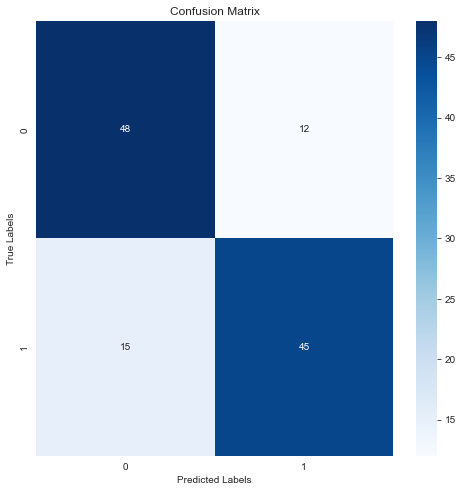

[I 2023-11-02 19:07:28,619] A new study created in memory with name: no-name-f67beba2-6d71-4c82-936b-e69475ed2c94



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.77611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:07:51,674] Trial 0 finished with value: 0.7761111111111111 and parameters: {'n_d': 64, 'n_a': 18, 'n_steps': 4, 'gamma': 1.4784073382658118, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.045195408540225454}. Best is trial 0 with value: 0.7761111111111111.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.65444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:08:45,123] Trial 1 finished with value: 0.6544444444444445 and parameters: {'n_d': 58, 'n_a': 14, 'n_steps': 11, 'gamma': 1.530956551105909, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.006685025153234933}. Best is trial 0 with value: 0.7761111111111111.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.83222


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:09:06,451] Trial 2 finished with value: 0.8322222222222222 and parameters: {'n_d': 60, 'n_a': 61, 'n_steps': 5, 'gamma': 0.35981622655918954, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.011958976249099617}. Best is trial 2 with value: 0.8322222222222222.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.84444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:11:22,541] Trial 3 finished with value: 0.8444444444444446 and parameters: {'n_d': 53, 'n_a': 54, 'n_steps': 19, 'gamma': 0.2895093454384007, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.08653500352125743}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.64861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:12:15,514] Trial 4 finished with value: 0.648611111111111 and parameters: {'n_d': 33, 'n_a': 8, 'n_steps': 14, 'gamma': 1.8713808035026496, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.011290023979237226}. Best is trial 3 with value: 0.8444444444444446.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:12:31,535] Trial 5 finished with value: 0.8347222222222221 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 1, 'gamma': 1.113290932043474, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.0014466562675606713}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 52 with best_epoch = 42 and best_val_0_auc = 0.83472

Early stopping occurred at epoch 53 with best_epoch = 43 and best_val_0_auc = 0.77639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:12:50,577] Trial 6 finished with value: 0.7763888888888889 and parameters: {'n_d': 40, 'n_a': 29, 'n_steps': 1, 'gamma': 1.2248576153015713, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.026628698656685094}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.75694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:13:36,714] Trial 7 finished with value: 0.7569444444444444 and parameters: {'n_d': 48, 'n_a': 59, 'n_steps': 11, 'gamma': 0.2642211504037809, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.011615695404385843}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.76944


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:14:30,846] Trial 8 finished with value: 0.7694444444444444 and parameters: {'n_d': 24, 'n_a': 35, 'n_steps': 16, 'gamma': 0.5233082058711654, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.08327269891663593}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.82111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:14:43,999] Trial 9 finished with value: 0.8211111111111111 and parameters: {'n_d': 24, 'n_a': 29, 'n_steps': 3, 'gamma': 0.4814732852786333, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.0033912846529406057}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.79861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:15:51,320] Trial 10 finished with value: 0.7986111111111112 and parameters: {'n_d': 48, 'n_a': 48, 'n_steps': 19, 'gamma': 0.10000440710893382, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.09894040060569595}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.81639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:16:18,173] Trial 11 finished with value: 0.8163888888888889 and parameters: {'n_d': 9, 'n_a': 48, 'n_steps': 7, 'gamma': 0.8259635297604763, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.06662567726204383}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.81528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:16:54,784] Trial 12 finished with value: 0.8152777777777778 and parameters: {'n_d': 33, 'n_a': 46, 'n_steps': 8, 'gamma': 0.8597352447469406, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.047196400400706405}. Best is trial 3 with value: 0.8444444444444446.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.81889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:18:30,176] Trial 13 finished with value: 0.8188888888888888 and parameters: {'n_d': 48, 'n_a': 40, 'n_steps': 19, 'gamma': 0.7452149411037794, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.06288803164058196}. Best is trial 3 with value: 0.8444444444444446.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 3.57428 |  0:00:03s
epoch 1  | loss: 3.19225 |  0:00:06s
epoch 2  | loss: 2.04252 |  0:00:09s
epoch 3  | loss: 1.73695 |  0:00:12s
epoch 4  | loss: 1.26475 |  0:00:15s
epoch 5  | loss: 1.04131 |  0:00:18s
epoch 6  | loss: 0.99118 |  0:00:21s
epoch 7  | loss: 0.88043 |  0:00:24s
epoch 8  | loss: 0.89832 |  0:00:27s
epoch 9  | loss: 0.94554 |  0:00:30s
epoch 10 | loss: 0.857   |  0:00:33s
epoch 11 | loss: 0.81834 |  0:00:36s
epoch 12 | loss: 0.81403 |  0:00:39s
epoch 13 | loss: 0.80362 |  0:00:42s
epoch 14 | loss: 0.80261 |  0:00:45s
epoch 15 | loss: 0.78936 |  0:00:48s
epoch 16 | loss: 0.77122 |  0:00:51s
epoch 17 | loss: 0.76511 |  0:00:54s
epoch 18 | loss: 0.7608  |  0:00:57s
epoch 19 | loss: 0.75418 |  0:01:00s
epoch 20 | loss: 0.76349 |  0:01:04s
epoch 21 | loss: 0.74793 |  0:01:07s
epoch 22 | loss: 0.74349 |  0:01:10s
epoch 23 | loss: 0.72657 |  0:01:13s
epoch 24 | loss: 0.73788 |  0:01:16s
epoch 25 | loss: 0.72338 |  0:01:19s
epoch 26 | loss: 0.72651 |  0:01:22s
e

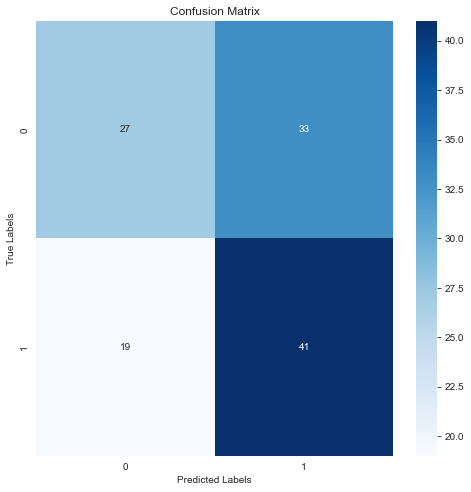

[I 2023-11-02 19:23:34,475] A new study created in memory with name: no-name-1d2345d7-52c7-4239-ad78-eaee0725b2de



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.60778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:23:50,920] Trial 0 finished with value: 0.6077777777777778 and parameters: {'n_d': 12, 'n_a': 36, 'n_steps': 6, 'gamma': 1.6830147166973881, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.08132677092454078}. Best is trial 0 with value: 0.6077777777777778.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.63083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:24:17,039] Trial 1 finished with value: 0.6308333333333334 and parameters: {'n_d': 9, 'n_a': 17, 'n_steps': 13, 'gamma': 0.9429408584440852, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.08758534980421115}. Best is trial 1 with value: 0.6308333333333334.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.64833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:24:45,369] Trial 2 finished with value: 0.6483333333333334 and parameters: {'n_d': 61, 'n_a': 62, 'n_steps': 10, 'gamma': 0.8989734108918409, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.080394084473108}. Best is trial 2 with value: 0.6483333333333334.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.66


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:25:04,269] Trial 3 finished with value: 0.6599999999999999 and parameters: {'n_d': 27, 'n_a': 46, 'n_steps': 4, 'gamma': 0.9480858647070401, 'n_independent': 6, 'n_shared': 7, 'lambda_sparse': 0.023543172080264494}. Best is trial 3 with value: 0.6599999999999999.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.58806


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:25:33,583] Trial 4 finished with value: 0.5880555555555556 and parameters: {'n_d': 38, 'n_a': 45, 'n_steps': 11, 'gamma': 1.4443771131615541, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.05985205759706631}. Best is trial 3 with value: 0.6599999999999999.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.65417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:25:55,414] Trial 5 finished with value: 0.6541666666666666 and parameters: {'n_d': 11, 'n_a': 34, 'n_steps': 13, 'gamma': 0.6096471470789635, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.004559586345483381}. Best is trial 3 with value: 0.6599999999999999.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.65889


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:26:09,648] Trial 6 finished with value: 0.6588888888888889 and parameters: {'n_d': 15, 'n_a': 14, 'n_steps': 13, 'gamma': 1.1774012324302807, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.040242054633868096}. Best is trial 3 with value: 0.6599999999999999.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.69028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:27:18,004] Trial 7 finished with value: 0.6902777777777778 and parameters: {'n_d': 55, 'n_a': 52, 'n_steps': 14, 'gamma': 0.6864140607228504, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.07075147121240057}. Best is trial 7 with value: 0.6902777777777778.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:27:24,021] Trial 8 finished with value: 0.6519444444444444 and parameters: {'n_d': 21, 'n_a': 11, 'n_steps': 1, 'gamma': 0.9899388693559664, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.0022635440053914275}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.65194

Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.635


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:29:00,664] Trial 9 finished with value: 0.635 and parameters: {'n_d': 59, 'n_a': 35, 'n_steps': 12, 'gamma': 0.5229273858514696, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.04458904284014121}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.64722


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:29:52,004] Trial 10 finished with value: 0.6472222222222223 and parameters: {'n_d': 47, 'n_a': 64, 'n_steps': 19, 'gamma': 0.20633101848409818, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.06353186150362516}. Best is trial 7 with value: 0.6902777777777778.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:30:03,867] Trial 11 finished with value: 0.6083333333333333 and parameters: {'n_d': 28, 'n_a': 53, 'n_steps': 1, 'gamma': 0.6488118711282936, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.02594443580386782}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.60833

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.56319


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:30:55,443] Trial 12 finished with value: 0.5631944444444446 and parameters: {'n_d': 42, 'n_a': 49, 'n_steps': 17, 'gamma': 1.8774198351343974, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.09709717552055075}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.67389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:31:15,816] Trial 13 finished with value: 0.6738888888888889 and parameters: {'n_d': 51, 'n_a': 44, 'n_steps': 6, 'gamma': 1.2212318713673096, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.024386789094085003}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.61139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:31:32,105] Trial 14 finished with value: 0.611388888888889 and parameters: {'n_d': 51, 'n_a': 26, 'n_steps': 8, 'gamma': 1.2442886039718941, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.06734670232003506}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.61639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:32:10,131] Trial 15 finished with value: 0.616388888888889 and parameters: {'n_d': 54, 'n_a': 53, 'n_steps': 16, 'gamma': 1.3924446348835964, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.05610220585319673}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.64556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:32:28,019] Trial 16 finished with value: 0.6455555555555555 and parameters: {'n_d': 64, 'n_a': 42, 'n_steps': 8, 'gamma': 1.5623418864647554, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.07047951715881932}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.62028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:32:37,562] Trial 17 finished with value: 0.6202777777777778 and parameters: {'n_d': 47, 'n_a': 56, 'n_steps': 4, 'gamma': 1.2983340286651823, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.04928048423329963}. Best is trial 7 with value: 0.6902777777777778.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.60375


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:34:31,440] Trial 18 finished with value: 0.60375 and parameters: {'n_d': 56, 'n_a': 28, 'n_steps': 15, 'gamma': 1.0984591543203366, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.03675725938165399}. Best is trial 7 with value: 0.6902777777777778.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.95282 |  0:00:02s
epoch 1  | loss: 2.42176 |  0:00:05s
epoch 2  | loss: 1.87177 |  0:00:08s
epoch 3  | loss: 1.50358 |  0:00:11s
epoch 4  | loss: 1.49022 |  0:00:14s
epoch 5  | loss: 1.48707 |  0:00:17s
epoch 6  | loss: 1.4002  |  0:00:20s
epoch 7  | loss: 1.6091  |  0:00:23s
epoch 8  | loss: 1.76313 |  0:00:26s
epoch 9  | loss: 1.26264 |  0:00:28s
epoch 10 | loss: 1.40468 |  0:00:31s
epoch 11 | loss: 1.07948 |  0:00:34s
epoch 12 | loss: 1.04495 |  0:00:37s
epoch 13 | loss: 1.00553 |  0:00:40s
epoch 14 | loss: 1.01394 |  0:00:43s
epoch 15 | loss: 0.90892 |  0:00:46s
epoch 16 | loss: 0.9152  |  0:00:48s
epoch 17 | loss: 0.85777 |  0:00:51s
epoch 18 | loss: 0.83103 |  0:00:54s
epoch 19 | loss: 0.8289  |  0:00:57s
epoch 20 | loss: 0.79349 |  0:01:00s
epoch 21 | loss: 0.79636 |  0:01:03s
epoch 22 | loss: 0.76735 |  0:01:05s
epoch 23 | loss: 0.76223 |  0:01:08s
epoch 24 | loss: 0.74754 |  0:01:11s
epoch 25 | loss: 0.74425 |  0:01:14s
epoch 26 | loss: 0.72009 |  0:01:17s
e

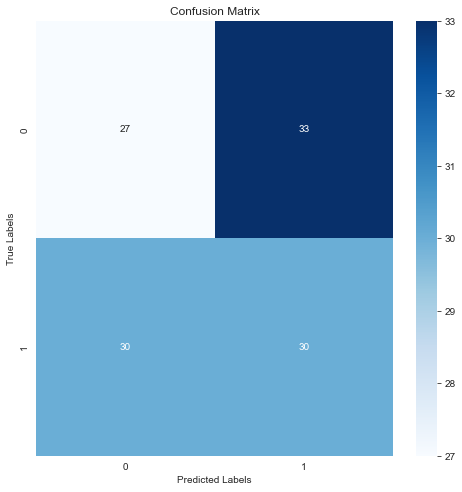

[I 2023-11-02 19:39:13,015] A new study created in memory with name: no-name-70b8f931-3252-4dd4-ab79-d69fc7b09571



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53444


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:39:23,087] Trial 0 finished with value: 0.5344444444444444 and parameters: {'n_d': 20, 'n_a': 42, 'n_steps': 6, 'gamma': 1.5849740541837252, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.03770676717308511}. Best is trial 0 with value: 0.5344444444444444.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.55778


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:40:19,070] Trial 1 finished with value: 0.5577777777777778 and parameters: {'n_d': 18, 'n_a': 58, 'n_steps': 14, 'gamma': 0.32744828330738407, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.04294421622695258}. Best is trial 1 with value: 0.5577777777777778.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.52083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:40:24,373] Trial 2 finished with value: 0.5208333333333334 and parameters: {'n_d': 22, 'n_a': 33, 'n_steps': 5, 'gamma': 0.25276911115703316, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.020759897352523326}. Best is trial 1 with value: 0.5577777777777778.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.60403


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:40:44,442] Trial 3 finished with value: 0.6040277777777777 and parameters: {'n_d': 17, 'n_a': 34, 'n_steps': 14, 'gamma': 1.71723193429546, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.0035404967250836847}. Best is trial 3 with value: 0.6040277777777777.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.54056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:41:34,961] Trial 4 finished with value: 0.5405555555555556 and parameters: {'n_d': 11, 'n_a': 30, 'n_steps': 17, 'gamma': 1.824328131921529, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.0766018588363364}. Best is trial 3 with value: 0.6040277777777777.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.51139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:41:49,667] Trial 5 finished with value: 0.5113888888888889 and parameters: {'n_d': 44, 'n_a': 43, 'n_steps': 2, 'gamma': 0.3870486166168431, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.005769860331875943}. Best is trial 3 with value: 0.6040277777777777.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.56028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:42:14,665] Trial 6 finished with value: 0.5602777777777778 and parameters: {'n_d': 60, 'n_a': 61, 'n_steps': 7, 'gamma': 0.3311919146469404, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.08699285489046582}. Best is trial 3 with value: 0.6040277777777777.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.60708


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:42:28,011] Trial 7 finished with value: 0.6070833333333334 and parameters: {'n_d': 63, 'n_a': 53, 'n_steps': 9, 'gamma': 0.5668494413265436, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.01976479267669755}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:42:39,500] Trial 8 finished with value: 0.51 and parameters: {'n_d': 56, 'n_a': 44, 'n_steps': 4, 'gamma': 1.246630177782052, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.051743682897571884}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.53292


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:44:00,165] Trial 9 finished with value: 0.5329166666666667 and parameters: {'n_d': 33, 'n_a': 45, 'n_steps': 17, 'gamma': 1.6409371417638134, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.059562780436920204}. Best is trial 7 with value: 0.6070833333333334.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:44:06,988] Trial 10 finished with value: 0.5905555555555555 and parameters: {'n_d': 45, 'n_a': 9, 'n_steps': 11, 'gamma': 0.7580299835315072, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.02363079982931499}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.59056

Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.53278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:44:25,494] Trial 11 finished with value: 0.5327777777777778 and parameters: {'n_d': 32, 'n_a': 24, 'n_steps': 10, 'gamma': 1.0019059320009354, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.0006210662183566765}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.55167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:44:51,835] Trial 12 finished with value: 0.5516666666666666 and parameters: {'n_d': 8, 'n_a': 53, 'n_steps': 12, 'gamma': 1.9546489706721026, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.016956874748438475}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.60111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:45:47,300] Trial 13 finished with value: 0.6011111111111112 and parameters: {'n_d': 51, 'n_a': 21, 'n_steps': 14, 'gamma': 0.7270581491290827, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.0024255182827476293}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54569


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:45:59,739] Trial 14 finished with value: 0.5456944444444445 and parameters: {'n_d': 27, 'n_a': 52, 'n_steps': 9, 'gamma': 1.29764376247092, 'n_independent': 8, 'n_shared': 1, 'lambda_sparse': 0.028790074220678138}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.59833


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:46:51,966] Trial 15 finished with value: 0.5983333333333333 and parameters: {'n_d': 39, 'n_a': 64, 'n_steps': 14, 'gamma': 0.6896956363136434, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.013968992924120717}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:47:27,656] Trial 16 finished with value: 0.5752777777777778 and parameters: {'n_d': 63, 'n_a': 37, 'n_steps': 19, 'gamma': 1.3480314754877643, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.03254940626608935}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.49556


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:47:41,810] Trial 17 finished with value: 0.4955555555555555 and parameters: {'n_d': 52, 'n_a': 18, 'n_steps': 9, 'gamma': 0.9595590563397338, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.011310274554980904}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:47:59,583] Trial 18 finished with value: 0.5652777777777778 and parameters: {'n_d': 15, 'n_a': 51, 'n_steps': 13, 'gamma': 0.5648113568054716, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.024527814232458076}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.54056


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:48:27,431] Trial 19 finished with value: 0.5405555555555556 and parameters: {'n_d': 26, 'n_a': 29, 'n_steps': 16, 'gamma': 0.10389383696417942, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.011496646948662407}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.50917


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:48:44,373] Trial 20 finished with value: 0.5091666666666668 and parameters: {'n_d': 41, 'n_a': 39, 'n_steps': 8, 'gamma': 1.9889644680540381, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.032979023786284915}. Best is trial 7 with value: 0.6070833333333334.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.54069


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:49:19,030] Trial 21 finished with value: 0.5406944444444445 and parameters: {'n_d': 51, 'n_a': 18, 'n_steps': 15, 'gamma': 0.8059950007075694, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.0006387908631224201}. Best is trial 7 with value: 0.6070833333333334.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.64734 |  0:00:01s
epoch 1  | loss: 1.54534 |  0:00:02s
epoch 2  | loss: 1.26267 |  0:00:03s
epoch 3  | loss: 0.97879 |  0:00:04s
epoch 4  | loss: 0.84541 |  0:00:04s
epoch 5  | loss: 0.82251 |  0:00:06s
epoch 6  | loss: 0.80717 |  0:00:07s
epoch 7  | loss: 0.73751 |  0:00:07s
epoch 8  | loss: 0.7587  |  0:00:08s
epoch 9  | loss: 0.6848  |  0:00:09s
epoch 10 | loss: 0.66828 |  0:00:10s
epoch 11 | loss: 0.62172 |  0:00:11s
epoch 12 | loss: 0.63701 |  0:00:12s
epoch 13 | loss: 0.60995 |  0:00:13s
epoch 14 | loss: 0.60501 |  0:00:14s
epoch 15 | loss: 0.58148 |  0:00:15s
epoch 16 | loss: 0.57661 |  0:00:16s
epoch 17 | loss: 0.55378 |  0:00:17s
epoch 18 | loss: 0.54845 |  0:00:18s
epoch 19 | loss: 0.5632  |  0:00:19s
epoch 20 | loss: 0.54352 |  0:00:20s
epoch 21 | loss: 0.56414 |  0:00:21s
epoch 22 | loss: 0.54499 |  0:00:22s
epoch 23 | loss: 0.52093 |  0:00:23s
epoch 24 | loss: 0.51796 |  0:00:24s
epoch 25 | loss: 0.51738 |  0:00:25s
epoch 26 | loss: 0.49915 |  0:00:26s
e

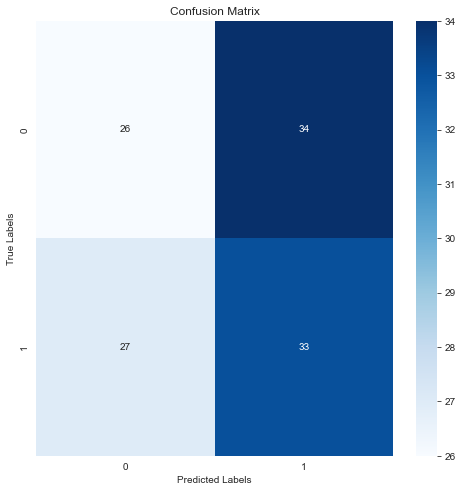

[I 2023-11-02 19:50:59,311] A new study created in memory with name: no-name-dde65224-cc7f-439a-af61-08810878434a
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:51:01,213] Trial 0 finished with value: 0.743177247917265 and parameters: {'n_d': 44, 'n_a': 19, 'n_steps': 2, 'gamma': 0.4541291387092946, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.048256699011348526}. Best is trial 0 with value: 0.743177247917265.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.74318

Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.7449


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:51:39,062] Trial 1 finished with value: 0.7449008905486929 and parameters: {'n_d': 27, 'n_a': 19, 'n_steps': 14, 'gamma': 0.3270770773901843, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.023736216764034496}. Best is trial 1 with value: 0.7449008905486929.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.76616


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:52:12,930] Trial 2 finished with value: 0.7661591496696352 and parameters: {'n_d': 62, 'n_a': 29, 'n_steps': 16, 'gamma': 0.7836249732797126, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.08802768478605005}. Best is trial 2 with value: 0.7661591496696352.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.71445


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:53:10,294] Trial 3 finished with value: 0.7144498707268027 and parameters: {'n_d': 40, 'n_a': 55, 'n_steps': 16, 'gamma': 1.8724619692739797, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.09936022149642326}. Best is trial 2 with value: 0.7661591496696352.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.70583


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:53:25,221] Trial 4 finished with value: 0.7058316575696638 and parameters: {'n_d': 51, 'n_a': 60, 'n_steps': 7, 'gamma': 1.5007554271142018, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.07874543291884735}. Best is trial 2 with value: 0.7661591496696352.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.76386


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:53:45,547] Trial 5 finished with value: 0.7638609594943981 and parameters: {'n_d': 64, 'n_a': 22, 'n_steps': 4, 'gamma': 1.7154984117519787, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.024227614778574828}. Best is trial 2 with value: 0.7661591496696352.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.77593


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:54:14,953] Trial 6 finished with value: 0.7759264579143925 and parameters: {'n_d': 57, 'n_a': 63, 'n_steps': 8, 'gamma': 1.1772388252802326, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.02251888304857825}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.71933


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:54:51,697] Trial 7 finished with value: 0.7193335248491812 and parameters: {'n_d': 9, 'n_a': 35, 'n_steps': 11, 'gamma': 1.3705726375661624, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.03261626424675459}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 42 with best_epoch = 32 and best_val_0_auc = 0.75582


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:55:10,674] Trial 8 finished with value: 0.7558172938810687 and parameters: {'n_d': 53, 'n_a': 24, 'n_steps': 6, 'gamma': 1.719120143537738, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.01590931745433097}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.6794


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:56:14,823] Trial 9 finished with value: 0.6794024705544384 and parameters: {'n_d': 9, 'n_a': 30, 'n_steps': 18, 'gamma': 1.8369729853381824, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.09858612826227799}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.72695


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:56:48,350] Trial 10 finished with value: 0.7269462798046539 and parameters: {'n_d': 25, 'n_a': 45, 'n_steps': 11, 'gamma': 0.9414702823468513, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.0031762550428800634}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 45 with best_epoch = 35 and best_val_0_auc = 0.76415


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:57:17,053] Trial 11 finished with value: 0.7641482332663028 and parameters: {'n_d': 64, 'n_a': 45, 'n_steps': 9, 'gamma': 0.8443514828281861, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.052059886333083304}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.7393


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 19:57:47,651] Trial 12 finished with value: 0.7392990519965528 and parameters: {'n_d': 54, 'n_a': 45, 'n_steps': 14, 'gamma': 1.17452637603509, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.0688207244918835}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_auc = 0.7676


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:00:06,329] Trial 13 finished with value: 0.7675955185291583 and parameters: {'n_d': 59, 'n_a': 53, 'n_steps': 13, 'gamma': 0.7277809893292371, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.04460805937869147}. Best is trial 6 with value: 0.7759264579143925.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_auc = 0.79029


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:01:35,556] Trial 14 finished with value: 0.7902901465096237 and parameters: {'n_d': 33, 'n_a': 62, 'n_steps': 9, 'gamma': 0.6401131306995252, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.042223273135869266}. Best is trial 14 with value: 0.7902901465096237.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.25178 |  0:00:01s
epoch 1  | loss: 1.21394 |  0:00:03s
epoch 2  | loss: 1.03546 |  0:00:05s
epoch 3  | loss: 1.0617  |  0:00:07s
epoch 4  | loss: 0.98989 |  0:00:09s
epoch 5  | loss: 0.87838 |  0:00:10s
epoch 6  | loss: 0.85011 |  0:00:12s
epoch 7  | loss: 0.87937 |  0:00:14s
epoch 8  | loss: 0.80598 |  0:00:16s
epoch 9  | loss: 0.85156 |  0:00:18s
epoch 10 | loss: 0.77397 |  0:00:19s
epoch 11 | loss: 0.74416 |  0:00:21s
epoch 12 | loss: 0.77121 |  0:00:23s
epoch 13 | loss: 0.74162 |  0:00:25s
epoch 14 | loss: 0.77091 |  0:00:26s
epoch 15 | loss: 0.73465 |  0:00:28s
epoch 16 | loss: 0.72114 |  0:00:30s
epoch 17 | loss: 0.68784 |  0:00:32s
epoch 18 | loss: 0.67994 |  0:00:34s
epoch 19 | loss: 0.66663 |  0:00:35s
epoch 20 | loss: 0.67448 |  0:00:37s
epoch 21 | loss: 0.66203 |  0:00:39s
epoch 22 | loss: 0.65923 |  0:00:41s
epoch 23 | loss: 0.65642 |  0:00:43s
epoch 24 | loss: 0.65626 |  0:00:44s
epoch 25 | loss: 0.65346 |  0:00:46s
epoch 26 | loss: 0.65284 |  0:00:48s
e

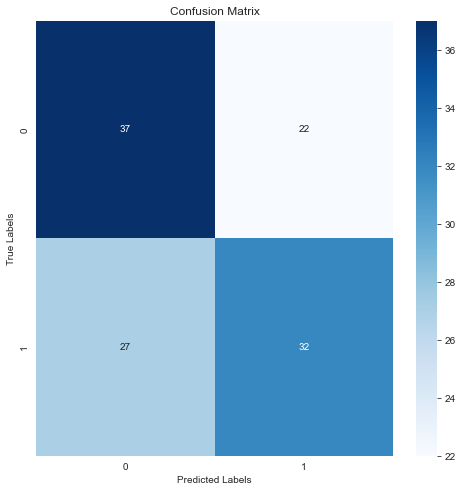

[I 2023-11-02 20:04:37,999] A new study created in memory with name: no-name-02576bcc-7064-4d22-bc02-8ea4faae3d32



Early stopping occurred at epoch 52 with best_epoch = 42 and best_val_0_auc = 0.7325


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:05:37,748] Trial 0 finished with value: 0.7324999999999999 and parameters: {'n_d': 26, 'n_a': 21, 'n_steps': 16, 'gamma': 1.2548865582632611, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.05507130769403687}. Best is trial 0 with value: 0.7324999999999999.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.60375


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:06:12,604] Trial 1 finished with value: 0.60375 and parameters: {'n_d': 26, 'n_a': 58, 'n_steps': 12, 'gamma': 1.6309907236984997, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.01394114695207129}. Best is trial 0 with value: 0.7324999999999999.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.85611


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:06:25,769] Trial 2 finished with value: 0.856111111111111 and parameters: {'n_d': 58, 'n_a': 19, 'n_steps': 2, 'gamma': 0.2328517549762896, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.037667715268285974}. Best is trial 2 with value: 0.856111111111111.



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.88111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:08:25,652] Trial 3 finished with value: 0.8811111111111111 and parameters: {'n_d': 16, 'n_a': 53, 'n_steps': 15, 'gamma': 0.5614519822317668, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.005270545329803311}. Best is trial 3 with value: 0.8811111111111111.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.65333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:08:50,282] Trial 4 finished with value: 0.6533333333333333 and parameters: {'n_d': 58, 'n_a': 19, 'n_steps': 8, 'gamma': 1.7303740599250628, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.06630942328727116}. Best is trial 3 with value: 0.8811111111111111.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.88167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:09:43,924] Trial 5 finished with value: 0.8816666666666667 and parameters: {'n_d': 49, 'n_a': 54, 'n_steps': 6, 'gamma': 0.49601309755345535, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.033059214157583984}. Best is trial 5 with value: 0.8816666666666667.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:09:51,188] Trial 6 finished with value: 0.7519444444444444 and parameters: {'n_d': 30, 'n_a': 11, 'n_steps': 3, 'gamma': 1.9435676437119351, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.05480547591888846}. Best is trial 5 with value: 0.8816666666666667.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.75194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:10:07,889] Trial 7 finished with value: 0.8580555555555555 and parameters: {'n_d': 34, 'n_a': 20, 'n_steps': 2, 'gamma': 0.9948975837212807, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.05582663771614257}. Best is trial 5 with value: 0.8816666666666667.



Early stopping occurred at epoch 53 with best_epoch = 43 and best_val_0_auc = 0.85806

Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.70083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:11:05,965] Trial 8 finished with value: 0.7008333333333334 and parameters: {'n_d': 26, 'n_a': 8, 'n_steps': 13, 'gamma': 1.6088287586759253, 'n_independent': 9, 'n_shared': 6, 'lambda_sparse': 0.07091642570587879}. Best is trial 5 with value: 0.8816666666666667.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.71972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:11:16,169] Trial 9 finished with value: 0.7197222222222223 and parameters: {'n_d': 32, 'n_a': 22, 'n_steps': 5, 'gamma': 1.8440751279019412, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.019323257806664162}. Best is trial 5 with value: 0.8816666666666667.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.87333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:11:59,114] Trial 10 finished with value: 0.8733333333333333 and parameters: {'n_d': 50, 'n_a': 42, 'n_steps': 9, 'gamma': 0.150083497684949, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.09767977624560624}. Best is trial 5 with value: 0.8816666666666667.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.88861


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:13:11,957] Trial 11 finished with value: 0.8886111111111111 and parameters: {'n_d': 8, 'n_a': 61, 'n_steps': 19, 'gamma': 0.5770296802110106, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.007069690374934349}. Best is trial 11 with value: 0.8886111111111111.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.86528


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:14:11,104] Trial 12 finished with value: 0.8652777777777779 and parameters: {'n_d': 8, 'n_a': 63, 'n_steps': 18, 'gamma': 0.6352520360960833, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.0009765263434219906}. Best is trial 11 with value: 0.8886111111111111.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.84389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:14:34,156] Trial 13 finished with value: 0.8438888888888889 and parameters: {'n_d': 45, 'n_a': 48, 'n_steps': 6, 'gamma': 0.5488443256733482, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.02935025918122034}. Best is trial 11 with value: 0.8886111111111111.



Early stopping occurred at epoch 52 with best_epoch = 42 and best_val_0_auc = 0.88278


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:17:08,685] Trial 14 finished with value: 0.8827777777777778 and parameters: {'n_d': 44, 'n_a': 36, 'n_steps': 19, 'gamma': 0.8282447457589198, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.02415356628316071}. Best is trial 11 with value: 0.8886111111111111.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.43598 |  0:00:02s
epoch 1  | loss: 0.85359 |  0:00:05s
epoch 2  | loss: 0.79557 |  0:00:07s
epoch 3  | loss: 0.8041  |  0:00:10s
epoch 4  | loss: 0.71043 |  0:00:12s
epoch 5  | loss: 0.71927 |  0:00:15s
epoch 6  | loss: 0.73358 |  0:00:17s
epoch 7  | loss: 0.6743  |  0:00:20s
epoch 8  | loss: 0.64044 |  0:00:23s
epoch 9  | loss: 0.62051 |  0:00:25s
epoch 10 | loss: 0.61445 |  0:00:28s
epoch 11 | loss: 0.59954 |  0:00:30s
epoch 12 | loss: 0.59192 |  0:00:33s
epoch 13 | loss: 0.59361 |  0:00:35s
epoch 14 | loss: 0.58164 |  0:00:38s
epoch 15 | loss: 0.57312 |  0:00:40s
epoch 16 | loss: 0.56955 |  0:00:43s
epoch 17 | loss: 0.55983 |  0:00:45s
epoch 18 | loss: 0.55678 |  0:00:48s
epoch 19 | loss: 0.55326 |  0:00:50s
epoch 20 | loss: 0.5553  |  0:00:53s
epoch 21 | loss: 0.54918 |  0:00:55s
epoch 22 | loss: 0.54882 |  0:00:58s
epoch 23 | loss: 0.54317 |  0:01:01s
epoch 24 | loss: 0.54    |  0:01:03s
epoch 25 | loss: 0.54904 |  0:01:06s
epoch 26 | loss: 0.53419 |  0:01:08s
e

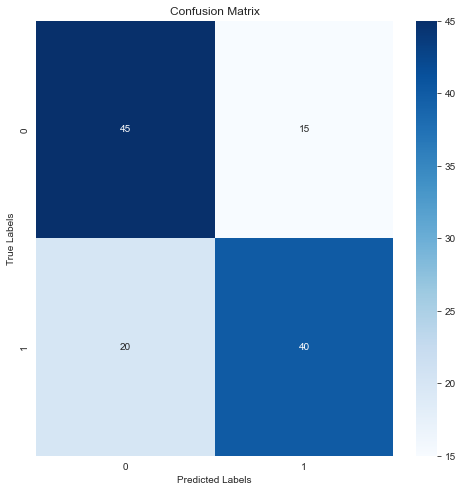

[I 2023-11-02 20:21:22,524] A new study created in memory with name: no-name-3c8c8fe9-fee3-4619-b8ca-ee4205844f7b



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.84333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:21:37,904] Trial 0 finished with value: 0.8433333333333333 and parameters: {'n_d': 16, 'n_a': 40, 'n_steps': 9, 'gamma': 0.6687311710791034, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.08892184388640667}. Best is trial 0 with value: 0.8433333333333333.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:21:41,619] Trial 1 finished with value: 0.8372222222222222 and parameters: {'n_d': 10, 'n_a': 48, 'n_steps': 1, 'gamma': 0.7635204601835731, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.03527749899788117}. Best is trial 0 with value: 0.8433333333333333.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.83722

Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.86194


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:22:20,087] Trial 2 finished with value: 0.8619444444444444 and parameters: {'n_d': 15, 'n_a': 34, 'n_steps': 12, 'gamma': 0.728901845148476, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.022265633357618456}. Best is trial 2 with value: 0.8619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:22:28,228] Trial 3 finished with value: 0.8519444444444444 and parameters: {'n_d': 31, 'n_a': 46, 'n_steps': 1, 'gamma': 1.0738973796504816, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.06572159235323602}. Best is trial 2 with value: 0.8619444444444444.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.85194

Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.84639


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:23:34,628] Trial 4 finished with value: 0.8463888888888889 and parameters: {'n_d': 14, 'n_a': 59, 'n_steps': 11, 'gamma': 1.9161580790673527, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.06512923039515536}. Best is trial 2 with value: 0.8619444444444444.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:23:39,275] Trial 5 finished with value: 0.8219444444444444 and parameters: {'n_d': 52, 'n_a': 23, 'n_steps': 1, 'gamma': 1.0078003055056812, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.08789815898069972}. Best is trial 2 with value: 0.8619444444444444.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.82194

Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.88083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:23:49,649] Trial 6 finished with value: 0.8808333333333334 and parameters: {'n_d': 34, 'n_a': 62, 'n_steps': 2, 'gamma': 0.21675067678692272, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.09292688534072442}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.77333


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:24:53,902] Trial 7 finished with value: 0.7733333333333332 and parameters: {'n_d': 58, 'n_a': 45, 'n_steps': 13, 'gamma': 1.8269143883110224, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.001400410091945235}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.80306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:25:20,182] Trial 8 finished with value: 0.8030555555555556 and parameters: {'n_d': 11, 'n_a': 27, 'n_steps': 14, 'gamma': 1.8424410117584482, 'n_independent': 8, 'n_shared': 1, 'lambda_sparse': 0.026577696416944185}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.78389


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:26:23,081] Trial 9 finished with value: 0.783888888888889 and parameters: {'n_d': 13, 'n_a': 30, 'n_steps': 19, 'gamma': 1.6329316521491888, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.062168923611570184}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.86167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:26:44,034] Trial 10 finished with value: 0.8616666666666667 and parameters: {'n_d': 40, 'n_a': 10, 'n_steps': 6, 'gamma': 0.19797745011038176, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.0928923739390124}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.85111


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:26:58,783] Trial 11 finished with value: 0.851111111111111 and parameters: {'n_d': 26, 'n_a': 63, 'n_steps': 6, 'gamma': 0.3257218823865072, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.09900447778866893}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.84653


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:27:48,485] Trial 12 finished with value: 0.8465277777777778 and parameters: {'n_d': 43, 'n_a': 55, 'n_steps': 17, 'gamma': 0.3928329319709444, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.04274675983492211}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.865


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:28:11,082] Trial 13 finished with value: 0.865 and parameters: {'n_d': 25, 'n_a': 34, 'n_steps': 6, 'gamma': 0.2072122014799926, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.017665228315204617}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.80417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:28:20,697] Trial 14 finished with value: 0.8041666666666666 and parameters: {'n_d': 25, 'n_a': 18, 'n_steps': 5, 'gamma': 0.12745490145928964, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.05446066682548128}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.86083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:28:38,130] Trial 15 finished with value: 0.8608333333333333 and parameters: {'n_d': 34, 'n_a': 37, 'n_steps': 4, 'gamma': 0.44705252214966823, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.0738361342338712}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.86306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:29:22,316] Trial 16 finished with value: 0.8630555555555556 and parameters: {'n_d': 22, 'n_a': 53, 'n_steps': 8, 'gamma': 0.11736213987432208, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.08016618083620573}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.86694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:29:32,139] Trial 17 finished with value: 0.8669444444444445 and parameters: {'n_d': 47, 'n_a': 19, 'n_steps': 3, 'gamma': 0.3530845632160503, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.05171257427958436}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.87083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:29:45,746] Trial 18 finished with value: 0.8708333333333333 and parameters: {'n_d': 48, 'n_a': 8, 'n_steps': 3, 'gamma': 0.5460259701421414, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.05104111779145718}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_auc = 0.86694


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:30:12,366] Trial 19 finished with value: 0.8669444444444445 and parameters: {'n_d': 63, 'n_a': 11, 'n_steps': 3, 'gamma': 0.5595694871776976, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.07752622356023889}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.85


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:30:49,227] Trial 20 finished with value: 0.85 and parameters: {'n_d': 52, 'n_a': 16, 'n_steps': 8, 'gamma': 0.4822518766703444, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.046009373036535774}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.84972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:31:08,080] Trial 21 finished with value: 0.8497222222222222 and parameters: {'n_d': 46, 'n_a': 8, 'n_steps': 3, 'gamma': 0.32186544267300277, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.05616815921788021}. Best is trial 6 with value: 0.8808333333333334.



Early stopping occurred at epoch 48 with best_epoch = 38 and best_val_0_auc = 0.87417


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:31:32,424] Trial 22 finished with value: 0.8741666666666666 and parameters: {'n_d': 49, 'n_a': 16, 'n_steps': 3, 'gamma': 0.3246144285853954, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.048280722956181674}. Best is trial 6 with value: 0.8808333333333334.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.97913 |  0:00:00s
epoch 1  | loss: 0.85468 |  0:00:00s
epoch 2  | loss: 0.84262 |  0:00:01s
epoch 3  | loss: 0.81516 |  0:00:01s
epoch 4  | loss: 0.79693 |  0:00:02s
epoch 5  | loss: 0.78887 |  0:00:02s
epoch 6  | loss: 0.7552  |  0:00:03s
epoch 7  | loss: 0.75155 |  0:00:03s
epoch 8  | loss: 0.74144 |  0:00:04s
epoch 9  | loss: 0.71665 |  0:00:04s
epoch 10 | loss: 0.70367 |  0:00:05s
epoch 11 | loss: 0.69493 |  0:00:05s
epoch 12 | loss: 0.68768 |  0:00:06s
epoch 13 | loss: 0.67446 |  0:00:06s
epoch 14 | loss: 0.66296 |  0:00:06s
epoch 15 | loss: 0.67361 |  0:00:07s
epoch 16 | loss: 0.65865 |  0:00:07s
epoch 17 | loss: 0.65676 |  0:00:08s
epoch 18 | loss: 0.6537  |  0:00:08s
epoch 19 | loss: 0.65494 |  0:00:09s
epoch 20 | loss: 0.64577 |  0:00:09s
epoch 21 | loss: 0.64413 |  0:00:10s
epoch 22 | loss: 0.64704 |  0:00:10s
epoch 23 | loss: 0.63796 |  0:00:11s
epoch 24 | loss: 0.63518 |  0:00:11s
epoch 25 | loss: 0.63545 |  0:00:12s
epoch 26 | loss: 0.63535 |  0:00:12s
e

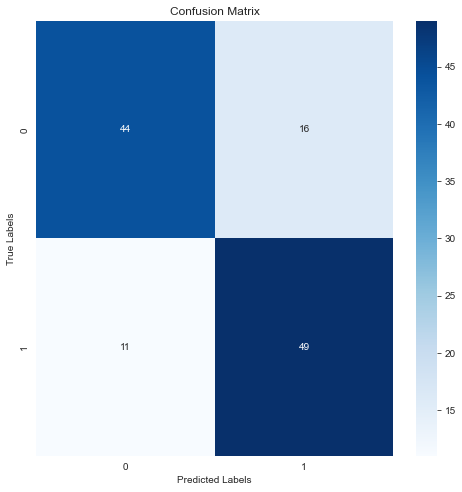

[I 2023-11-02 20:32:19,120] A new study created in memory with name: no-name-5e55fac2-87ea-4a30-8c4a-01beb6362aff



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.80264


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:33:24,765] Trial 0 finished with value: 0.8026446280991735 and parameters: {'n_d': 64, 'n_a': 47, 'n_steps': 14, 'gamma': 1.3931666180961573, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.0989313805540031}. Best is trial 0 with value: 0.8026446280991735.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.78182


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:34:22,646] Trial 1 finished with value: 0.7818181818181817 and parameters: {'n_d': 14, 'n_a': 14, 'n_steps': 19, 'gamma': 0.9610791685334337, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.016917738158514387}. Best is trial 0 with value: 0.8026446280991735.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.78479


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:34:48,635] Trial 2 finished with value: 0.7847933884297521 and parameters: {'n_d': 63, 'n_a': 37, 'n_steps': 12, 'gamma': 1.7822385009069026, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.05280428176357245}. Best is trial 0 with value: 0.8026446280991735.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.86512


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:35:20,440] Trial 3 finished with value: 0.8651239669421488 and parameters: {'n_d': 57, 'n_a': 62, 'n_steps': 6, 'gamma': 0.2000923013254274, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.024826129394069512}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.75603


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:35:28,280] Trial 4 finished with value: 0.7560330578512395 and parameters: {'n_d': 40, 'n_a': 40, 'n_steps': 10, 'gamma': 1.9791378623866809, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.01555122701675258}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.79967


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:35:51,642] Trial 5 finished with value: 0.7996694214876033 and parameters: {'n_d': 46, 'n_a': 48, 'n_steps': 6, 'gamma': 1.370690041642945, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.06765744902641657}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.67603


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:36:48,046] Trial 6 finished with value: 0.6760330578512397 and parameters: {'n_d': 62, 'n_a': 49, 'n_steps': 10, 'gamma': 1.8014324845986969, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.039997171783166474}. Best is trial 3 with value: 0.8651239669421488.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:36:55,965] Trial 7 finished with value: 0.7887603305785125 and parameters: {'n_d': 24, 'n_a': 53, 'n_steps': 2, 'gamma': 0.4394927373848485, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.04761379090261171}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.78876

Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.79074


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:37:49,860] Trial 8 finished with value: 0.7907438016528926 and parameters: {'n_d': 38, 'n_a': 30, 'n_steps': 17, 'gamma': 0.5163435553713964, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.017553806434317667}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.80397


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:38:09,074] Trial 9 finished with value: 0.8039669421487604 and parameters: {'n_d': 18, 'n_a': 24, 'n_steps': 9, 'gamma': 1.5290160923620797, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.03914454147321175}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.78149


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:38:21,186] Trial 10 finished with value: 0.7814876033057852 and parameters: {'n_d': 51, 'n_a': 64, 'n_steps': 1, 'gamma': 0.18070150515689606, 'n_independent': 10, 'n_shared': 10, 'lambda_sparse': 0.0018166173270759978}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.79273


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:38:31,327] Trial 11 finished with value: 0.7927272727272727 and parameters: {'n_d': 25, 'n_a': 23, 'n_steps': 6, 'gamma': 0.1056761215418231, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.03559487948965998}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.83769


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:38:40,377] Trial 12 finished with value: 0.8376859504132231 and parameters: {'n_d': 12, 'n_a': 8, 'n_steps': 6, 'gamma': 0.8659907910365938, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.02993460128442815}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.78645


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:38:48,712] Trial 13 finished with value: 0.7864462809917356 and parameters: {'n_d': 29, 'n_a': 8, 'n_steps': 5, 'gamma': 0.8926982635569739, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.02568239905455217}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.81124


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:39:17,824] Trial 14 finished with value: 0.8112396694214875 and parameters: {'n_d': 55, 'n_a': 63, 'n_steps': 4, 'gamma': 0.7315671634485512, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.000996694337995499}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.84132


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:39:35,170] Trial 15 finished with value: 0.8413223140495867 and parameters: {'n_d': 8, 'n_a': 16, 'n_steps': 8, 'gamma': 1.1106674155340277, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.027129325798345545}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.79339


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:39:58,286] Trial 16 finished with value: 0.793388429752066 and parameters: {'n_d': 32, 'n_a': 18, 'n_steps': 8, 'gamma': 1.162512051068606, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.02500284323040594}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.79339


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:40:25,457] Trial 17 finished with value: 0.7933884297520661 and parameters: {'n_d': 8, 'n_a': 32, 'n_steps': 12, 'gamma': 1.0738312723662176, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.010798155422718187}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.81388


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:40:43,341] Trial 18 finished with value: 0.813884297520661 and parameters: {'n_d': 46, 'n_a': 57, 'n_steps': 3, 'gamma': 0.6188232969074567, 'n_independent': 8, 'n_shared': 1, 'lambda_sparse': 0.026253879903919735}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.79306


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:41:26,495] Trial 19 finished with value: 0.7930578512396694 and parameters: {'n_d': 57, 'n_a': 41, 'n_steps': 8, 'gamma': 0.4332305392220982, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.05381296417723659}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.79438


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:42:08,778] Trial 20 finished with value: 0.794380165289256 and parameters: {'n_d': 43, 'n_a': 25, 'n_steps': 14, 'gamma': 0.7405073419175054, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.008115743780398962}. Best is trial 3 with value: 0.8651239669421488.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.80198


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-02 20:42:20,244] Trial 21 finished with value: 0.8019834710743802 and parameters: {'n_d': 8, 'n_a': 9, 'n_steps': 7, 'gamma': 0.30268512254752766, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.030767706218689916}. Best is trial 3 with value: 0.8651239669421488.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.32213 |  0:00:01s
epoch 1  | loss: 1.26097 |  0:00:02s
epoch 2  | loss: 0.95942 |  0:00:03s
epoch 3  | loss: 0.94047 |  0:00:05s
epoch 4  | loss: 0.79564 |  0:00:06s
epoch 5  | loss: 0.73614 |  0:00:07s
epoch 6  | loss: 0.71793 |  0:00:09s
epoch 7  | loss: 0.69615 |  0:00:10s
epoch 8  | loss: 0.67746 |  0:00:11s
epoch 9  | loss: 0.63692 |  0:00:13s
epoch 10 | loss: 0.66259 |  0:00:14s
epoch 11 | loss: 0.63393 |  0:00:15s
epoch 12 | loss: 0.64111 |  0:00:16s
epoch 13 | loss: 0.63536 |  0:00:18s
epoch 14 | loss: 0.63283 |  0:00:19s
epoch 15 | loss: 0.62116 |  0:00:20s
epoch 16 | loss: 0.61687 |  0:00:22s
epoch 17 | loss: 0.6159  |  0:00:23s
epoch 18 | loss: 0.61095 |  0:00:24s
epoch 19 | loss: 0.61077 |  0:00:25s
epoch 20 | loss: 0.60469 |  0:00:27s
epoch 21 | loss: 0.61229 |  0:00:28s
epoch 22 | loss: 0.59387 |  0:00:29s
epoch 23 | loss: 0.60026 |  0:00:31s
epoch 24 | loss: 0.59066 |  0:00:32s
epoch 25 | loss: 0.58936 |  0:00:33s
epoch 26 | loss: 0.58519 |  0:00:34s
e

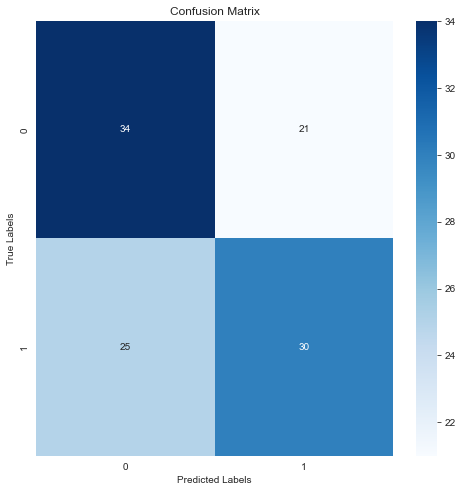

TABNET Average accuracy: 0.6514
TABNET Average confusion matrix: [[38.23529412 21.55882353]
 [20.11764706 39.67647059]]


In [49]:
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize LeaveOneSubjectOut cross-validator
logo = LeaveOneGroupOut()

# Function to perform LOSO CV and return average accuracy
def evaluate_tabnet(X, y, groups):
    tabnet_accuracies = {}
    tabnet_confusion_matricies = {}
    tabnet_confidence_intervals = {}
    tabnet_models = {}

    for train_index, test_index in logo.split(X, y, groups):
        # Extract indices for training and testing data for each participant
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # fill inf values with the mean of the column
        X_train = X_train.replace([np.inf, -np.inf], np.nan)
        X_test = X_test.replace([np.inf, -np.inf], np.nan)
        X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
        X_test = X_test.fillna(X_train.mean())
        
        # Scale the data
        # Create separate StandardScaler instances
        scaler_x = StandardScaler()
        # Fit on Training Data (!)
        scaler_x.fit(X_train.values)
        # Transform both training and testing data
        X_train_scaled = scaler_x.transform(X_train.values)
        X_test_scaled = scaler_x.transform(X_test.values)
        y_train = y_train.values.reshape(-1, 1).flatten()
        y_test = y_test.values.reshape(-1, 1).flatten()
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
        
        # TABNET
        # Convert Pandas DataFrame to NumPy array
        X_train_np = X_train_scaled.values
        X_test_np = X_test_scaled.values
        
        # Define objective function for optuna
        def objective(trial):
            # Generate hyperparameter search space
            params = {
                'n_d': trial.suggest_int('n_d', 8, 64),
                'n_a': trial.suggest_int('n_a', 8, 64),
                'n_steps': trial.suggest_int('n_steps', 1, 19),
                'gamma': trial.suggest_float('gamma', 0.1, 2.0),
                'n_independent': trial.suggest_int('n_independent', 1, 10),
                'n_shared': trial.suggest_int('n_shared', 1, 10),
                'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
                # 'optimizer_fn': torch.optim.Adam,
                # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
                # 'mask_type': 'entmax',
                # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
                # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
                'verbose': 0
            }
        
            # Create TabNetClassifier object with hyperparameters from optuna
            classifier = TabNetClassifier(**params)
        
            # Train and evaluate the model
            classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
            val_preds = classifier.predict_proba(X_test_np)[:, 1]
            val_auc = roc_auc_score(y_test, val_preds)
        
            return val_auc
        
        # Create optuna study
        study = optuna.create_study(direction='maximize')
        
        # Optimize hyperparameters using optuna
        study.optimize(objective, n_trials=42, timeout=600)
        
        # Get best hyperparameters from optuna
        best_params = study.best_trial.params
        print('Best trial: score {},\nparams {}'.format(study.best_trial.value, study.best_trial.params))
        
        # Train final model with best hyperparameters
        tabnet = TabNetClassifier(**best_params)
        tabnet.fit(X_train_np, y_train)

        # Evaluate the model
        y_pred = tabnet.predict(X_test_np)
        acc = accuracy_score(y_test, y_pred)
        
        # Store the results for this fold using subject name as key
        subject_name = groups[test_index[0]]
        tabnet_accuracies[subject_name] = acc
        conf_mat = evaluate_model(f"Tabnet on {subject_name}", y_test, y_pred)
        tabnet_confusion_matricies[subject_name] = conf_mat
        tabnet_models[subject_name] = tabnet
        tabnet_confidence_intervals[subject_name] = (acc - 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)), acc + 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)))
        
    # return all the computed dictionaries
    return tabnet_accuracies, tabnet_confusion_matricies, tabnet_confidence_intervals, tabnet_models

# Evaluate
tabnet_acc, tabnet_confusion_matricies, tabnet_confidence_intervals, tabnet_models = evaluate_tabnet(features_df, labels_df, groups)

tabnet_avg_confusion_matrix = np.mean(list(tabnet_confusion_matricies.values()), axis=0)
tabnet_avg_acc = np.mean(list(tabnet_acc.values())) 

print(f"Tabnet Average accuracy: {tabnet_avg_acc:.4f}")
print(f"Tabnet   Average confusion matrix: {tabnet_avg_confusion_matrix}")

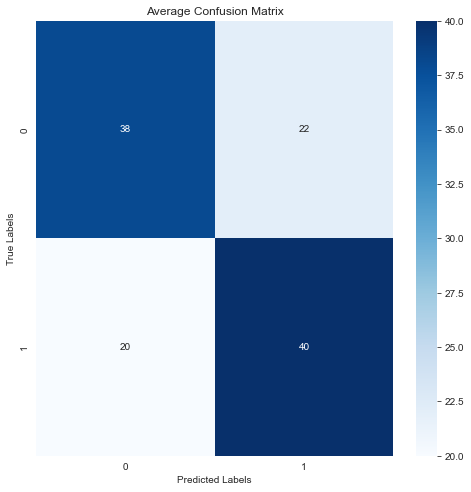

In [50]:
# Plot the average confusion matrix
# round the values in the confusion matrix
tabnet_avg_confusion_matrix_round = np.round(tabnet_avg_confusion_matrix).astype(int)

# Create a heatmap visualization of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(tabnet_avg_confusion_matrix_round, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set the axis labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Average Confusion Matrix")

# Show the plot
plt.show()

Calculating Performance Across Participants (Subject-wise)

The Y-axis can represent the accuracy for each participant, i.e., the percentage of correct classifications. This is the most direct measure of classifier performance and would be readily interpretable by most readers. We can use error bars to represent confidence intervals for each participant's accuracy.

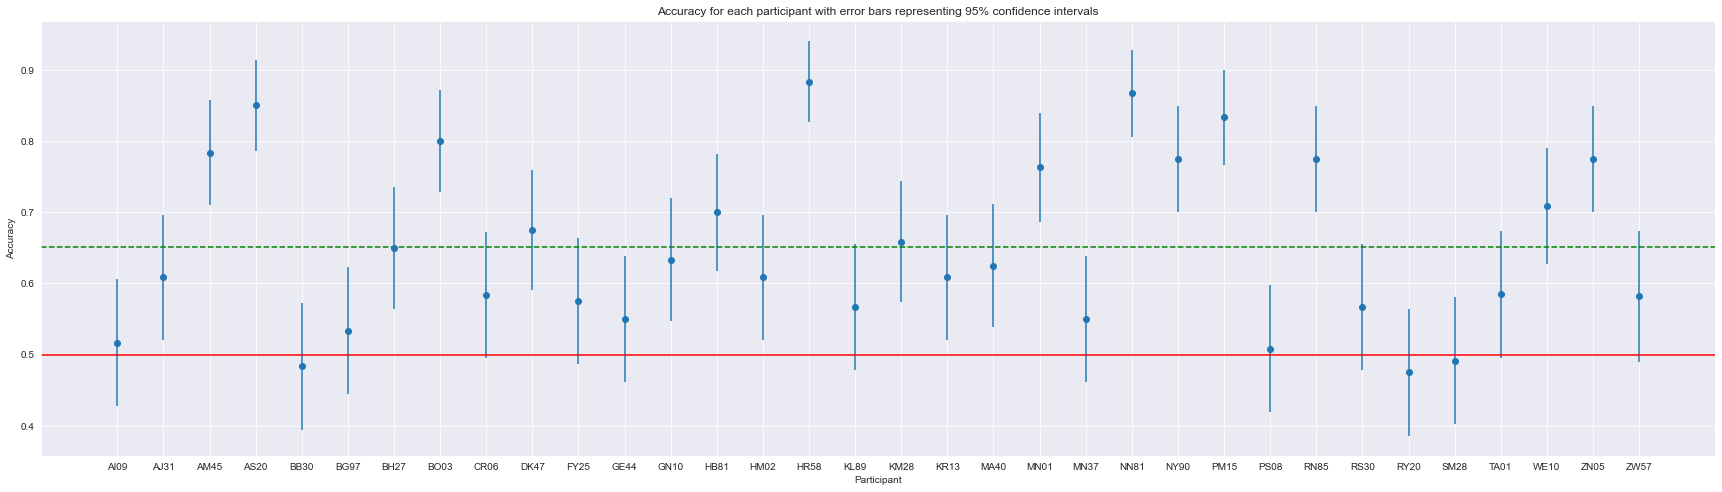

In [63]:
# Plot the accuracy for each participant with error bars representing 95% confidence intervals for each participant
fig, ax = plt.subplots(figsize=(30, 8))
ax.errorbar(tabnet_acc.keys(), tabnet_acc.values(), yerr=[(top - bot) / 2 for bot, top in tabnet_confidence_intervals.values()], fmt='o')
ax.set_xlabel("Participant")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for each participant with error bars representing 95% confidence intervals")
# Add a horizontal dashed line representing the average accuracy across participants
ax.axhline(y=tabnet_avg_acc, color='g', linestyle='--')
# Add horizontal lines representing the chance level accuracy (50%)
ax.axhline(y=0.5, color='r', linestyle='-')
# Show the plot
plt.show()

The best model is Tabnet, so we will train it on the whole dataset
and then we will plot the feature importance and the SHAP values

In [75]:
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# TABNET
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_scaled.values


# Train final model with best hyperparameters
all_training_model = TabNetClassifier(n_d=8, n_a=8, n_steps=1, gamma=0.1, n_independent=1, n_shared=1, lambda_sparse=0.0001, verbose=0)
all_training_model.fit(X_train_np, y_train)

No early stopping will be performed, last training weights will be used.


Feature importance

In [76]:
feature_importances = pd.DataFrame(all_training_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
DVA_Mean_Gaze_Pre,0.144940
DVA_Mean_Fixations_Pre,0.140732
DVA_AUC_Fixations_Pre,0.122556
DVA_Min_Gaze_Pre,0.120229
DVA_AUC_Gaze_Pre,0.112773
DVA_Sem_Fixations_Pre,0.101802
DVA_Median_Gaze_Pre,0.071729
DVA_Min_Fixations_Pre,0.056803
DVA_Sem_Gaze_Pre,0.024366
Movie,0.023865


SHAP values for the best model

In [70]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(all_training_model)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)

# Plot summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Plot summary plot
shap.summary_plot(shap_values, X_train)

# Plot force plot
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

# Plot force plot
shap.force_plot(explainer.expected_value, shap_values, X_train)

# Plot dependence plot
shap.dependence_plot('DVA_Mean', shap_values, X_train, interaction_index="DVA_Mean")

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'pytorch_tabnet.tab_model.TabNetClassifier'>